In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Load the dataset
file_path = '/content/sample_data/Current_available_property_2.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


Property_name Total_rooms  \
0                       Lovely flat, Paris St-Honoré      1 Room   
1                    Best location in Paris and calm     3 Rooms   
2                             Studio - 37m² - Bourse      1 Room   
3  Fully equipped flat for two or three people in...     2 Rooms   
4   Bright & cozy flat with a balcony in Montorgueil      1 Room   

  Accomodation_size Property_size                   Location Rent_per_month  
0          2 adults         26 m²  Paris, 1st Arrondissement         €1,950  
1          4 adults         73 m²  Paris, 1st Arrondissement         €2,850  
2          2 adults         37 m²  Paris, 1st Arrondissement         €2,031  
3          3 adults         40 m²  Paris, 1st Arrondissement         €3,666  
4          2 adults         50 m²  Paris, 1st Arrondissement         €3,300

In [ ]:
df.describe(include='all')

property_description  total_rooms  accomodation_size  \
count                             1104  1104.000000        1104.000000   
unique                             672          NaN                NaN   
top     Private bedroom in shared flat          NaN                NaN   
freq                                 8          NaN                NaN   
mean                               NaN     1.862319           2.774457   
std                                NaN     0.889687           1.534387   
min                                NaN     1.000000           1.000000   
25%                                NaN     1.000000           2.000000   
50%                                NaN     2.000000           2.000000   
75%                                NaN     2.000000           4.000000   
max                                NaN     7.000000          20.000000   

        property_size              location  rent_per_month  
count     1104.000000                  1104     1104.000000  
unique            NaN                    20             NaN  
top               NaN   16th Arrondissement             NaN  
freq              NaN                   150             NaN  
mean        44.897862                   NaN     3433.569746  
std         30.060322                   NaN     3314.138914  
min          9.000000                   NaN      620.000000  
25%         25.000000                   NaN     1944.000000  
50%         39.500000                   NaN     2591.000000  
75%         55.000000                   NaN     3822.500000  
max        293.000000                   NaN    50000.000000

In [ ]:
# Display the data types and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Property_name      1104 non-null   object
 1   Total_rooms        1104 non-null   object
 2   Accomodation_size  1104 non-null   object
 3   Property_size      1104 non-null   object
 4   Location           1104 non-null   object
 5   Rent_per_month     1104 non-null   object
dtypes: object(6)
memory usage: 51.9+ KB


In [ ]:
# There are no missing values in the dataset.

In [ ]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   property_name      1104 non-null   object
 1   total_rooms        1104 non-null   object
 2   accomodation_size  1104 non-null   object
 3   property_size      1104 non-null   object
 4   location           1104 non-null   object
 5   rent_per_month     1104 non-null   object
dtypes: object(6)
memory usage: 51.9+ KB


In [ ]:
# Converting data types and handling units
def extract_numbers(text):
    return int(re.findall(r'\d+', text)[0])

# Convert 'Property_size', 'Total_rooms', 'Accomodation_size', 'Rent_per_month' to numerical values
df['property_size'] = df['property_size'].str.replace('m²', '').astype(float)
df['total_rooms'] = df['total_rooms'].apply(extract_numbers)
df['accomodation_size'] = df['accomodation_size'].apply(extract_numbers)
df['rent_per_month'] = df['rent_per_month'].str.replace('€', '').str.replace(',', '').astype(float)


df['location'] = df['location'].str.replace('Paris,', '').astype(str)
df = df.rename(columns={'property_name': 'property_description'})
# Display the updated dataset
df.head()

property_description  total_rooms  \
0                       Lovely flat, Paris St-Honoré            1   
1                    Best location in Paris and calm            3   
2                             Studio - 37m² - Bourse            1   
3  Fully equipped flat for two or three people in...            2   
4   Bright & cozy flat with a balcony in Montorgueil            1   

   accomodation_size  property_size             location  rent_per_month  
0                  2           26.0   1st Arrondissement          1950.0  
1                  4           73.0   1st Arrondissement          2850.0  
2                  2           37.0   1st Arrondissement          2031.0  
3                  3           40.0   1st Arrondissement          3666.0  
4                  2           50.0   1st Arrondissement          3300.0

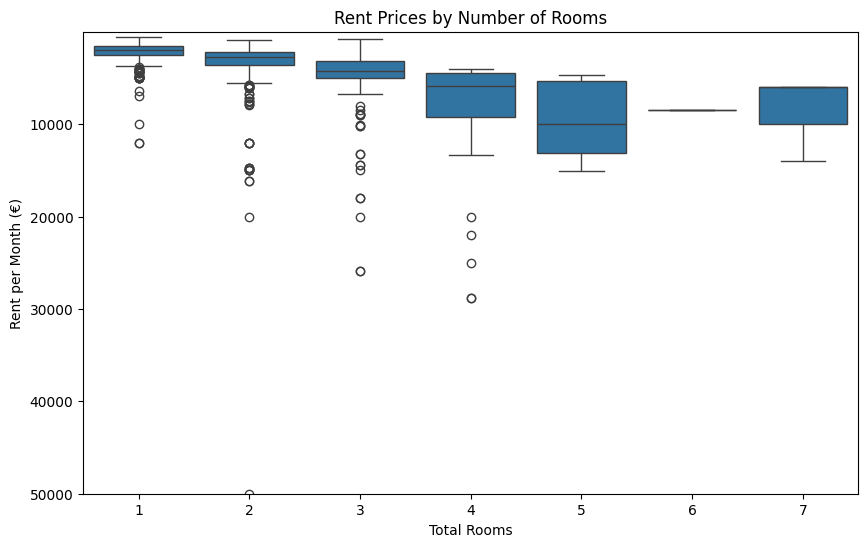

In [ ]:
# Boxplot of Rent Prices by Number of Rooms
plt.figure(figsize=(10, 6))
plt.ylim(50000)
sns.boxplot(x='total_rooms', y='rent_per_month', data=df)
plt.title('Rent Prices by Number of Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Rent per Month (€)')
plt.show()

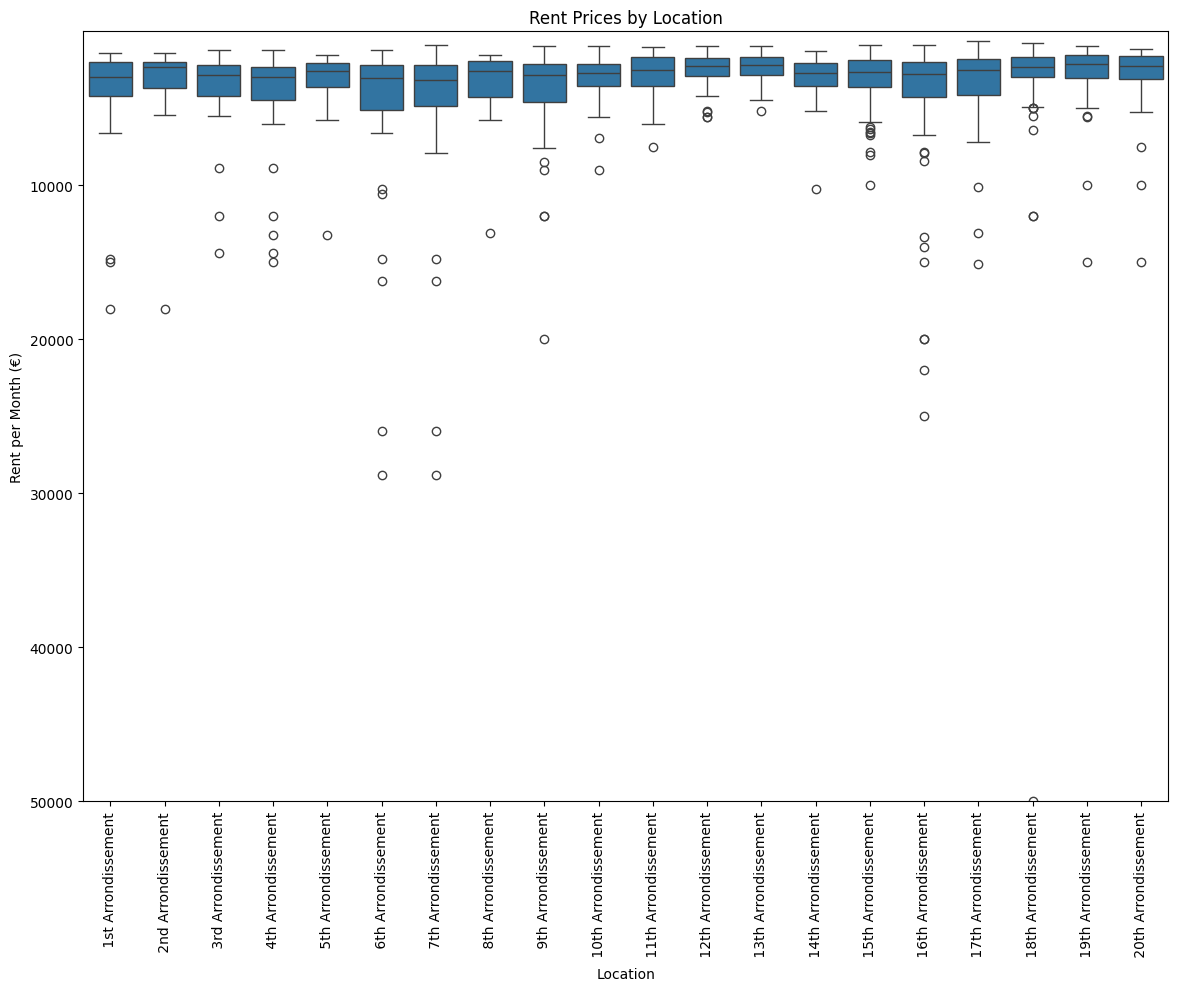

In [ ]:
# Boxplot of Rent Prices by Location
plt.figure(figsize=(14, 10))
plt.ylim(50000)
sns.boxplot(x='location', y='rent_per_month', data=df)
plt.title('Rent Prices by Location')
plt.xlabel('Location')
plt.ylabel('Rent per Month (€)')
plt.xticks(rotation=90)
plt.show()

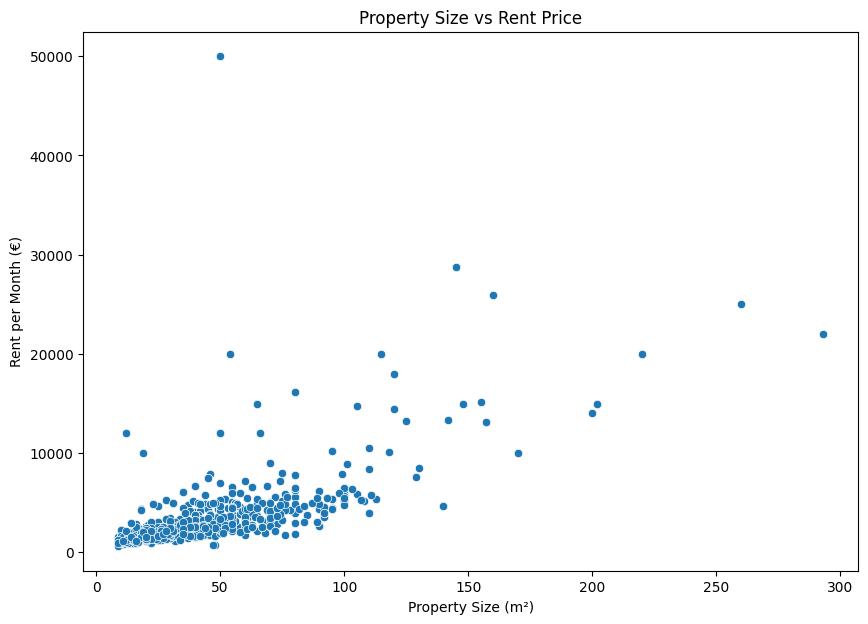

In [ ]:
# Relationship between Property Size and Rent Price
plt.figure(figsize=(10, 7))
sns.scatterplot(x='property_size', y='rent_per_month', data=df)
plt.title('Property Size vs Rent Price')
plt.xlabel('Property Size (m²)')
plt.ylabel('Rent per Month (€)')
plt.show()

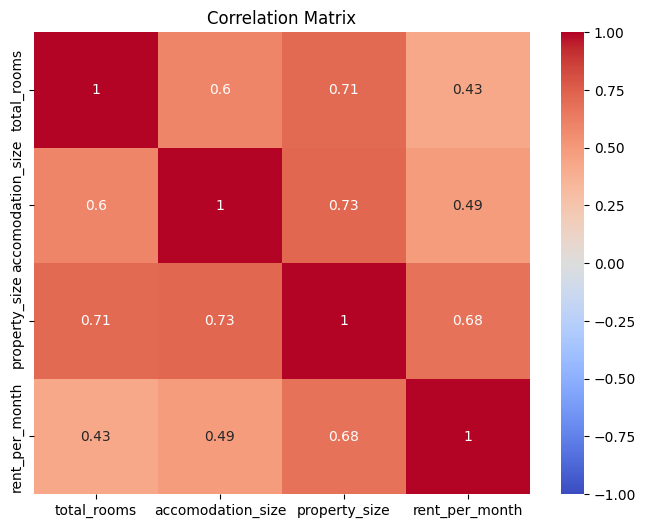

In [ ]:
# Compute the correlation matrix
corr = df[['total_rooms', 'accomodation_size', 'property_size', 'rent_per_month']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('Current_available_property_sale.csv')
data.head()

Property_name Property_type  \
0  Montmartre - Sacré-coeur - Perfect pied-à-terr...    Apartments   
1  Renovated flat with open view - Paris 4th - Ma...    Apartments   
2              Saint-Germain-des-Prés / rue Cassette    Apartments   
3  Paris 8 - Champs-Elysées - Deux pièces - Derni...    Apartments   
4                             Saint-Germain-des-Prés    Apartments   

  Property_size  Total_rooms  Bedrooms  Bathrooms  \
0            39          3.0       1.0        1.0   
1            41          2.0       1.0        1.0   
2            37          NaN       1.0        2.0   
3            45          2.0       1.0        2.0   
4            28          NaN       1.0        2.0   

                             Location Price(Euros)  
0  Paris, Ile-De-France, 75018 France       589999  
1  Paris, Ile-De-France, 75004 France       585000  
2  Paris, Ile-De-France, 75006 France       580000  
3  Paris, Ile-De-France, 75008 France       580000  
4  Paris, Ile-De-France, 75006 France       560000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_name  580 non-null    object 
 1   Property_type  468 non-null    object 
 2   Property_size  564 non-null    object 
 3   Total_rooms    446 non-null    float64
 4   Bedrooms       553 non-null    float64
 5   Bathrooms      488 non-null    float64
 6   Location       581 non-null    object 
 7   Price(Euros)   580 non-null    object 
dtypes: float64(3), object(5)
memory usage: 36.4+ KB


In [ ]:
# Converting columns to appropriate types
data['Property_size'] = pd.to_numeric(data['Property_size'].str.replace('[^0-9]', ''), errors='coerce')
data['Price(Euros)'] = pd.to_numeric(data['Price(Euros)'].str.replace('[^0-9]', ''), errors='coerce')

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Property_name      1
Property_type    113
Property_size    215
Total_rooms      135
Bedrooms          28
Bathrooms         93
Location           0
Price(Euros)     216
dtype: int64

In [ ]:
# We fill missing numerical values with the mean and categorical with the mode
data['Property_type'].fillna(data['Property_type'].mode()[0], inplace=True)
data['Property_size'].fillna(data['Property_size'].mean(), inplace=True)
data['Total_rooms'].fillna(data['Total_rooms'].mean(), inplace=True)
data['Bedrooms'].fillna(data['Bedrooms'].mean(), inplace=True)
data['Bathrooms'].fillna(data['Bathrooms'].mean(), inplace=True)
data['Price(Euros)'].fillna(data['Price(Euros)'].mean(), inplace=True)

In [ ]:
# Dropping rows where 'Property_name' is missing
data.dropna(subset=['Property_name'], inplace=True)

# Verify changes
missing_values_after = data.isnull().sum()
missing_values_after

Property_name    0
Property_type    0
Property_size    0
Total_rooms      0
Bedrooms         0
Bathrooms        0
Location         0
Price(Euros)     0
dtype: int64

In [ ]:
# Convert data types
data['Property_size'] = data['Property_size'].round().astype(float)
data['Total_rooms'] = data['Total_rooms'].round().astype(float)
data['Bedrooms'] = data['Bedrooms'].round().astype(float)
data['Bathrooms'] = data['Bathrooms'].round().astype(float)
data['Price(Euros)'] = data['Price(Euros)'].round().astype(float)

In [ ]:
# Verify the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 0 to 580
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_name  580 non-null    object 
 1   Property_type  580 non-null    object 
 2   Property_size  580 non-null    float64
 3   Total_rooms    580 non-null    float64
 4   Bedrooms       580 non-null    float64
 5   Bathrooms      580 non-null    float64
 6   Location       580 non-null    object 
 7   Price(Euros)   580 non-null    float64
dtypes: float64(5), object(3)
memory usage: 40.8+ KB


In [ ]:
#Key statistics
data.describe()

Property_size  Total_rooms    Bedrooms   Bathrooms  Price(Euros)
count     580.000000   580.000000  580.000000  580.000000  5.800000e+02
mean      139.903448     4.231034    2.581034    2.784483  2.827848e+06
std        79.397370     2.196339    1.495642    1.634082  2.781940e+06
min        21.000000     1.000000    0.000000    1.000000  3.290000e+05
25%        94.750000     3.000000    2.000000    2.000000  1.493750e+06
50%       140.000000     4.000000    2.000000    3.000000  2.827848e+06
75%       140.000000     5.000000    3.000000    3.000000  2.827848e+06
max       848.000000    20.000000   15.000000   14.000000  3.800000e+07

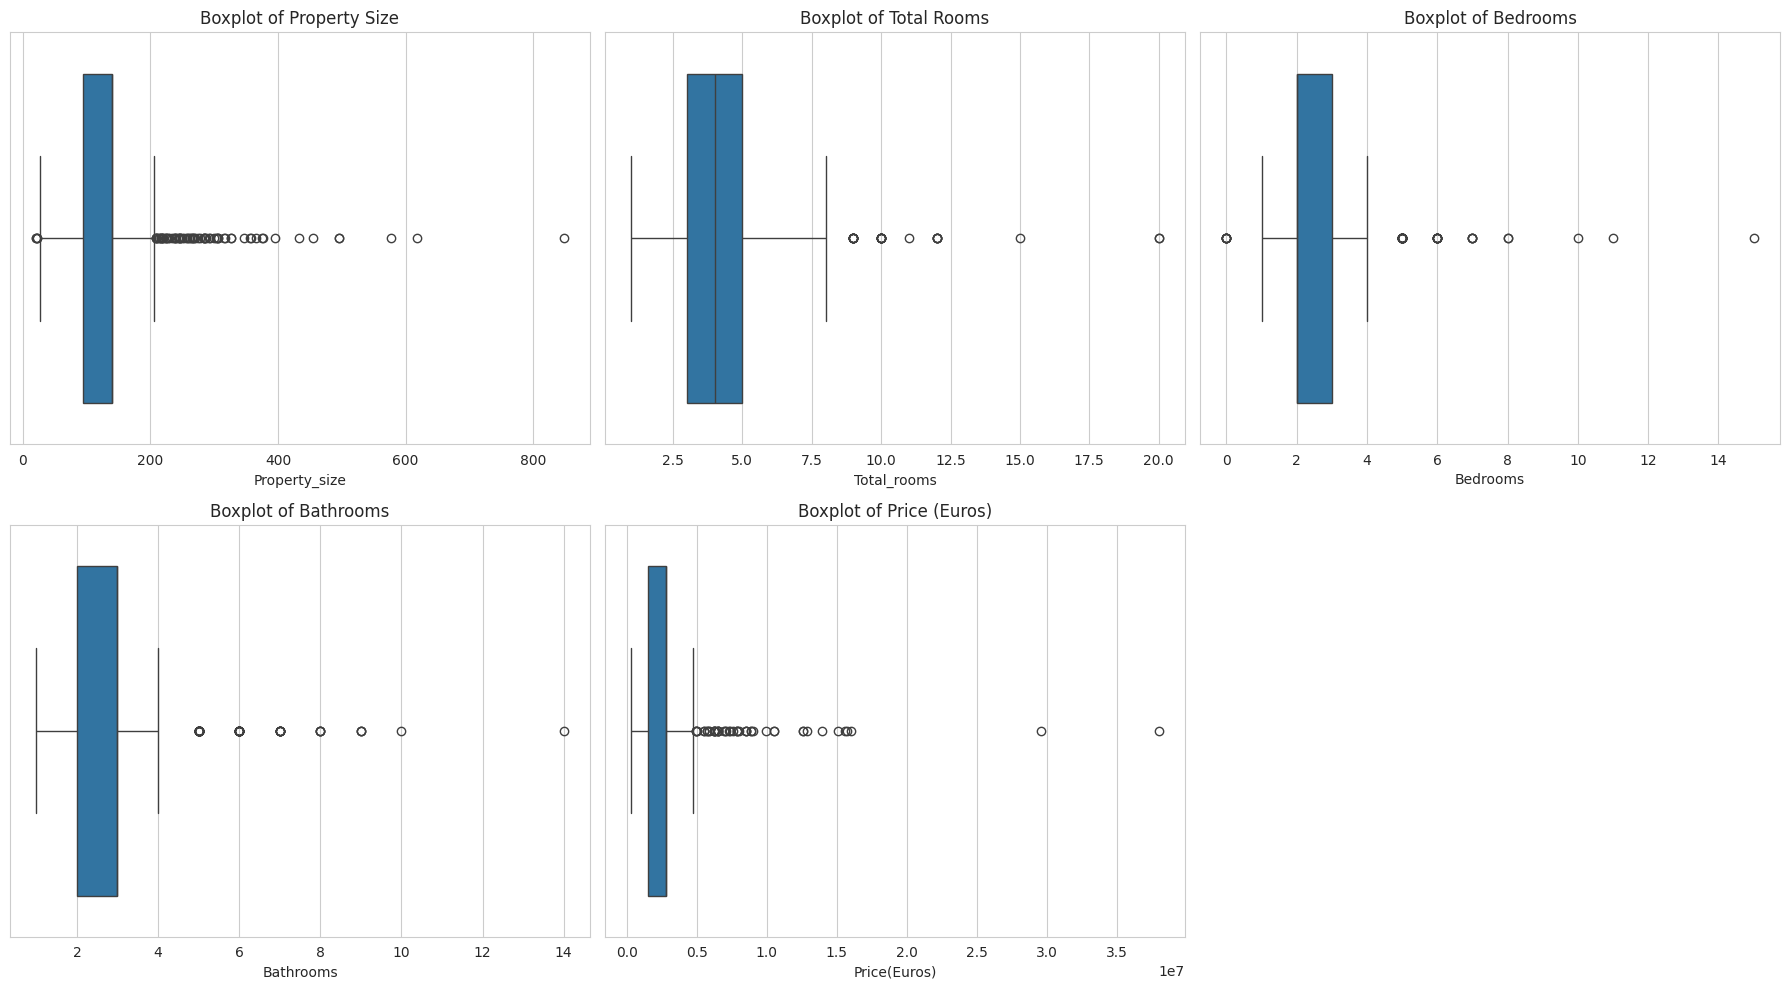

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visual detection of outliers for all variables using boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Boxplot for Property_size
sns.boxplot(ax=axes[0, 0], x=data['Property_size'])
axes[0, 0].set_title('Boxplot of Property Size')

# Boxplot for Total_rooms
sns.boxplot(ax=axes[0, 1], x=data['Total_rooms'])
axes[0, 1].set_title('Boxplot of Total Rooms')

# Boxplot for Bedrooms
sns.boxplot(ax=axes[0, 2], x=data['Bedrooms'])
axes[0, 2].set_title('Boxplot of Bedrooms')

# Boxplot for Bathrooms
sns.boxplot(ax=axes[1, 0], x=data['Bathrooms'])
axes[1, 0].set_title('Boxplot of Bathrooms')

# Boxplot for Price(Euros)
sns.boxplot(ax=axes[1, 1], x=data['Price(Euros)'])
axes[1, 1].set_title('Boxplot of Price (Euros)')

# Remove the last empty plot
fig.delaxes(axes[1, 2])

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
#Define the Function to Cap Outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return data

#List of Numeric Columns
numeric_columns = ['Property_size', 'Total_rooms', 'Bedrooms', 'Bathrooms', 'Price(Euros)']

#Loop Through Each Column and Cap Outliers
for column in numeric_columns:
    data = cap_outliers(data, column)


Text(0.5, 1.0, 'Correlation Heatmap')

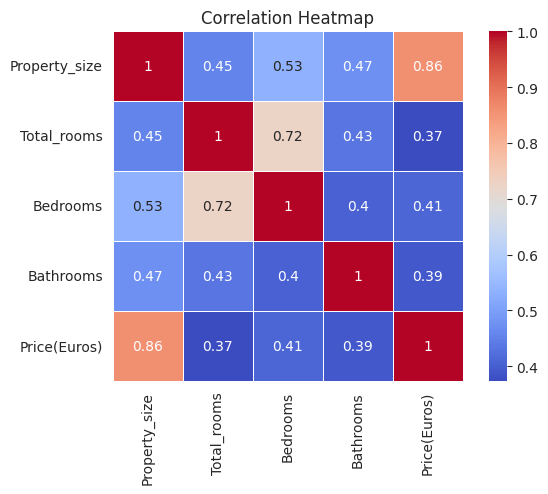

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Heatmap to show correlation between numeric variables
plt.subplot(2, 2, 1)
corr_matrix = data[['Property_size', 'Total_rooms', 'Bedrooms', 'Bathrooms', 'Price(Euros)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap')

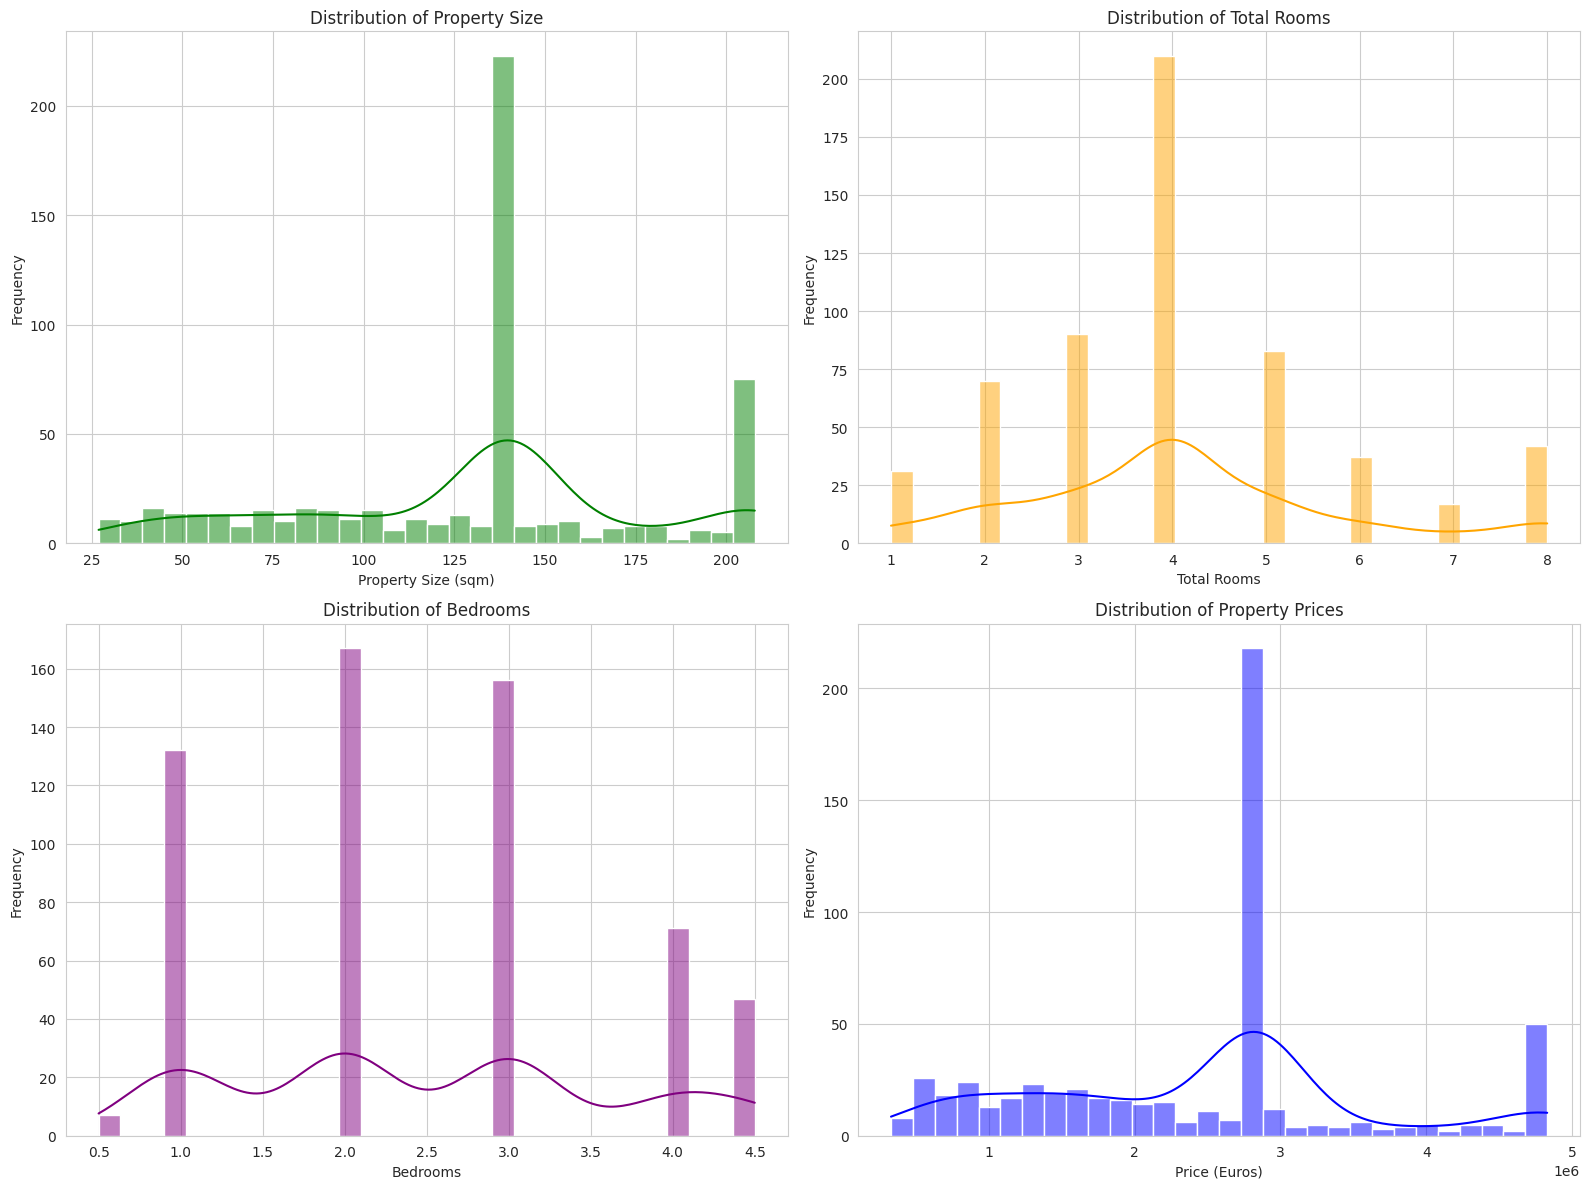

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Distribution of Property Size
plt.subplot(2, 2, 1)
sns.histplot(data['Property_size'], bins=30, kde=True, color='green')
plt.title('Distribution of Property Size')
plt.xlabel('Property Size (sqm)')
plt.ylabel('Frequency')

# Distribution of Total Rooms
plt.subplot(2, 2, 2)
sns.histplot(data['Total_rooms'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')

# Distribution of Bedrooms
plt.subplot(2, 2, 3)
sns.histplot(data['Bedrooms'], bins=30, kde=True, color='purple')
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

# Distribution of Prices
plt.subplot(2, 2, 4)
sns.histplot(data['Price(Euros)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
## EDA for Current_avaiable_Property_rent_1 Dataset


I performed in-depth EDA on a dataset with the details of Rent Data in it.


The features in the dataset are:
1. Price/month
2. Type
3. Acreage
4. Bedrooms
5. Rental Type


<b>Goal: </b> Analyze patterns and relationships between all the features and find suitable features to be used for further purposes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Current_available_property_rent_1.csv")
data.head()

Price/month        Type Acreage     Bedrooms       Rental type
0         €1.125  Apartment    27 m²    1 bedroom         Co-living
1  €1100 - €1500  Apartment    80 m²  2 Bedrooms   Private landlord
2           €800  Apartment    15 m²    1 bedroom    Rental company
3         €2.200  Apartment    65 m²    1 bedroom  Private landlord
4         €1.150  Apartment    45 m²    1 bedroom    Rental company

In [ ]:
data.shape

(416, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price/month  416 non-null    object
 1   Type         416 non-null    object
 2   Acreage      416 non-null    object
 3   Bedrooms     416 non-null    object
 4   Rental type  416 non-null    object
dtypes: object(5)
memory usage: 16.4+ KB


In [ ]:
### Step 1: Data Preprocessing

In [ ]:
#Check for null values
data.isnull().sum()

Price/month    0
Type           0
Acreage        0
Bedrooms       0
Rental type    0
dtype: int64

In [ ]:
Since there are no null values we can go for preprocessing of the data and fix it to find patterns

In [ ]:
Firstly we can find the mean rent for the rents that don't have a fixed value, but rather have a range of the approximation

In [ ]:
def preprocess_price(price):
    if '-' in price:
        prices = price.split('-')
        cleaned_prices = [int(p.replace('€', '').replace('.', '').replace(',', '')) for p in prices]
        average_price = int(sum(cleaned_prices) // len(cleaned_prices))
        return average_price
    else:
        cleaned_price = int(price.replace('€', '').replace('.', '').replace(',', ''))
        return cleaned_price

# Preprocess all prices in the column
data['Price/month_new'] = [preprocess_price(price) for price in data['Price/month']]

# Output the updated column
print(data['Price/month_new'])

0       1125
1       1300
2        800
3       2200
4       1150
       ...  
411    14837
412    18459
413    15545
414    15734
415    17855
Name: Price/month_new, Length: 416, dtype: int64


In [ ]:
data.head()

Price/month        Type Acreage     Bedrooms       Rental type  \
0         €1.125  Apartment    27 m²    1 bedroom         Co-living   
1  €1100 - €1500  Apartment    80 m²  2 Bedrooms   Private landlord   
2           €800  Apartment    15 m²    1 bedroom    Rental company   
3         €2.200  Apartment    65 m²    1 bedroom  Private landlord   
4         €1.150  Apartment    45 m²    1 bedroom    Rental company   

   Price/month_new  
0             1125  
1             1300  
2              800  
3             2200  
4             1150

In [ ]:
data['Acreage'] = data['Acreage'].str.replace(' m²', '').astype(int)
print(data['Acreage'].head())

0    27
1    80
2    15
3    65
4    45
Name: Acreage, dtype: int64


In [ ]:
data.head()

Price/month        Type  Acreage     Bedrooms       Rental type  \
0         €1.125  Apartment        27    1 bedroom         Co-living   
1  €1100 - €1500  Apartment        80  2 Bedrooms   Private landlord   
2           €800  Apartment        15    1 bedroom    Rental company   
3         €2.200  Apartment        65    1 bedroom  Private landlord   
4         €1.150  Apartment        45    1 bedroom    Rental company   

   Price/month_new  
0             1125  
1             1300  
2              800  
3             2200  
4             1150

In [ ]:
data['Type'].unique()

array(['Apartment ', 'House '], dtype=object)

In [ ]:
print(data['Bedrooms'])

0        1 bedroom
1      2 Bedrooms 
2        1 bedroom
3        1 bedroom
4        1 bedroom
          ...     
411    3 Bedrooms 
412    3 Bedrooms 
413    4 Bedrooms 
414    4 Bedrooms 
415    3 Bedrooms 
Name: Bedrooms, Length: 416, dtype: object


In [ ]:
data['Bedrooms'] = data['Bedrooms'].str.extract('(\d+)').astype(int)

In [ ]:
data.head()

Price/month        Type  Acreage  Bedrooms       Rental type  \
0         €1.125  Apartment        27         1         Co-living   
1  €1100 - €1500  Apartment        80         2  Private landlord   
2           €800  Apartment        15         1    Rental company   
3         €2.200  Apartment        65         1  Private landlord   
4         €1.150  Apartment        45         1    Rental company   

   Price/month_new  
0             1125  
1             1300  
2              800  
3             2200  
4             1150

In [ ]:
data.drop('Price/month',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Type             416 non-null    object
 1   Acreage          416 non-null    int64 
 2   Bedrooms         416 non-null    int64 
 3   Rental type      416 non-null    object
 4   Price/month_new  416 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 16.4+ KB


In [ ]:
Let's classify numerical and categorical variables to analyze

In [ ]:
numerical_features = data.columns[data.dtypes != 'object']
categorical_features = data.columns[data.dtypes == 'object']

In [ ]:
numerical_features

Index(['Acreage', 'Bedrooms', 'Price/month_new'], dtype='object')

In [ ]:
categorical_features

Index(['Type', 'Rental type'], dtype='object')

In [ ]:
Description of Categorical Variables

In [ ]:
data[categorical_features].describe()

Type     Rental type
count          416             416
unique           2               3
top     Apartment   Rental company
freq           413             390

In [ ]:
### Pie Charts for Categorical Data

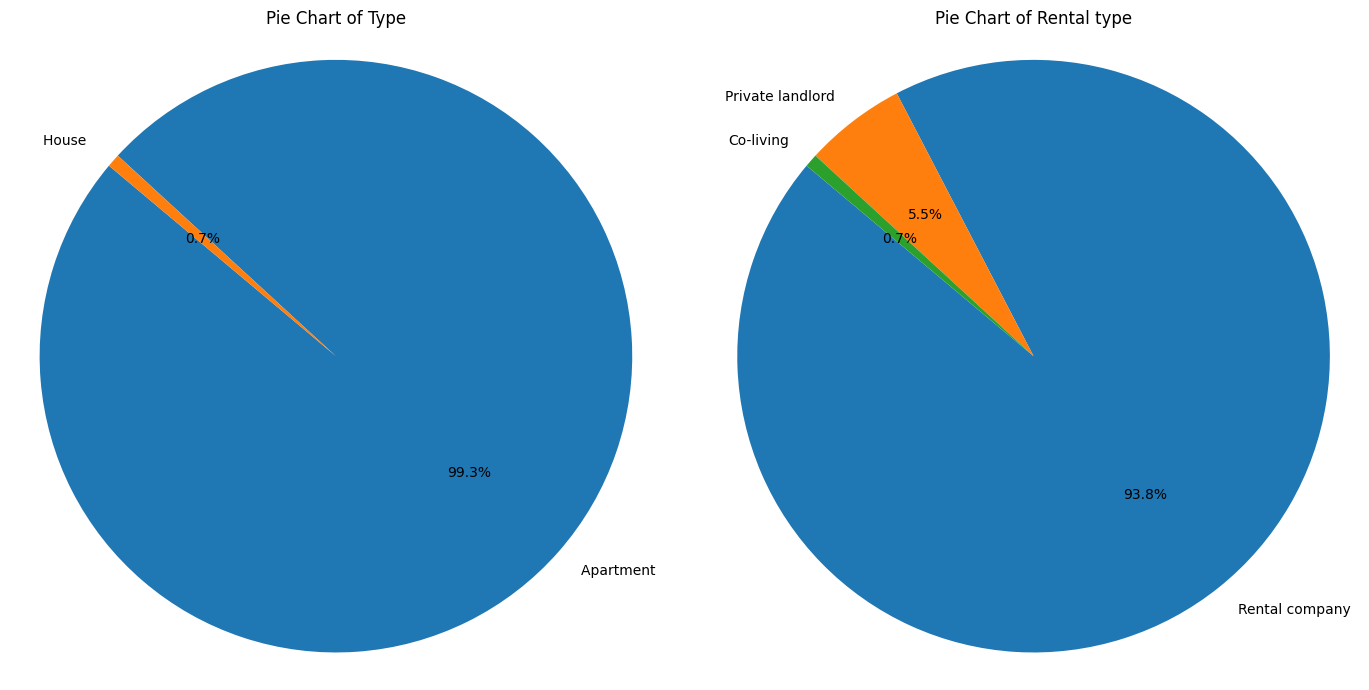

In [ ]:
plt.figure(figsize=(14,7))

for i,feature in enumerate(categorical_features):
  plt.subplot(1,len(categorical_features),i+1)
  category_counts = data[feature].value_counts()
  plt.pie(category_counts,labels = category_counts.index,autopct='%1.1f%%',startangle=140)
  plt.title(f'Pie Chart of {feature}')
  plt.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
### Observations from the pie charts

* Most of the plots for rent are Apartments.
* Most of the plots are managed by several rental companies.

In [ ]:
### Box Plots for Numerical Columns

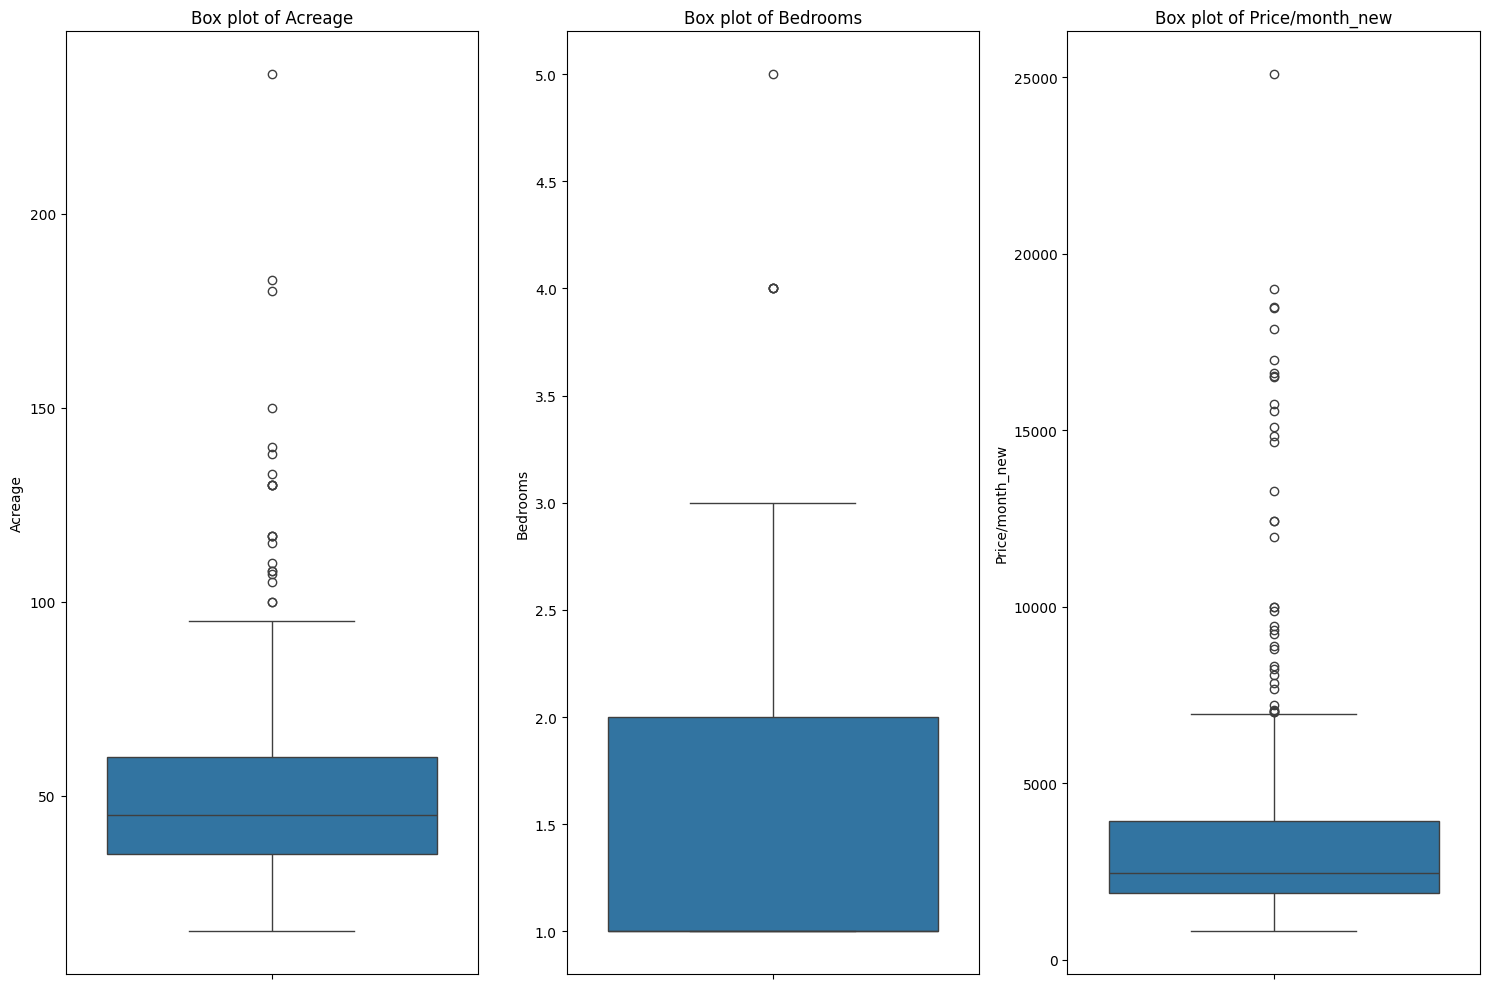

In [ ]:
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features):
  plt.subplot(1,len(numerical_features),i+1)
  sns.boxplot(y=data[feature])
  plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
### Observations from Box Plots

In [ ]:
1. <b>Acreage :</b>
  * The majority of plot area is around 50 sqmt.
  * There are several outliers in the data, one being a plot a size above 200sqmt. They may cost high in rent or most likely a scam.

2. <b>Bedrooms : </b>
  *  Most of the plots have around 2-3 bedrooms
  * There are not much of outliers in the bedroom data

3. <b>Price/month or Rent : </b>
  * Mostly the plots in the data below €5000, which is expected. But there are several outliers suggesting high rents for some plots, potentially leading to a scam.

In [ ]:
### Histogram for Numerical Columns


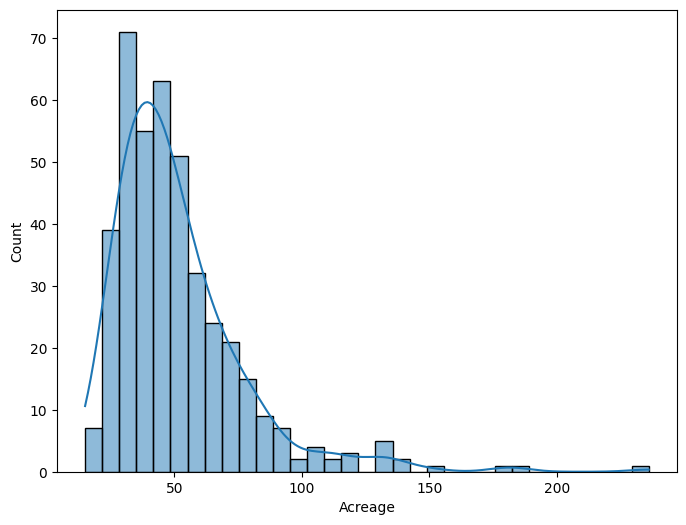

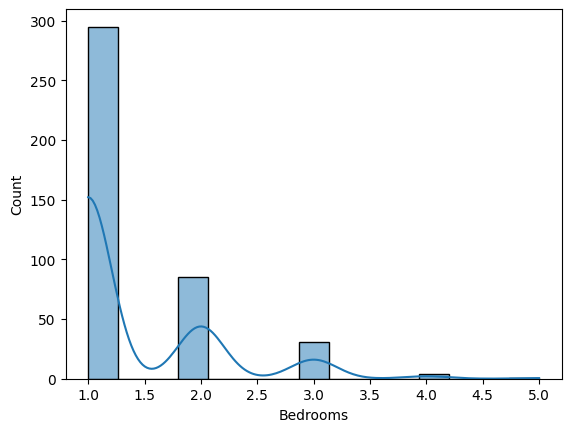

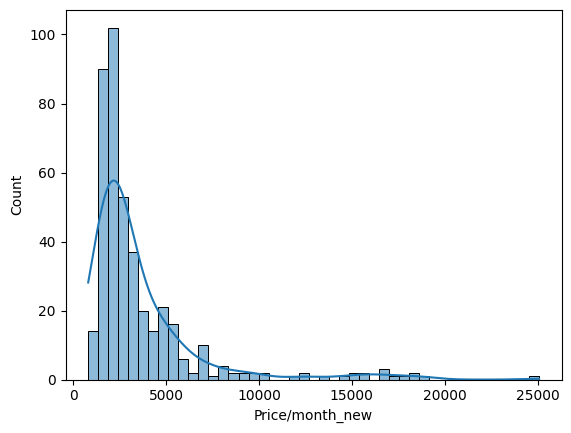

In [ ]:
plt.figure(figsize=(8,6))
x = 0
for i in numerical_features:
    sns.histplot(data= data, x=i , kde =True)
    print('\n')
    plt.show()

In [ ]:
### Observations from Histograms of Numerical Data

1. <b>Acreage : </b>
    
    * Most of the plots are of size of around 30-35 sqmt.
    * There is a peak at 35sqmt.

2. <b>Bedrooms : </b>
    
    * There are mostly 1-2 bedrooms in a flat for rent,which is quite common.

3. <b>Price/month : </b>

    * The average rent is about €3500-€4000 per month since there is a peak there.
    * We can also see few properties with a rent of €25000 per month.


So most of the rental properties are around 30-35 sqmt., have 1-2 rooms and rented per month at €4000

In [ ]:
Let's transform the categorical variables into numerical using One Hot Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), ['Type', 'Rental type'])
    ],
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor)
])

In [ ]:
df_transformed = pipeline.fit_transform(data)

In [ ]:
df_transformed = pd.DataFrame(df_transformed, columns=['Type', 'Rental type', 'Acreage', 'Bedrooms', 'Price/month_new'])

In [ ]:
df_transformed.head()

Type  Rental type  Acreage  Bedrooms  Price/month_new
0   0.0          0.0     27.0       1.0           1125.0
1   0.0          1.0     80.0       2.0           1300.0
2   0.0          2.0     15.0       1.0            800.0
3   0.0          1.0     65.0       1.0           2200.0
4   0.0          2.0     45.0       1.0           1150.0

In [ ]:
df_transformed.describe()

Type  Rental type     Acreage    Bedrooms  Price/month_new
count  416.000000   416.000000  416.000000  416.000000       416.000000
mean     0.007212     1.930288   51.310096    1.391827      3578.766827
std      0.084716     0.281897   26.087018    0.689215      3240.970018
min      0.000000     0.000000   15.000000    1.000000       800.000000
25%      0.000000     2.000000   35.000000    1.000000      1889.500000
50%      0.000000     2.000000   45.000000    1.000000      2438.000000
75%      0.000000     2.000000   60.000000    2.000000      3933.500000
max      1.000000     2.000000  236.000000    5.000000     25085.000000

In [ ]:
1. <b>Type :</b>
  * Most of the properties in the dataset are Houses

2. <b>Rental type :</b>
  * Most of the properties are owned by rental companies

3. <b>Acreage :</b>
  * The average property size is 51 sqmts.
  * Plot sizes range from 15 sqmt. to 236 sqmt.
  * Standard Deviation = 26.087 sqmt.
  * The data looks mostly symmetrical

4. <b>Bedrooms :</b>
  * The average number of bedrooms in a plot is 1
  * The maximum number of rooms that rental plots offer is 5
  * Standard Deviation = 0.6892
  * The data is symmetric since mean and median appear to be same

5. <b>Price/month new:</b>
  * The average rent per month is around €3578.
  * The highest rent is €25085.
  * Standard Deviation = €3240.97
  * The data here is a bit skewed to the right since the values are increasing as the distribution progresses

In [ ]:
### Correlation Matrix


Text(0.5, 1.0, 'Correlation Heatmap')

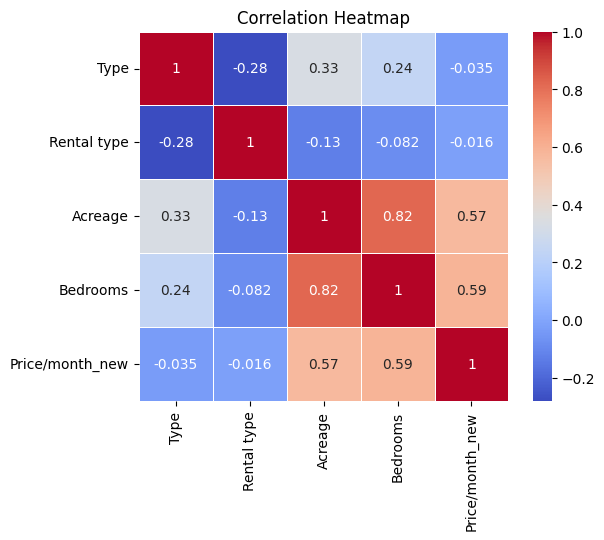

In [ ]:
sns.heatmap(df_transformed.corr(), annot=True,cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap')

In [ ]:
#### Observations from the Correlation Heatmap
* <b>Strong Correlation : </b> Bedrooms and Acreage have a Strong Correlation
* <b>Moderate Correlations : </b> Acreage and Rent and Acrage and Type of plot have moderate Correlation
* <b>Weak Correlation : </b> Bedrooms and Type, Rental Type and Acreage,Rental Type and Rent and Rental Types and Number of Bedrooms have weak correlation  

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fdata = pd.read_excel('/content/drive/My Drive/Current Paris Properties For Rent.xlsx')
fdata.head()

Proprety_name Price (dollars)  \
0  Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...          641304   
1  Renovated flat with open view - Paris 4th - Ma...          635870   
2             Saint-Germain-des-PrÃ©s / rue Cassette          630435   
3  Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...          630435   
4                            Saint-Germain-des-PrÃ©s          608696   

   Year_Built Property_Type  Area (sq ft)  Tax (dollars/year)  Total_room  \
0      1875.0    Apartments         430.0               612.0         3.0   
1      1860.0    Apartments         452.0               465.0         2.0   
2         NaN    Apartments         409.0                 NaN         NaN   
3         NaN    Apartments         495.0                 NaN         2.0   
4      1800.0    Apartments         312.0                 NaN         NaN   

   Bedroom  Bathroom  Area_code Price (euros)  Prop_size (m^2)  \
0      1.0       1.0      75018        589999               39   
1      1.0       1.0      75004        585000               41   
2      1.0       2.0      75006        580000               37   
3      1.0       2.0      75008        580000               45   
4      1.0       2.0      75006        560000               28   

                              Website  
0  https://www.sothebysrealty.com/eng  
1  https://www.sothebysrealty.com/eng  
2  https://www.sothebysrealty.com/eng  
3  https://www.sothebysrealty.com/eng  
4  https://www.sothebysrealty.com/eng

In [ ]:
# Dropping the unnecessary attributes
data = fdata.drop(['Price (dollars)','Area_code', 'Website', 'Area (sq ft)'], axis=1)
data.head()

Proprety_name  Year_Built  \
0  Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...      1875.0   
1  Renovated flat with open view - Paris 4th - Ma...      1860.0   
2             Saint-Germain-des-PrÃ©s / rue Cassette         NaN   
3  Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...         NaN   
4                            Saint-Germain-des-PrÃ©s      1800.0   

  Property_Type  Tax (dollars/year)  Total_room  Bedroom  Bathroom  \
0    Apartments               612.0         3.0      1.0       1.0   
1    Apartments               465.0         2.0      1.0       1.0   
2    Apartments                 NaN         NaN      1.0       2.0   
3    Apartments                 NaN         2.0      1.0       2.0   
4    Apartments                 NaN         NaN      1.0       2.0   

  Price (euros)  Prop_size (m^2)  
0        589999               39  
1        585000               41  
2        580000               37  
3        580000               45  
4        560000               28

In [ ]:
# Check unique values in the Property Type column
unique_values = data['Property_Type'].unique()
print(unique_values)


['Apartments' 'Single Family Homes' 'Duplex Homes' 'Townhouse' 'Land'
 'apartment' 'villa/townhouse' 'commercial / office']


In [ ]:
# Standardize property type names
data['Property_Type'] = data['Property_Type'].replace({
    'Apartments': 'apartment'
})

In [ ]:
# Verify the changes
print(data['Property_Type'].unique())

['apartment' 'Single Family Homes' 'Duplex Homes' 'Townhouse' 'Land'
 'villa/townhouse' 'commercial / office']


In [ ]:
# Get the current year
current_year = datetime.now().year
print(f"Current Year: {current_year}")

# Filter the DataFrame to exclude rows where 'Year Built' > current_year
data = data[data['Year_Built'] <= current_year]

Current Year: 2024


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 841
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proprety_name       644 non-null    object 
 1   Year_Built          644 non-null    float64
 2   Property_Type       644 non-null    object 
 3   Tax (dollars/year)  147 non-null    float64
 4   Total_room          160 non-null    float64
 5   Bedroom             634 non-null    float64
 6   Bathroom            632 non-null    float64
 7   Price (euros)       643 non-null    object 
 8   Prop_size (m^2)     644 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 50.3+ KB


In [ ]:
data['Price (euros)'] = pd.to_numeric(data['Price (euros)'], errors='coerce')


In [ ]:
missing_values = data.isnull().sum()
missing_values

Proprety_name           0
Year_Built              0
Property_Type           0
Tax (dollars/year)    497
Total_room            484
Bedroom                10
Bathroom               12
Price (euros)           1
Prop_size (m^2)         0
dtype: int64

In [ ]:
data.dropna(subset=['Year_Built'], inplace=True)

data['Tax (dollars/year)'].fillna(data['Tax (dollars/year)'].mean(), inplace=True)
data['Total_room'].fillna(data['Total_room'].mean(), inplace=True)
data['Bedroom'].fillna(data['Bedroom'].mean(), inplace=True)
data['Bathroom'].fillna(data['Bathroom'].mean(), inplace=True)
data['Price (euros)'].fillna(data['Price (euros)'].mean(), inplace=True)

In [ ]:
missing_values_updated = data.isnull().sum()
missing_values_updated

Proprety_name         0
Year_Built            0
Property_Type         0
Tax (dollars/year)    0
Total_room            0
Bedroom               0
Bathroom              0
Price (euros)         0
Prop_size (m^2)       0
dtype: int64

In [ ]:
# Convert data types
data['Tax (dollars/year)'] = data['Tax (dollars/year)'].round().astype(float)
data['Total_room'] = data['Total_room'].round().astype(float)
data['Bedroom'] = data['Bedroom'].round().astype(float)
data['Bathroom'] = data['Bathroom'].round().astype(float)
data['Price (euros)'] = data['Price (euros)'].round().astype(float)

# Verifying the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 841
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proprety_name       644 non-null    object 
 1   Year_Built          644 non-null    float64
 2   Property_Type       644 non-null    object 
 3   Tax (dollars/year)  644 non-null    float64
 4   Total_room          644 non-null    float64
 5   Bedroom             644 non-null    float64
 6   Bathroom            644 non-null    float64
 7   Price (euros)       644 non-null    float64
 8   Prop_size (m^2)     644 non-null    int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 50.3+ KB


In [ ]:
numerical_features = data.columns[data.dtypes != 'object']
# categorical feature = data['the Property_Type']

In [ ]:
# Description of Categorical variables
data['Property_Type'].describe()

count           644
unique            6
top       apartment
freq            608
Name: Property_Type, dtype: object

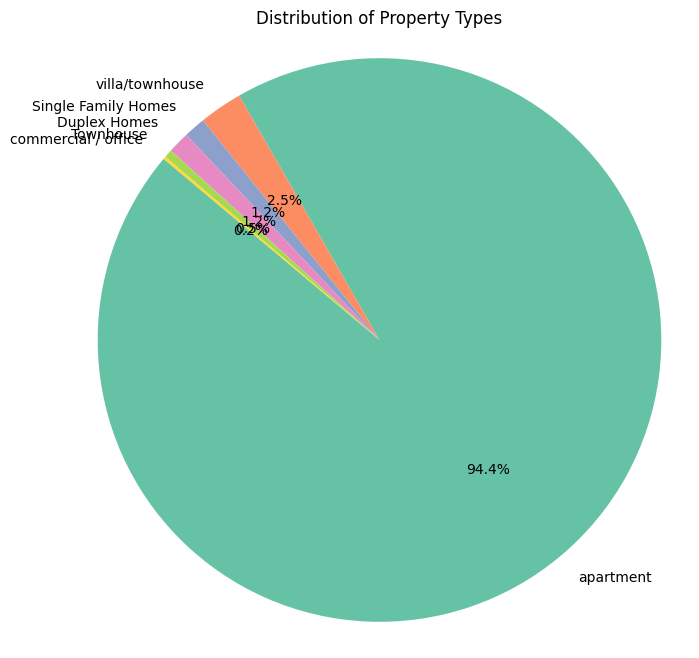

In [ ]:
# Count the occurrences of each property type
property_counts = data['Property_Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))

# Add a title
plt.title('Distribution of Property Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [ ]:
# Description of Numerical variables
data[numerical_features].describe()

Year_Built  Tax (dollars/year)  Total_room     Bedroom    Bathroom  \
count   644.000000          644.000000  644.000000  644.000000  644.000000   
mean   1896.114907         2601.108696    4.927019    2.683230    2.195652   
std      71.409466          784.593967    1.014337    1.340469    1.453985   
min    1436.000000          434.000000    1.000000    1.000000    0.000000   
25%    1880.000000         2601.000000    5.000000    2.000000    1.000000   
50%    1900.000000         2601.000000    5.000000    3.000000    2.000000   
75%    1935.000000         2601.000000    5.000000    3.000000    3.000000   
max    2021.000000         7717.000000   10.000000   15.000000    9.000000   

       Price (euros)  Prop_size (m^2)  
count   6.440000e+02       644.000000  
mean    2.582908e+06       140.717391  
std     2.262945e+06        86.205048  
min     0.000000e+00        21.000000  
25%     1.150000e+06        76.750000  
50%     1.877499e+06       119.500000  
75%     3.122499e+06       178.250000  
max     1.510000e+07       543.000000

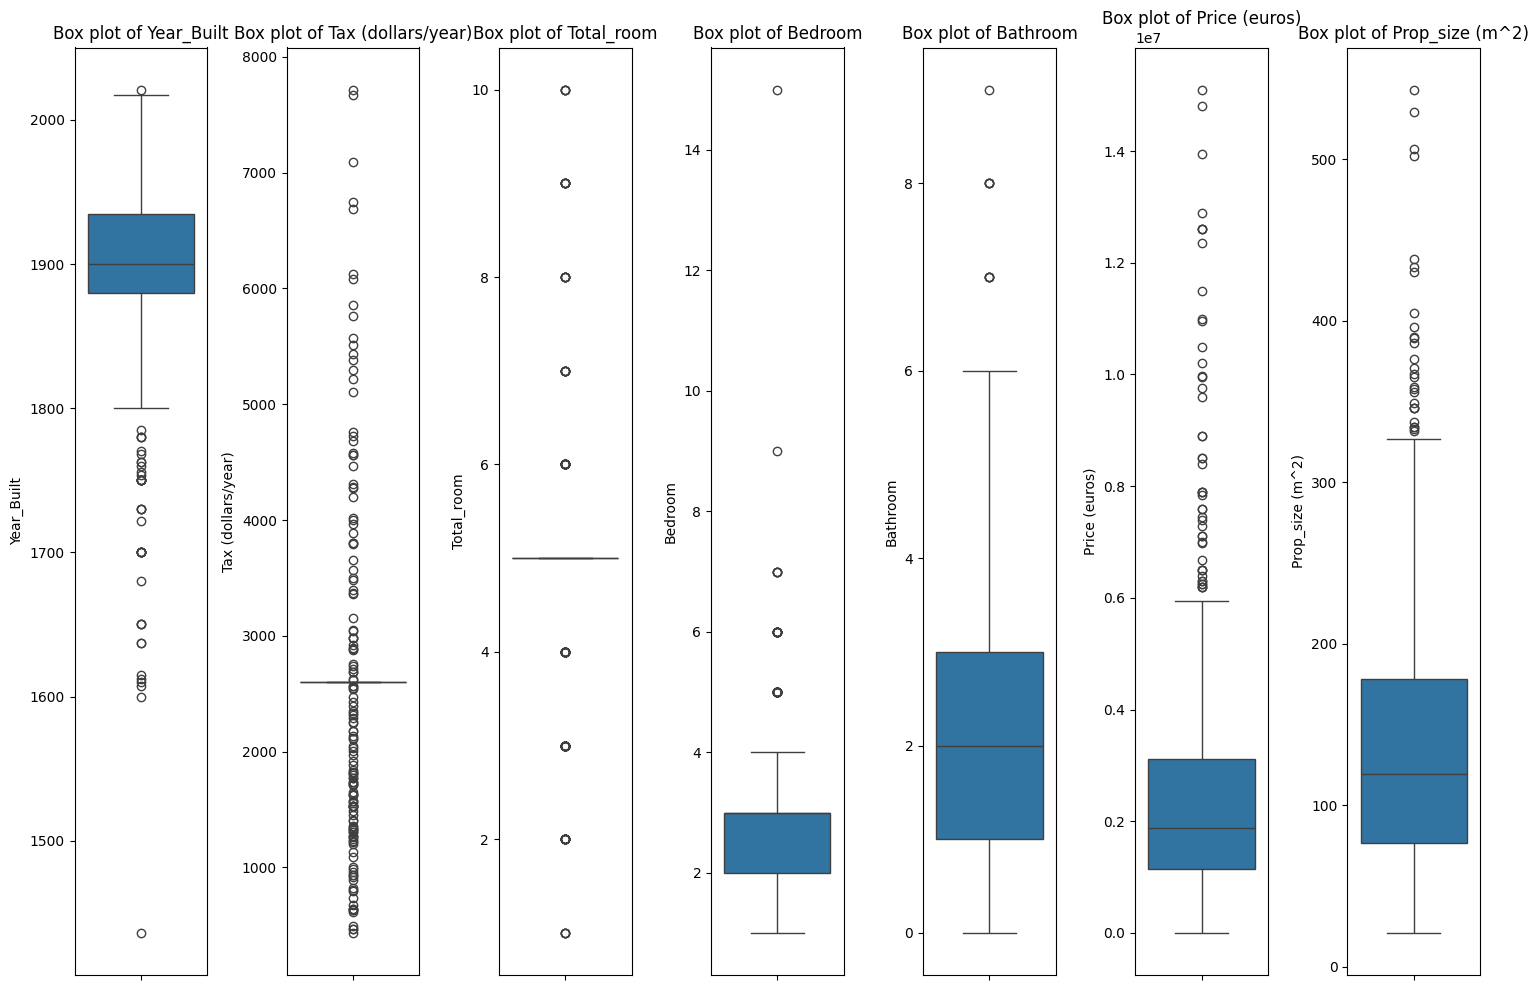

In [ ]:
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features):
  plt.subplot(1,len(numerical_features),i+1)
  sns.boxplot(y=data[feature])
  plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


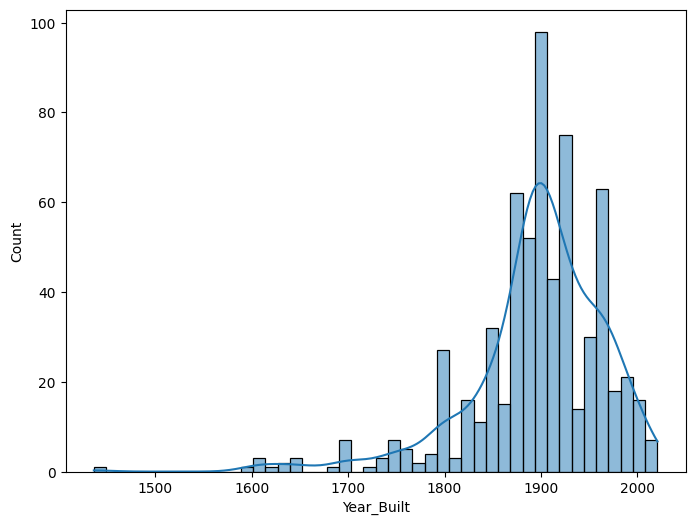

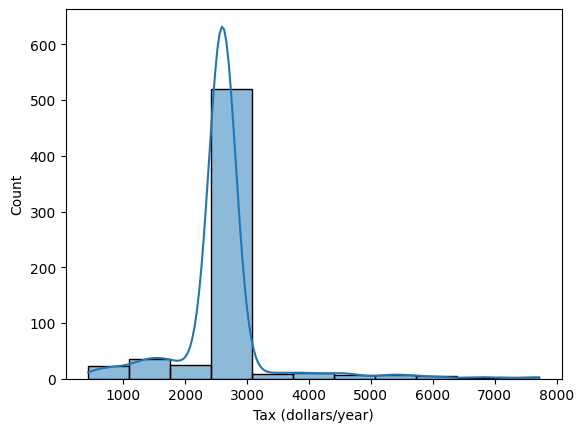

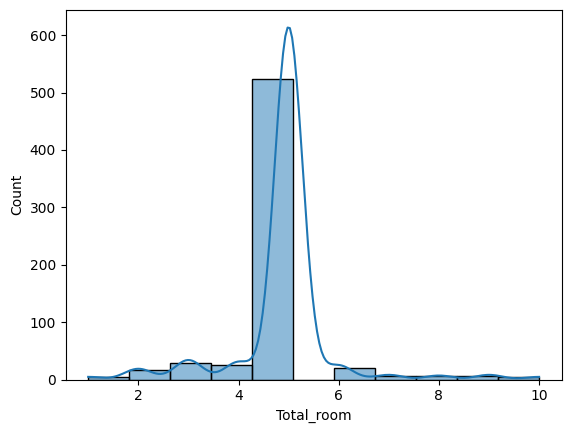

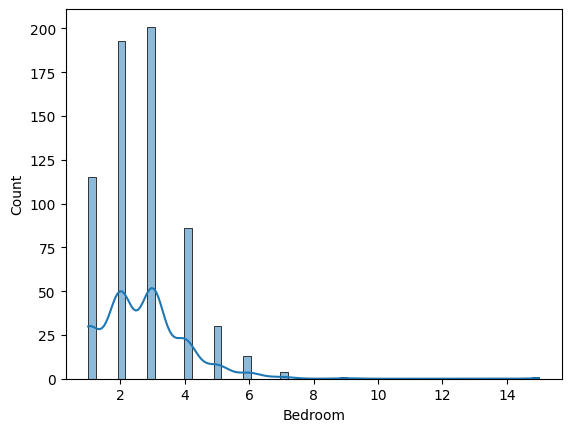

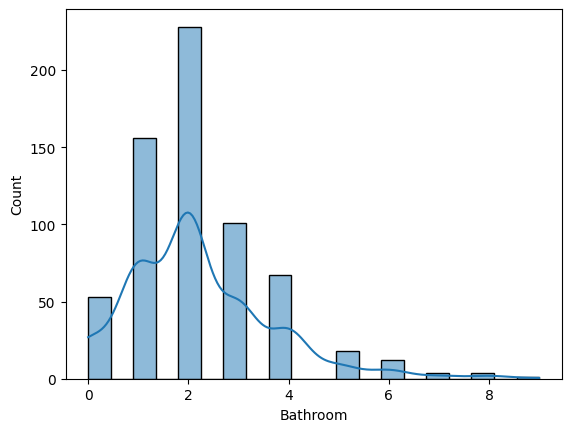

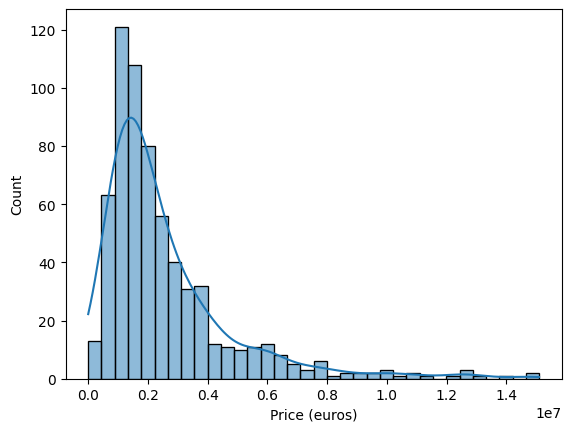

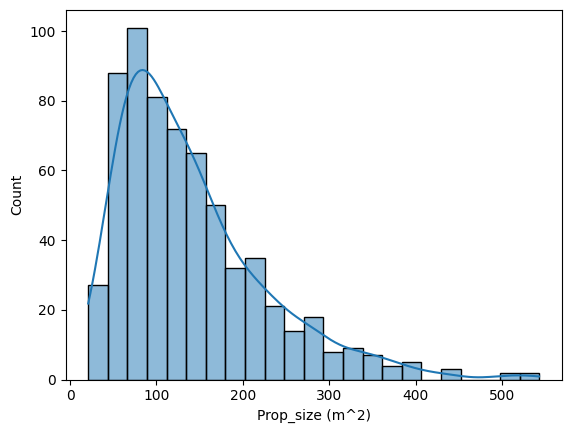

In [ ]:
plt.figure(figsize=(8,6))
x = 0
for i in numerical_features:
    sns.histplot(data= data, x=i , kde =True)
    print('\n')
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the categorical column
data['Property_Type_Encoded'] = encoder.fit_transform(data['Property_Type'])

# # Display the transformed data
# print(data)

In [ ]:
data.head()

Proprety_name  Year_Built  \
0  Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...      1875.0   
1  Renovated flat with open view - Paris 4th - Ma...      1860.0   
4                            Saint-Germain-des-PrÃ©s      1800.0   
5                            Saint-Germain-des-PrÃ©s      1800.0   
6                             PARIS 17, MONCEAU PARK      1900.0   

  Property_Type  Tax (dollars/year)  Total_room  Bedroom  Bathroom  \
0     apartment               612.0         3.0      1.0       1.0   
1     apartment               465.0         2.0      1.0       1.0   
4     apartment              2601.0         5.0      1.0       2.0   
5     apartment               641.0         5.0      1.0       2.0   
6     apartment              2601.0         5.0      1.0       2.0   

   Price (euros)  Prop_size (m^2)  Property_Type_Encoded  
0       589999.0               39                      3  
1       585000.0               41                      3  
4       560000.0               28                      3  
5       560000.0               28                      3  
6       549999.0               43                      3

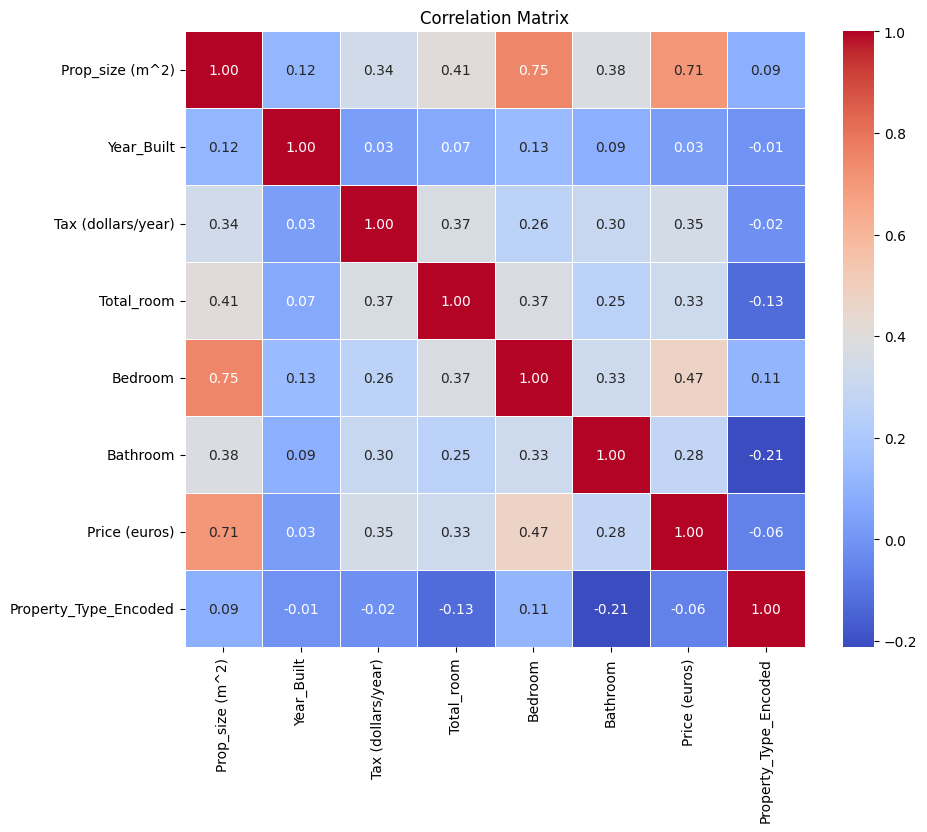

In [ ]:
# Select columns for correlation matrix
columns_of_interest = ['Prop_size (m^2)', 'Year_Built', 'Tax (dollars/year)',
                       'Total_room', 'Bedroom', 'Bathroom', 'Price (euros)', 'Property_Type_Encoded']
data_corr = data[columns_of_interest]

# Compute correlation matrix
corr_matrix = data_corr.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Current Paris Properties For Sale.xlsx')
df.head()

Proprety_name Price (dollars)  \
0  Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...          641304   
1  Renovated flat with open view - Paris 4th - Ma...          635870   
2             Saint-Germain-des-PrÃ©s / rue Cassette          630435   
3  Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...          630435   
4                            Saint-Germain-des-PrÃ©s          608696   

   Year_Built Property_Type  Area (sq ft)  Tax (dollars/year)  Total_room  \
0      1875.0    Apartments         430.0               612.0         3.0   
1      1860.0    Apartments         452.0               465.0         2.0   
2         NaN    Apartments         409.0                 NaN         NaN   
3         NaN    Apartments         495.0                 NaN         2.0   
4      1800.0    Apartments         312.0                 NaN         NaN   

   Bedroom  Bathroom  Area_code  Price (euros)  Prop_size (m^2)  \
0      1.0       1.0      75018       589999.0               39   
1      1.0       1.0      75004       585000.0               41   
2      1.0       2.0      75006       580000.0               37   
3      1.0       2.0      75008       580000.0               45   
4      1.0       2.0      75006       560000.0               28   

                              Website  
0  https://www.sothebysrealty.com/eng  
1  https://www.sothebysrealty.com/eng  
2  https://www.sothebysrealty.com/eng  
3  https://www.sothebysrealty.com/eng  
4  https://www.sothebysrealty.com/eng

In [ ]:
df.shape

(846, 13)

In [ ]:
#Dropping irrelevant columns
data = df.drop(['Website'], axis=1)
data.head()

Proprety_name Price (dollars)  \
0  Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...          641304   
1  Renovated flat with open view - Paris 4th - Ma...          635870   
2             Saint-Germain-des-PrÃ©s / rue Cassette          630435   
3  Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...          630435   
4                            Saint-Germain-des-PrÃ©s          608696   

   Year_Built Property_Type  Area (sq ft)  Tax (dollars/year)  Total_room  \
0      1875.0    Apartments         430.0               612.0         3.0   
1      1860.0    Apartments         452.0               465.0         2.0   
2         NaN    Apartments         409.0                 NaN         NaN   
3         NaN    Apartments         495.0                 NaN         2.0   
4      1800.0    Apartments         312.0                 NaN         NaN   

   Bedroom  Bathroom  Area_code  Price (euros)  Prop_size (m^2)  
0      1.0       1.0      75018       589999.0               39  
1      1.0       1.0      75004       585000.0               41  
2      1.0       2.0      75006       580000.0               37  
3      1.0       2.0      75008       580000.0               45  
4      1.0       2.0      75006       560000.0               28

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Proprety_name       846 non-null    object 
 1   Price (dollars)     828 non-null    object 
 2   Year_Built          646 non-null    float64
 3   Property_Type       846 non-null    object 
 4   Area (sq ft)        846 non-null    float64
 5   Tax (dollars/year)  204 non-null    float64
 6   Total_room          244 non-null    float64
 7   Bedroom             820 non-null    float64
 8   Bathroom            823 non-null    float64
 9   Area_code           846 non-null    int64  
 10  Price (euros)       844 non-null    float64
 11  Prop_size (m^2)     846 non-null    int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 79.4+ KB


In [ ]:
#Convert Price (dollars) column data type into numeric and replace errors with NaN
data['Price (dollars)'] = pd.to_numeric(data['Price (dollars)'],errors='coerce')
data

Proprety_name  Price (dollars)  \
0    Montmartre - SacrÃ©-coeur - Perfect pied-Ã -te...         641304.0   
1    Renovated flat with open view - Paris 4th - Ma...         635870.0   
2               Saint-Germain-des-PrÃ©s / rue Cassette         630435.0   
3    Paris 8 - Champs-ElysÃ©es - Deux piÃ¨ces - Der...         630435.0   
4                              Saint-Germain-des-PrÃ©s         608696.0   
..                                                 ...              ...   
841  Paris 16th District - A stoneâ€™s throw from t...              NaN   
842  Paris 4th District - A magnificent property in...       32173913.0   
843  Paris 16th District - A sumptuous private mansion              NaN   
844  Paris 16th District - A magnificent private ma...              NaN   
845  Paris 11th District - A STUNNING 1280 SQM CONT...              NaN   

     Year_Built    Property_Type  Area (sq ft)  Tax (dollars/year)  \
0        1875.0       Apartments        430.00               612.0   
1        1860.0       Apartments        452.00               465.0   
2           NaN       Apartments        409.00                 NaN   
3           NaN       Apartments        495.00                 NaN   
4        1800.0       Apartments        312.00                 NaN   
..          ...              ...           ...                 ...   
841      1990.0        apartment       5500.40                 NaN   
842         NaN        apartment       5629.57                 NaN   
843         NaN  villa/townhouse      15715.44                 NaN   
844         NaN  villa/townhouse      10893.17                 NaN   
845         NaN  villa/townhouse      13777.92                 NaN   

     Total_room  Bedroom  Bathroom  Area_code  Price (euros)  Prop_size (m^2)  
0           3.0      1.0       1.0      75018       589999.0               39  
1           2.0      1.0       1.0      75004       585000.0               41  
2           NaN      1.0       2.0      75006       580000.0               37  
3           2.0      1.0       2.0      75008       580000.0               45  
4           NaN      1.0       2.0      75006       560000.0               28  
..          ...      ...       ...        ...            ...              ...  
841         NaN      7.0       0.0      75016            0.0              506  
842         NaN      6.0       0.0      75004     29599999.0              517  
843         NaN      8.0       8.0      75016            0.0             1445  
844         NaN      6.0       6.0      75016            0.0             1002  
845         NaN      7.0       9.0      75011            0.0             1267  

[846 rows x 12 columns]

In [ ]:
#Finding missing values for each column
missing_values = data.isnull().sum()
missing_values

Proprety_name           0
Price (dollars)        19
Year_Built            200
Property_Type           0
Area (sq ft)            0
Tax (dollars/year)    642
Total_room            602
Bedroom                26
Bathroom               23
Area_code               0
Price (euros)           2
Prop_size (m^2)         0
dtype: int64

In [ ]:
#Filling missing values with the mean value
#For year data, value is kept null as the date range is big

data['Price (dollars)'].fillna(data['Price (dollars)'].mean(), inplace=True)
data['Tax (dollars/year)'].fillna(data['Tax (dollars/year)'].mean(),inplace=True)
data['Total_room'].fillna(data['Total_room'].mean(), inplace=True)
data['Bedroom'].fillna(data['Bedroom'].mean(), inplace=True)
data['Bathroom'].fillna(data['Bathroom'].mean(), inplace=True)
data['Price (euros)'].fillna(data['Price (euros)'].mean(), inplace=True)

missing_values_after = data.isnull().sum()
missing_values_after


Proprety_name           0
Price (dollars)         0
Year_Built            200
Property_Type           0
Area (sq ft)            0
Tax (dollars/year)      0
Total_room              0
Bedroom                 0
Bathroom                0
Area_code               0
Price (euros)           0
Prop_size (m^2)         0
dtype: int64

In [ ]:
current_year = datetime.now().year

# Count rows where year_built is greater than the current year
count = data[data['Year_Built'] > current_year].shape[0]
count

2

In [ ]:
#Filtered out rows having Year_Built greater than current year
df_filtered = data[data['Year_Built'] <= current_year]
data = df_filtered

In [ ]:
#Category data ---> Property type
category = data['Property_Type'].unique()
category

array(['Apartments', 'Single Family Homes', 'Duplex Homes', 'Townhouse',
       'apartment', 'villa/townhouse', 'commercial / office'],
      dtype=object)

In [ ]:
#Fixed categorical data for apartments having different labels
data.loc[:,'Property_Type'] = data['Property_Type'].replace('apartment', 'Apartments')
updated_category = data['Property_Type'].unique()
updated_category

array(['Apartments', 'Single Family Homes', 'Duplex Homes', 'Townhouse',
       'villa/townhouse', 'commercial / office'], dtype=object)

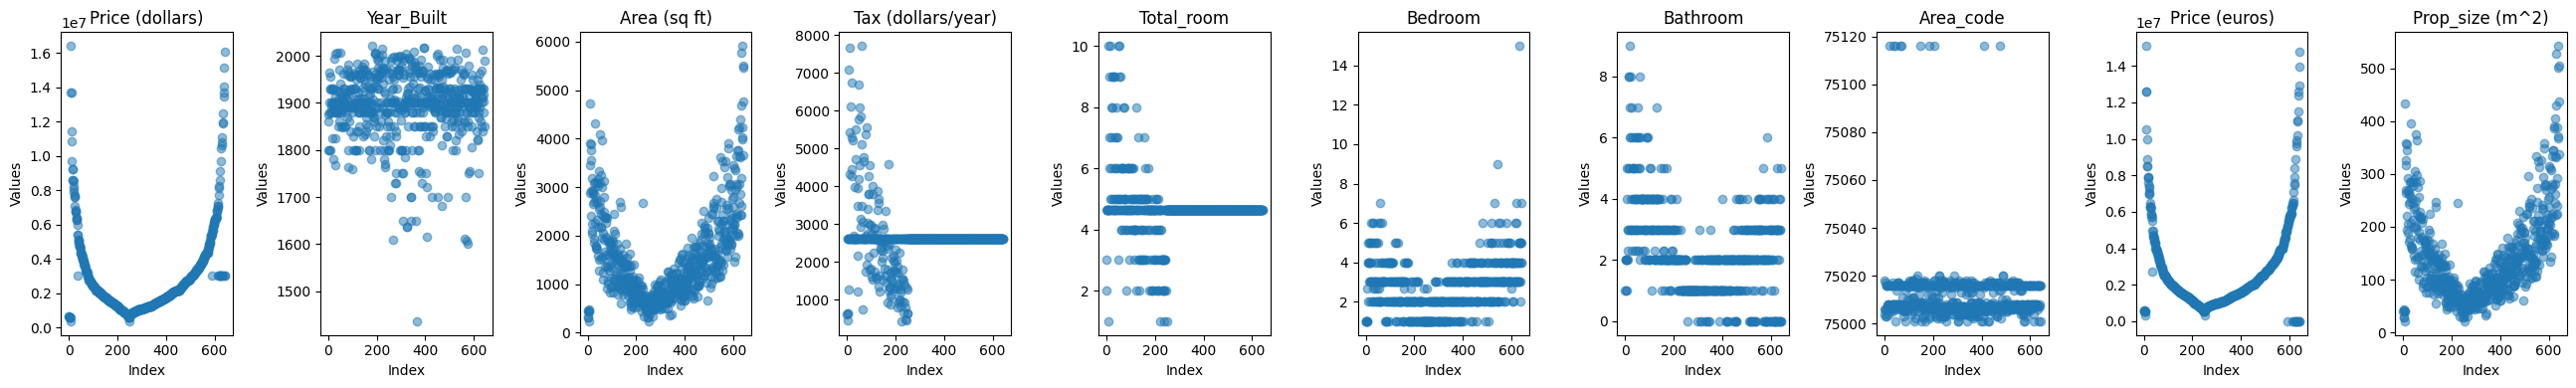

In [ ]:
#Outliers
numeric_df = data.select_dtypes(include=[np.number])

# Plot scatter plots and identify outliers for each numeric column

plt.figure(figsize=(26, 4))
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(1, len(numeric_df.columns), i)
    plt.scatter(np.arange(len(numeric_df)), numeric_df[column], alpha=0.5)
    plt.title(f'{column}')
    plt.xlabel('Index')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

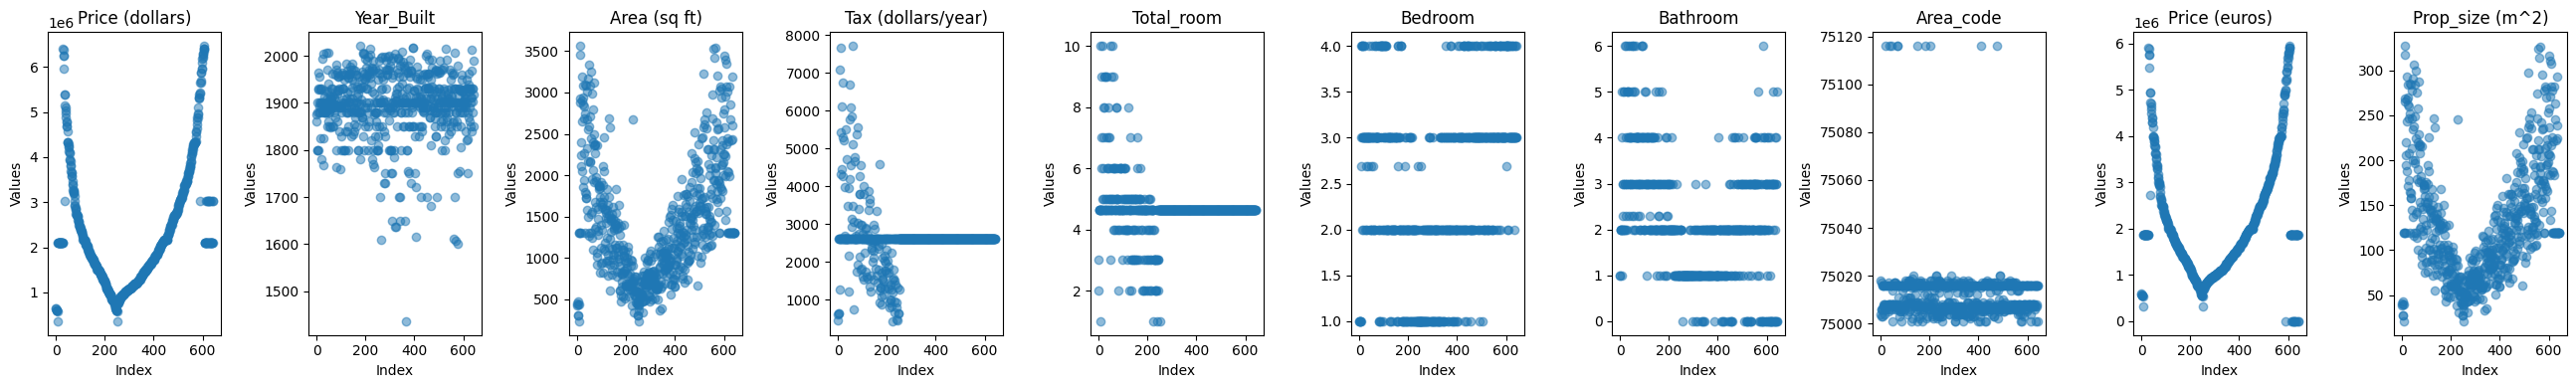

In [ ]:
#Replacing outliers with median value for each numeric column
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = column.median()
    return column.apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# List of columns to handle outliers
columns_to_handle = ['Area (sq ft)','Bedroom','Bathroom','Price (dollars)','Price (euros)','Prop_size (m^2)']

# Apply the function to the specified columns
for column in columns_to_handle:
    #data[column] = replace_outliers_with_median(data[column])
    data.loc[:, column] = replace_outliers_with_median(data[column])

#Displaying scatter plot after adjusting outliers
without_outliers = data.select_dtypes(include=[np.number])

plt.figure(figsize=(26, 4))
for i, column in enumerate(without_outliers.columns, 1):
    plt.subplot(1, len(without_outliers.columns), i)
    plt.scatter(np.arange(len(without_outliers)), without_outliers[column], alpha=0.5)
    plt.title(f'{column}')
    plt.xlabel('Index')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


In [ ]:
data.describe()

Price (dollars)   Year_Built  Area (sq ft)  Tax (dollars/year)  \
count     6.440000e+02   644.000000    644.000000          644.000000   
mean      2.308634e+06  1896.114907   1406.239891         2611.542306   
std       1.321105e+06    71.409466    722.383984          784.613070   
min       3.576090e+05  1436.000000    236.000000          434.000000   
25%       1.301630e+06  1880.000000    838.232500         2614.519608   
50%       2.088316e+06  1900.000000   1303.275000         2614.519608   
75%       2.989130e+06  1935.000000   1800.052500         2614.519608   
max       6.467391e+06  2021.000000   3562.000000         7717.000000   

       Total_room     Bedroom    Bathroom     Area_code  Price (euros)  \
count  644.000000  644.000000  644.000000    644.000000   6.440000e+02   
mean     4.652887    2.471841    2.122097  75012.169255   2.072900e+06   
std      1.006820    0.933511    1.297502     14.034647   1.243203e+06   
min      1.000000    1.000000    0.000000  75001.000000   0.000000e+00   
25%      4.635246    2.000000    1.000000  75006.000000   1.150000e+06   
50%      4.635246    3.000000    2.000000  75008.000000   1.876249e+06   
75%      4.635246    3.000000    3.000000  75016.000000   2.600000e+06   
max     10.000000    4.000000    6.000000  75116.000000   5.949999e+06   

       Prop_size (m^2)  
count       644.000000  
mean        128.900621  
std          66.462453  
min          21.000000  
25%          76.750000  
50%         119.250000  
75%         165.250000  
max         327.000000

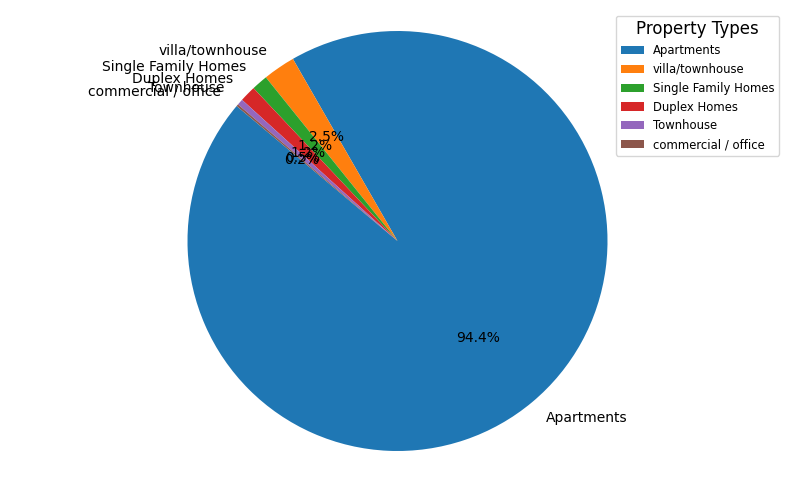

In [ ]:
#Pie chart for categorical data

property_counts = data['Property_Type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(10, 6))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend(loc='best', fontsize='small', title='Property Types', title_fontsize='large')  # Add legend with better readability
plt.show()

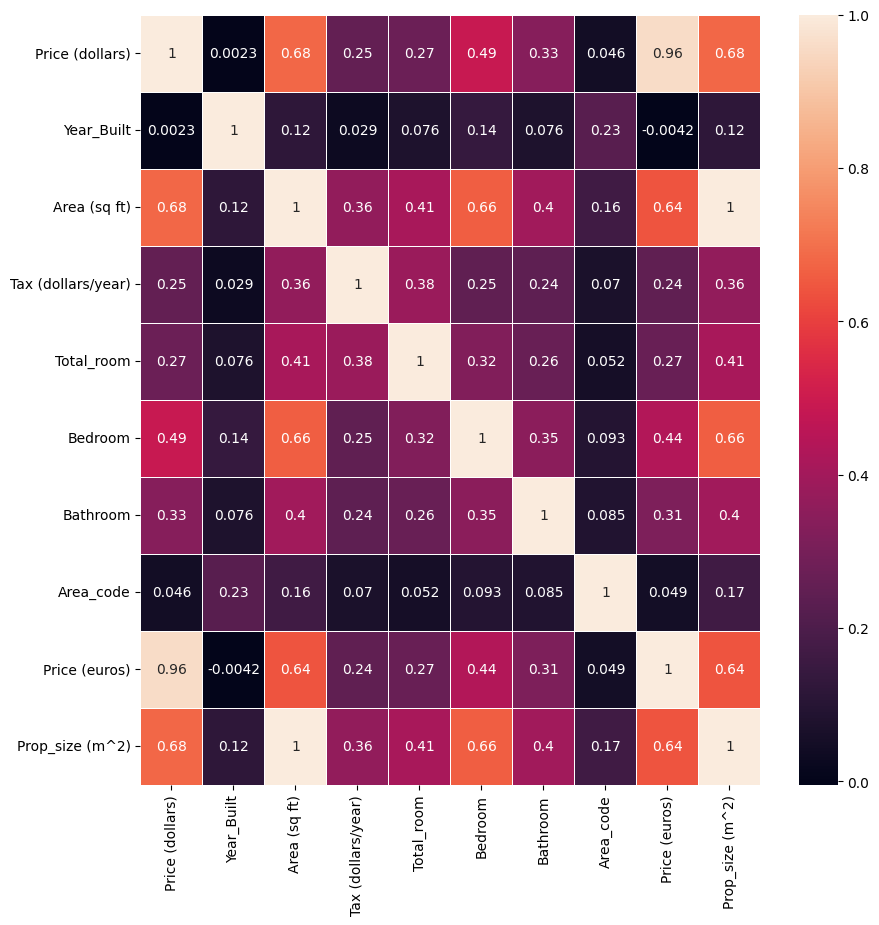

In [ ]:
#Correlation matrix
corr_matrix = without_outliers.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5)
plt.show()

In [ ]:
#Correlation of Price(euros) with other features
without_outliers[without_outliers.columns[1:]].corr()['Price (euros)'][:-1]

Year_Built           -0.004184
Area (sq ft)          0.642146
Tax (dollars/year)    0.244098
Total_room            0.265519
Bedroom               0.435885
Bathroom              0.313986
Area_code             0.049032
Price (euros)         1.000000
Name: Price (euros), dtype: float64

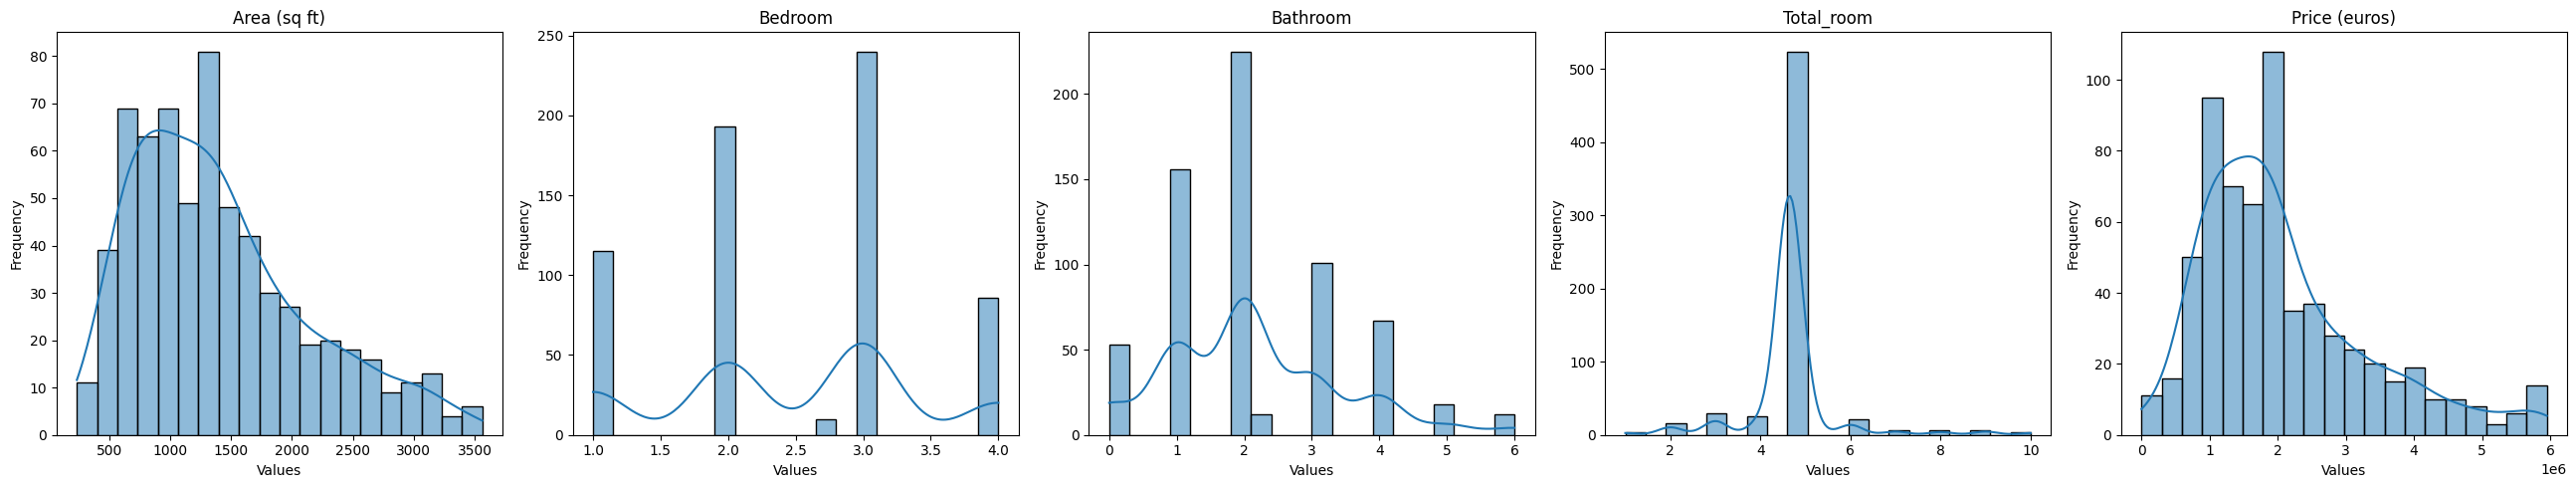

In [ ]:
#Outputs
col_to_analyse = ['Area (sq ft)','Bedroom','Bathroom','Total_room','Price (euros)']

data_to_analyse = without_outliers[col_to_analyse]

plt.figure(figsize=(26, 5))
for i, column in enumerate(data_to_analyse.columns, 1):
    plt.subplot(1, len(data_to_analyse.columns), i)
    sns.histplot(data_to_analyse[column],bins=20, kde=True)
    plt.title(f'{column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [ ]:

import pandas as pd
import numpy as np
import missingno as msno
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [ ]:
salary_data = pd.read_excel("/content/drive/MyDrive/France_Salary_Data.xlsx")

In [ ]:
salary_data.head()

CODGEO             LIBGEO  SNHM14  SNHMC14  SNHMP14  SNHME14  SNHMO14  \
0  1004.0  Ambérieu-en-Bugey    13.7     24.2     15.5     10.3     11.2   
1  1007.0           Ambronay    13.5     22.1     14.7     10.7     11.4   
2  1014.0             Arbent    13.5     27.6     15.6     11.1     11.1   
3  1024.0           Attignat    12.9     21.8     14.1     11.0     11.3   
4  1025.0      Bâgé-la-Ville    13.0     22.8     14.1     10.5     11.1   

   SNHMF14  SNHMFC14  SNHMFP14  ...  SNHMHO14  SNHM1814  SNHM2614  SNHM5014  \
0     11.6      19.1      13.2  ...      11.6      10.5      13.7      16.1   
1     11.9      19.0      13.3  ...      11.7       9.8      13.8      14.6   
2     10.9      19.5      11.7  ...      11.8       9.3      13.3      16.0   
3     11.4      19.0      13.0  ...      11.6       9.6      12.9      14.2   
4     11.6      19.4      13.6  ...      11.4       9.4      12.8      15.2   

   SNHMF1814  SNHMF2614  SNHMF5014  SNHMH1814  SNHMH2614  SNHMH5014  
0        9.7       11.8       12.5       11.0       14.9       18.6  
1        9.2       12.2       12.5       10.2       14.9       16.4  
2        8.9       10.6       12.5        9.6       15.1       18.6  
3        9.3       11.4       12.2        9.7       13.8       15.9  
4        9.0       11.8       12.3        9.7       13.4       16.9  

[5 rows x 26 columns]

In [ ]:
salary_data.tail()

CODGEO             LIBGEO  SNHM14  SNHMC14  SNHMP14  SNHME14  SNHMO14  \
5131  97420.0     Sainte-Suzanne    12.9     24.5     15.4     10.9     10.9   
5132  97421.0            Salazie    10.4     17.3     13.8      9.6      9.8   
5133  97422.0          Le Tampon    12.0     23.3     14.7     10.3     10.5   
5134  97423.0  Les Trois-Bassins    11.4     22.6     13.4     10.1     10.5   
5135  97424.0             Cilaos    10.4     21.0     13.3      8.9     10.2   

      SNHMF14  SNHMFC14  SNHMFP14  ...  SNHMHO14  SNHM1814  SNHM2614  \
5131     12.4      21.6      14.7  ...      11.1       9.2      12.8   
5132      9.8      13.2      11.4  ...      10.0       9.0      10.6   
5133     11.5      21.3      14.1  ...      10.6       8.9      11.9   
5134     10.8      15.9      12.4  ...      10.5       8.9      11.5   
5135      9.8      18.3      13.0  ...      10.3       8.9      10.2   

      SNHM5014  SNHMF1814  SNHMF2614  SNHMF5014  SNHMH1814  SNHMH2614  \
5131      15.4        9.3       12.3       14.7        9.2       13.1   
5132      11.4        8.9        9.9       10.5        9.0       11.0   
5133      14.9        8.9       11.4       13.9        9.0       12.1   
5134      13.1        8.9       11.1       11.4        9.0       11.8   
5135      12.6        9.0        9.5       11.8        8.9       10.4   

      SNHMH5014  
5131       15.8  
5132       11.7  
5133       15.4  
5134       13.7  
5135       12.9  

[5 rows x 26 columns]

In [ ]:
# Display the dataset dimensions (rows and columns).
print("There are {:,} rows and {} columns in the data.".format(salary_data.shape[0], salary_data.shape[1]))

There are 5,136 rows and 26 columns in the data.


In [ ]:
# check the columns in our data
salary_data.columns

Index(['CODGEO', 'LIBGEO', 'SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014'],
      dtype='object')

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     5107 non-null   float64
 1   LIBGEO     5136 non-null   object 
 2   SNHM14     5136 non-null   float64
 3   SNHMC14    5136 non-null   float64
 4   SNHMP14    5136 non-null   float64
 5   SNHME14    5136 non-null   float64
 6   SNHMO14    5136 non-null   float64
 7   SNHMF14    5136 non-null   float64
 8   SNHMFC14   5136 non-null   float64
 9   SNHMFP14   5136 non-null   float64
 10  SNHMFE14   5136 non-null   float64
 11  SNHMFO14   5136 non-null   float64
 12  SNHMH14    5136 non-null   float64
 13  SNHMHC14   5136 non-null   float64
 14  SNHMHP14   5136 non-null   float64
 15  SNHMHE14   5136 non-null   float64
 16  SNHMHO14   5136 non-null   float64
 17  SNHM1814   5136 non-null   float64
 18  SNHM2614   5136 non-null   float64
 19  SNHM5014   5136 non-null   float64
 20  SNHMF181

In [ ]:
# Sum missing values in each column and then sum those counts to get the total
total_missing = sum(salary_data[col].isnull().sum() for col in salary_data.columns)

# Print the total missing values
print("There are {} missing values in the data.".format(total_missing))


There are 29 missing values in the data.


<Axes: >

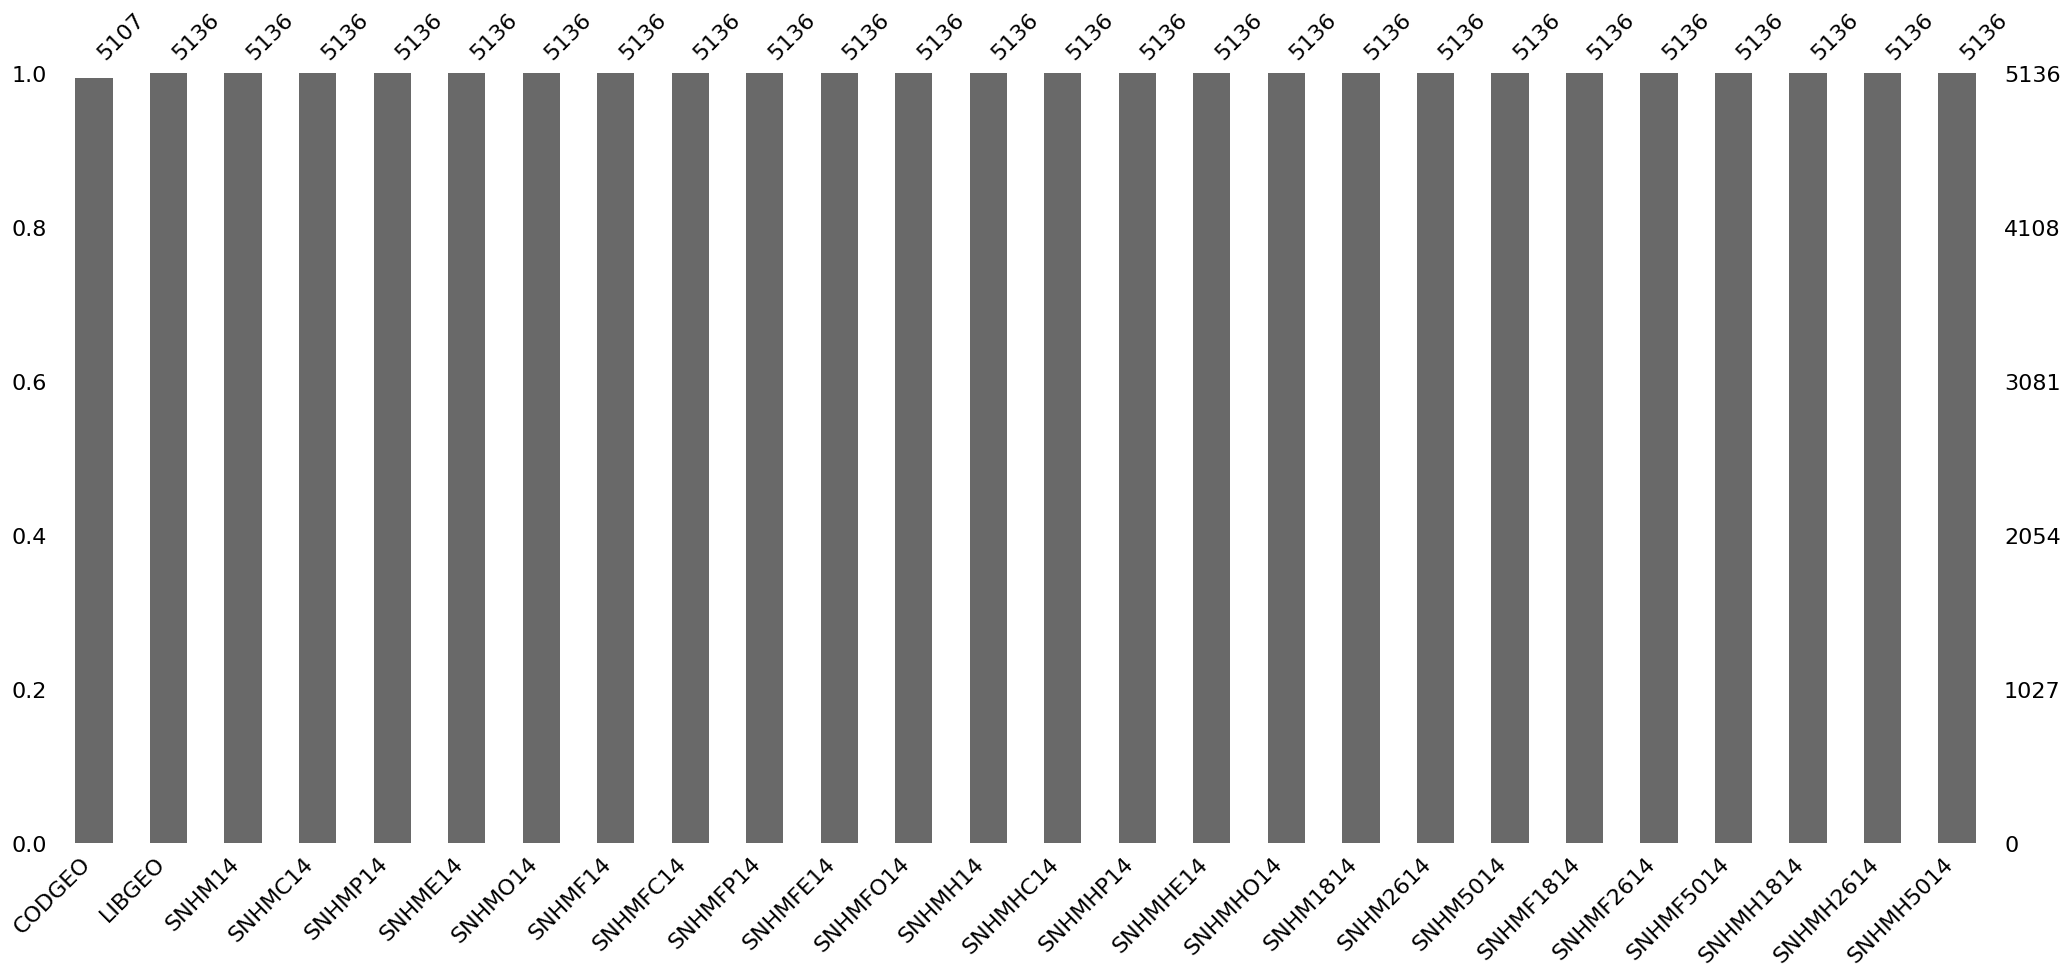

In [ ]:
msno.bar(salary_data)

In [ ]:
# Identify rows with any missing values
rows_with_any_missing_values = salary_data[salary_data.isnull().any(axis=1)]

# Print the result as a DataFrame
print("Rows with any missing values:")
print(rows_with_any_missing_values.to_string(index=False))  # to_string() formats output for better readability

Rows with any missing values:
 CODGEO               LIBGEO  SNHM14  SNHMC14  SNHMP14  SNHME14  SNHMO14  SNHMF14  SNHMFC14  SNHMFP14  SNHMFE14  SNHMFO14  SNHMH14  SNHMHC14  SNHMHP14  SNHMHE14  SNHMHO14  SNHM1814  SNHM2614  SNHM5014  SNHMF1814  SNHMF2614  SNHMF5014  SNHMH1814  SNHMH2614  SNHMH5014
    NaN                  Afa    13.8     24.0     15.7     10.9     10.9     12.3      19.8      14.0      10.4       9.6     14.9      26.4      16.9      11.8      11.1       9.8      13.6      16.8        9.6       12.3       13.6        9.9       14.7       19.0
    NaN              Ajaccio    13.0     22.8     15.4     10.5     10.7     11.9      19.8      14.1      10.3       8.8     13.8      24.6      16.4      10.9      11.0       9.5      12.5      15.3        9.2       11.6       13.6        9.8       13.3       16.6
    NaN                Alata    13.5     22.4     15.6     10.8     11.2     12.4      19.9      14.0      10.7       8.9     14.3      24.0      16.7      11.0      11.

In [ ]:
# Drop rows where CODGEO is missing
salary_data = salary_data.dropna(subset=['CODGEO'])

# Display the cleaned dataset
print("Data After Dropping Rows with Missing CODGEO Values:")
salary_data.head()

Data After Dropping Rows with Missing CODGEO Values:


CODGEO             LIBGEO  SNHM14  SNHMC14  SNHMP14  SNHME14  SNHMO14  \
0  1004.0  Ambérieu-en-Bugey    13.7     24.2     15.5     10.3     11.2   
1  1007.0           Ambronay    13.5     22.1     14.7     10.7     11.4   
2  1014.0             Arbent    13.5     27.6     15.6     11.1     11.1   
3  1024.0           Attignat    12.9     21.8     14.1     11.0     11.3   
4  1025.0      Bâgé-la-Ville    13.0     22.8     14.1     10.5     11.1   

   SNHMF14  SNHMFC14  SNHMFP14  ...  SNHMHO14  SNHM1814  SNHM2614  SNHM5014  \
0     11.6      19.1      13.2  ...      11.6      10.5      13.7      16.1   
1     11.9      19.0      13.3  ...      11.7       9.8      13.8      14.6   
2     10.9      19.5      11.7  ...      11.8       9.3      13.3      16.0   
3     11.4      19.0      13.0  ...      11.6       9.6      12.9      14.2   
4     11.6      19.4      13.6  ...      11.4       9.4      12.8      15.2   

   SNHMF1814  SNHMF2614  SNHMF5014  SNHMH1814  SNHMH2614  SNHMH5014  
0        9.7       11.8       12.5       11.0       14.9       18.6  
1        9.2       12.2       12.5       10.2       14.9       16.4  
2        8.9       10.6       12.5        9.6       15.1       18.6  
3        9.3       11.4       12.2        9.7       13.8       15.9  
4        9.0       11.8       12.3        9.7       13.4       16.9  

[5 rows x 26 columns]

<Axes: >

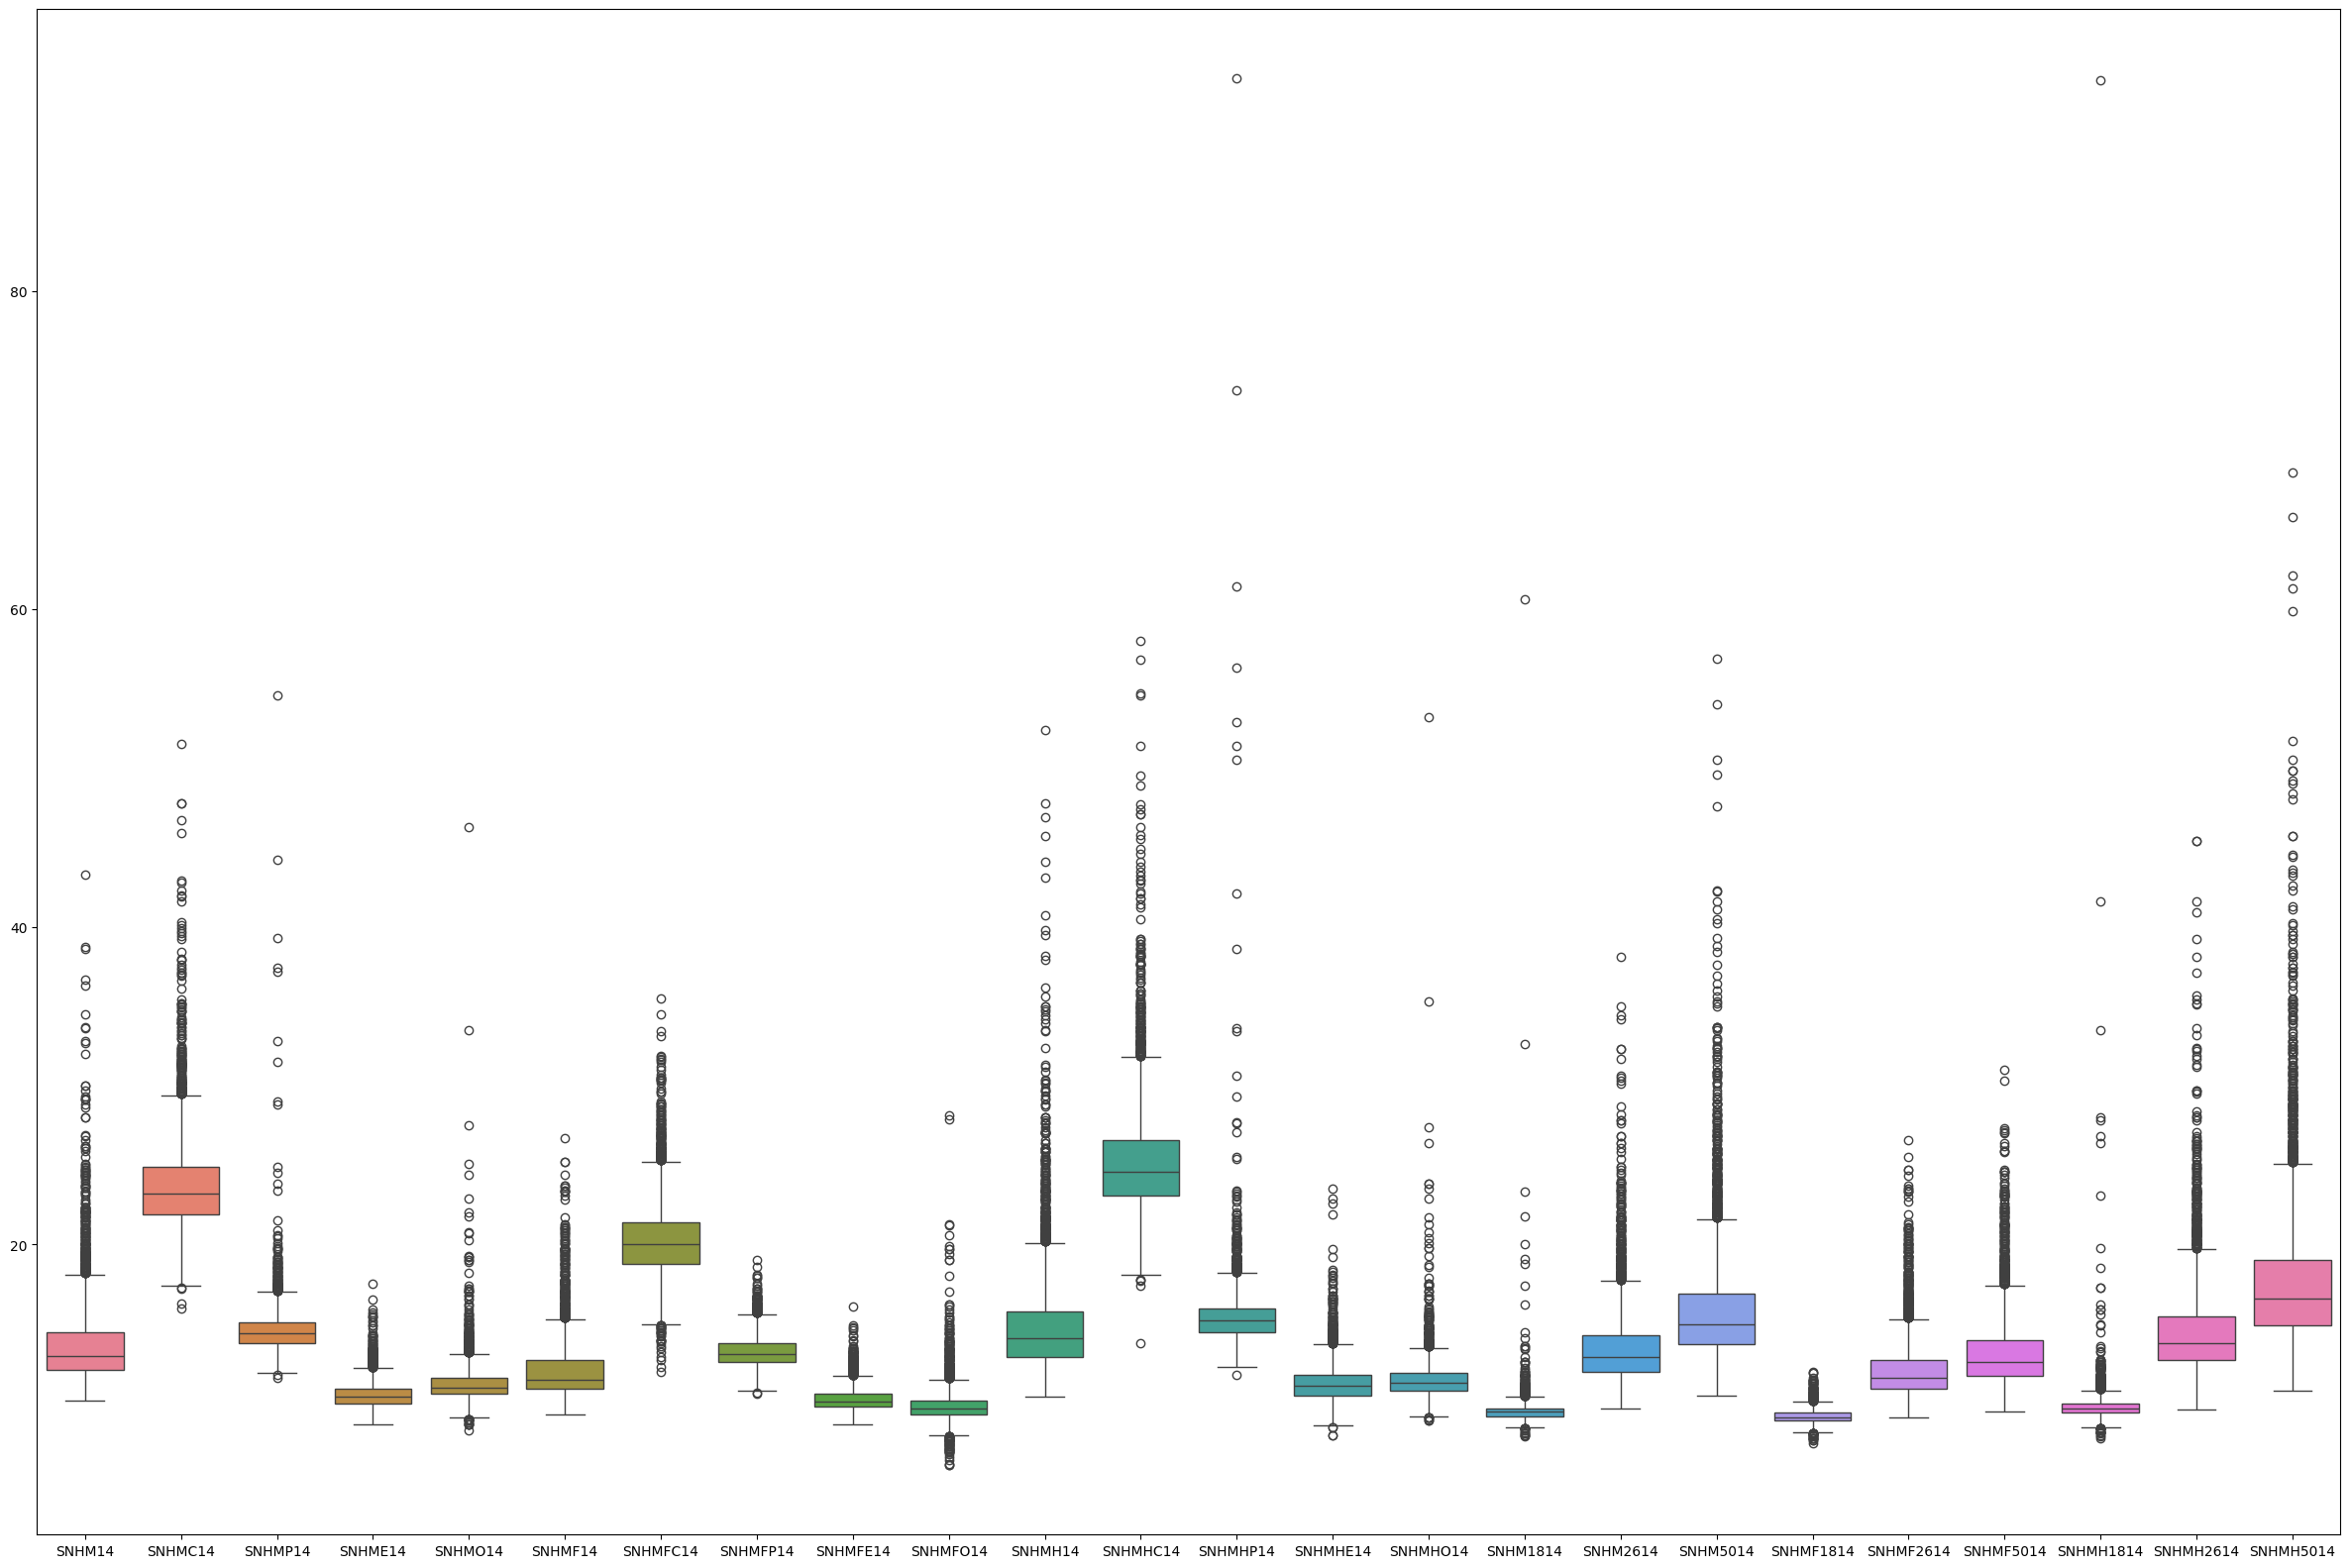

In [ ]:
plt.figure(figsize=(30,20))

# Specify the correct column names in a list format
columns_to_plot = ['SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014']

# Use the correct syntax to select and plot multiple columns
sns.boxplot(data=salary_data[columns_to_plot])

In [ ]:
#Define the Function to Cap Outliers
def cap_outliers(data, column):
    Q1 = salary_data[column].quantile(0.25)
    Q3 = salary_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    salary_data[column] = salary_data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return data

#List of Numeric Columns
numeric_columns =  ['SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014']

#Loop Through Each Column and Cap Outliers
for column in numeric_columns:
    salary_data = cap_outliers(salary_data, column)

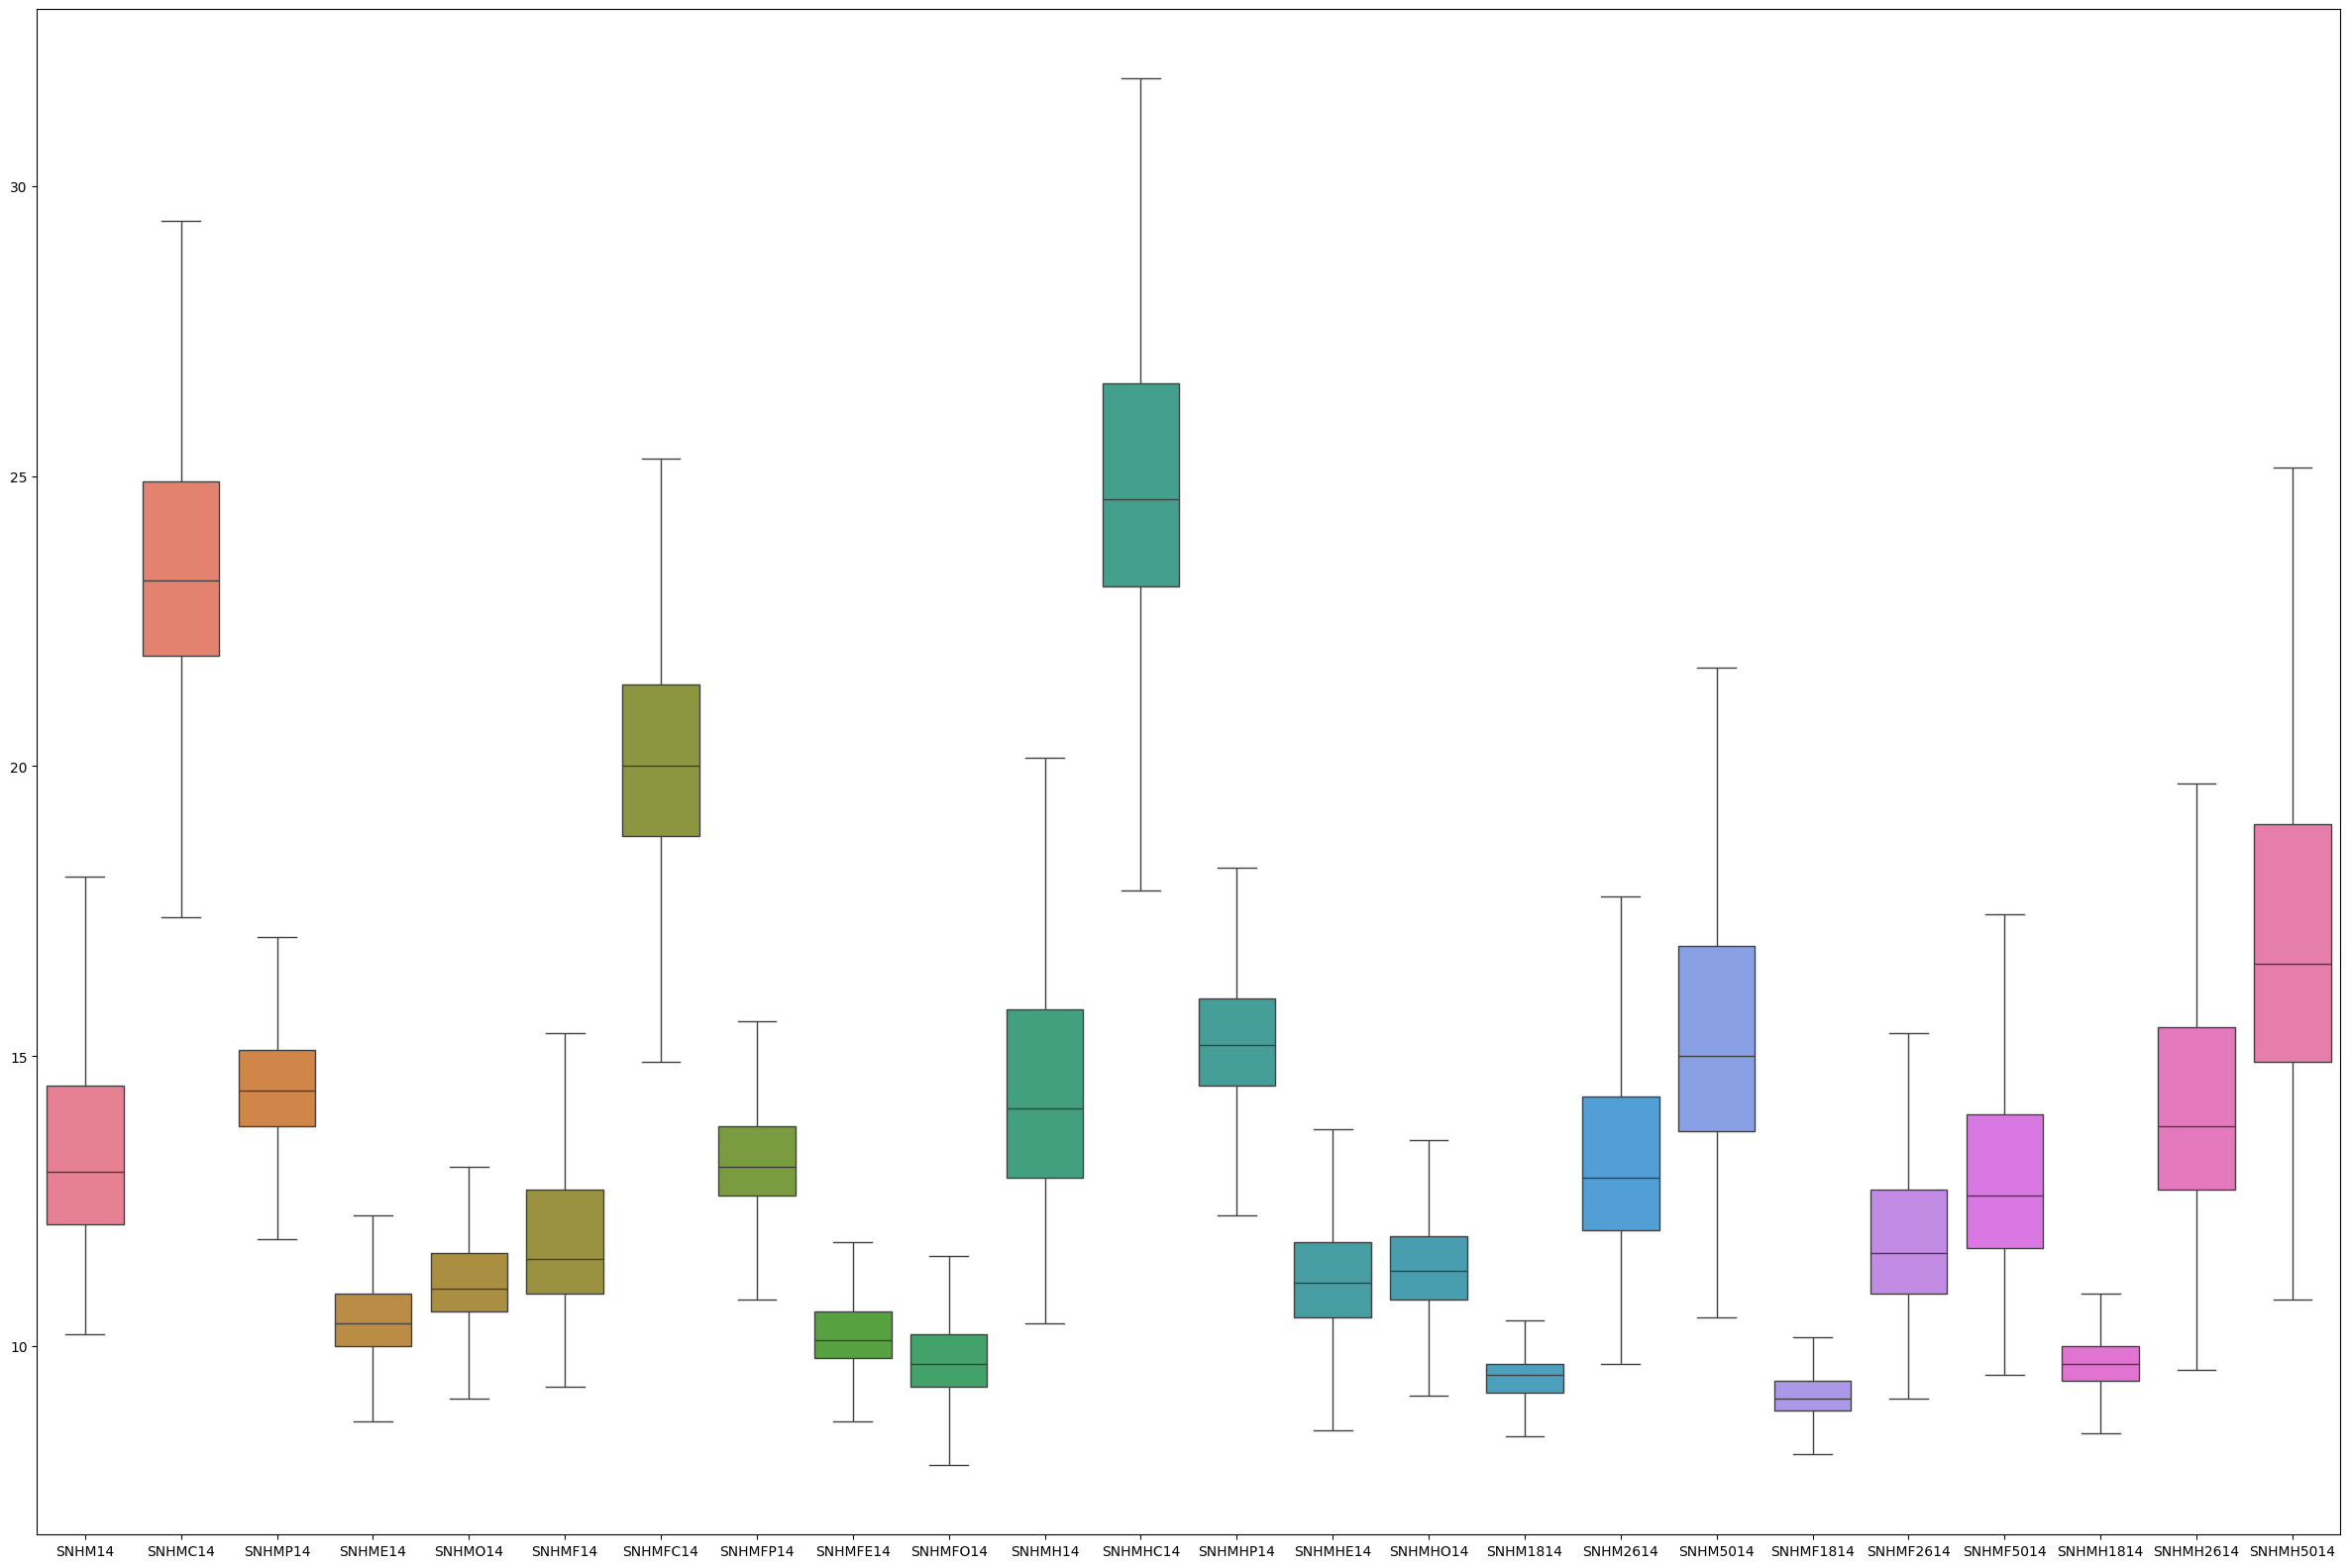

In [ ]:
plt.figure(figsize=(30, 20))

# Specify the correct column names in a list format
columns_to_plot = ['SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014']

# Use the correct syntax to select and plot multiple columns
sns.boxplot(data=salary_data[columns_to_plot])

plt.show()

In [ ]:
desc_stats = salary_data.describe().T

# Create a custom style for the DataFrame visualization
def custom_style(val):
    color = '#606ff0'
    return f'background-color: {color}; color: white'

# Apply the custom style to the whole DataFrame
styled_desc_stats = desc_stats.style.applymap(custom_style)

# Apply background gradient to 'std' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['std'], cmap='PuBu')

# Apply background gradient to '50%' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['50%'], cmap='PuBu')

# Display the styled descriptive statistics DataFrame
styled_desc_stats


In [ ]:
#Display the summary statistics for categorical columns
categorical_summary = salary_data.select_dtypes(include=object).describe()
display(categorical_summary)

LIBGEO
count           5107
unique          5056
top     Sainte-Marie
freq               4

In [ ]:
skim(salary_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5107   │ │ float64     │ 25    │                                                          │
│ │ Number of columns │ 26     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ CODGEO         │   0 │      0 │   52530 │    25780 │    1004 │  33040 │  56130 │  74090 │  97420 │ ▅▆▇▇▇▆  │  │
│ │ SNHM14         │   0 │      0 │   13.53 │     1.87 │    10.2 │   12.1 │     13 │   14.5 │   18.1 │ ▂▇▆▃▂▂  │  │
│ │ SNHMC14        │   0 │      0 │   23.59 │    2.358 │    17.4 │   21.9 │   23.2 │   24.9 │   29.4 │  ▃▇▆▃▂  │  │
│ │ SNHMP14        │   0 │      0 │   14.51 │   0.9934 │   11.85 │   13.8 │   14.4 │   15.1 │  17.05 │  ▃▇▆▂▂  │  │
│ │ SNHME14        │   0 │      0 │   10.53 │    0.703 │     8.7 │     10 │   10.4 │   10.9 │  12.25 │  ▃▇▅▂▂  │  │
│ │ SNHMO14        │   0 │      0 │   11.17 │   0.7953 │     9.1 │   10.6 │     11 │   11.6 │   13.1 │  ▃▇▇▃▂  │  │
│ │ SNHMF14        │   0 │      0 │   11.94 │    1.419 │     9.3 │   10.9 │   11.5 │   12.7 │   15.4 │ ▂▇▆▃▂▂  │  │
│ │ SNHMFC14       │   0 │      0 │   20.17 │    2.115 │    14.9 │   18.8 │     20 │   21.4 │   25.3 │ ▁▃▇▇▃▂  │  │
│ │ SNHMFP14       │   0 │      0 │   13.26 │   0.9403 │    10.8 │   12.6 │   13.1 │   13.8 │   15.6 │  ▃▇▆▃▂  │  │
│ │ SNHMFE14       │   0 │      0 │   10.28 │   0.6512 │     8.7 │    9.8 │   10.1 │   10.6 │   11.8 │  ▅▇▅▂▂  │  │
│ │ SNHMFO14       │   0 │      0 │   9.766 │   0.7663 │    7.95 │    9.3 │    9.7 │   10.2 │  11.55 │ ▁▃▇▆▂▂  │  │
│ │ SNHMH14        │   0 │      0 │   14.63 │    2.269 │    10.4 │   12.9 │   14.1 │   15.8 │  20.15 │ ▂▇▆▃▂▂  │  │
│ │ SNHMHC14       │   0 │      0 │   25.04 │    2.791 │   17.85 │   23.1 │   24.6 │   26.6 │  31.85 │  ▃▇▆▃▂  │  │
│ │ SNHMHP14       │   0 │      0 │   15.36 │    1.176 │   12.25 │   14.5 │   15.2 │     16 │  18.25 │  ▃▇▆▃▂  │  │
│ │ SNHMHE14       │   0 │      0 │   11.23 │   0.9694 │    8.55 │   10.5 │   11.1 │   11.8 │  13.75 │  ▂▇▆▂▂  │  │
│ │ SNHMHO14       │   0 │      0 │   11.43 │   0.8264 │    9.15 │   10.8 │   11.3 │   11.9 │  13.55 │  ▃▇▆▃▂  │  │
│ │ SNHM1814       │   0 │      0 │   9.502 │   0.4068 │    8.45 │    9.2 │    9.5 │    9.7 │  10.45 │  ▅▇▇▃▂  │  │
│ │ SNHM2614       │   0 │      0 │   13.35 │    1.807 │     9.7 │     12 │   12.9 │   14.3 │  17.75 │ ▁▇▇▅▂▂  │  │
│ │ SNHM5014       │   0 │      0 │   15.61 │    2.589 │    10.5 │   13.7 │     15 │   16.9 │   21.7 │ ▁▇▇▃▂▂  │  │
│ │ SNHMF1814      │   0 │      0 │   9.151 │   0.4119 │    8.15 │    8.9 │    9.1 │    9.4 │  10.15 │ ▁▅▇▆▃▂  │  │
│ │ SNHMF2614      │   0 │      0 │   11.95 │    1.452 │     9.1 │   10.9 │   11.6 │   12.7 │   15.4 │ ▁▇▇▃▂▂  │  │
│ │ SNHMF5014      │   0 │      0 │   13.05 │    1.836 │     9.5 │   11.7 │   12.6 │     14 │  17.45 │ ▂▇▇▃▂▂  │  │
│ │ SNHMH1814      │   0 │      0 │   9.746 │   0.5006 │

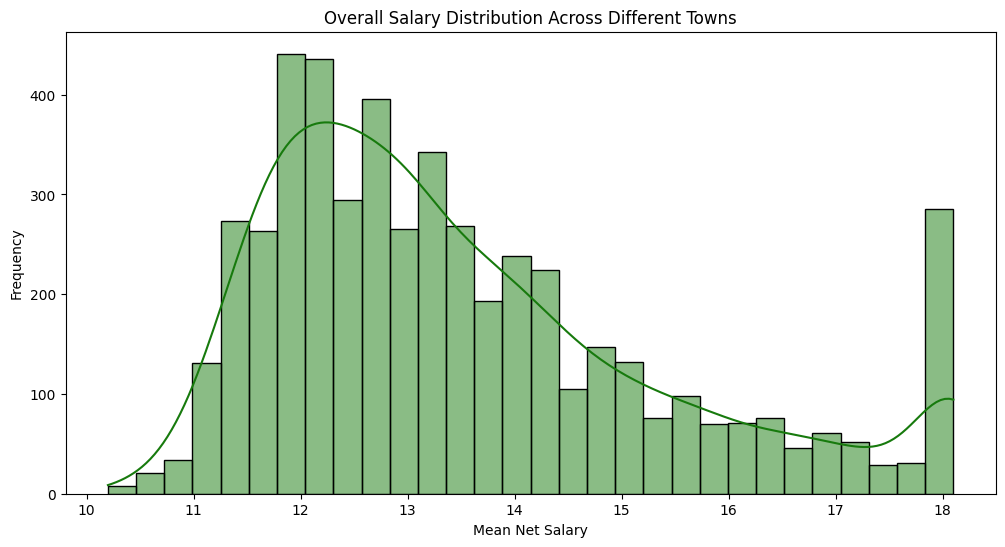

In [ ]:
# 1. Overall Salary Distribution Across Different Towns
plt.figure(figsize=(12, 6))
sns.histplot(salary_data['SNHM14'], bins=30, kde=True, color = '#177a0d')
plt.title('Overall Salary Distribution Across Different Towns')
plt.xlabel('Mean Net Salary')
plt.ylabel('Frequency')
plt.show()

<ipython-input-25-97710462b010>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_labels, y=role_means, palette=colors)


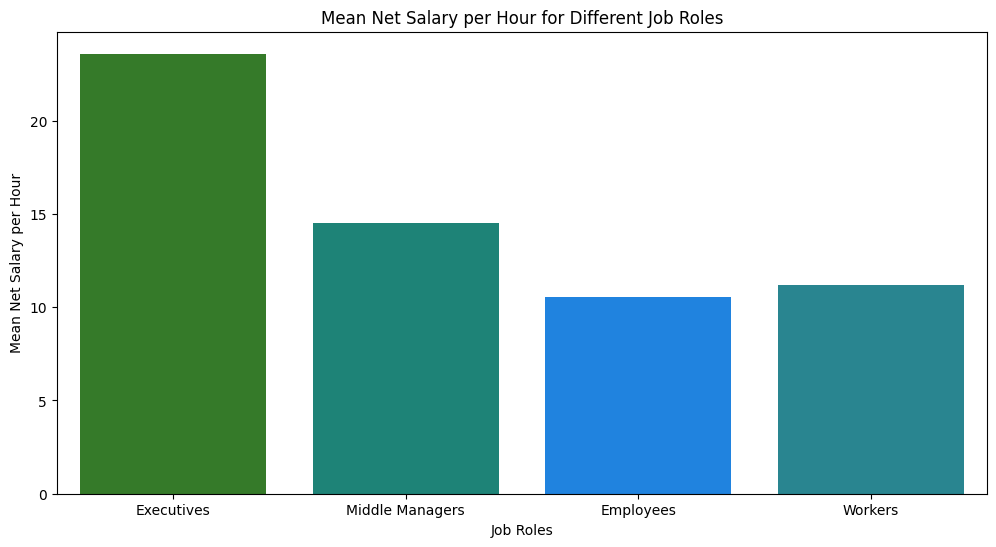

In [ ]:
# 2. Wage Disparities Between Different Job Roles
roles = ['SNHMC14', 'SNHMP14', 'SNHME14', 'SNHMO14']
role_labels = ['Executives', 'Middle Managers', 'Employees', 'Workers']
role_means = [salary_data[role].mean() for role in roles]

# Custom colors
colors = ['#2b871c', '#0d9484', '#0084ff', '#1893a1']

plt.figure(figsize=(12, 6))
sns.barplot(x=role_labels, y=role_means, palette=colors)
plt.title('Mean Net Salary per Hour for Different Job Roles')
plt.xlabel('Job Roles')
plt.ylabel('Mean Net Salary per Hour')
plt.show()

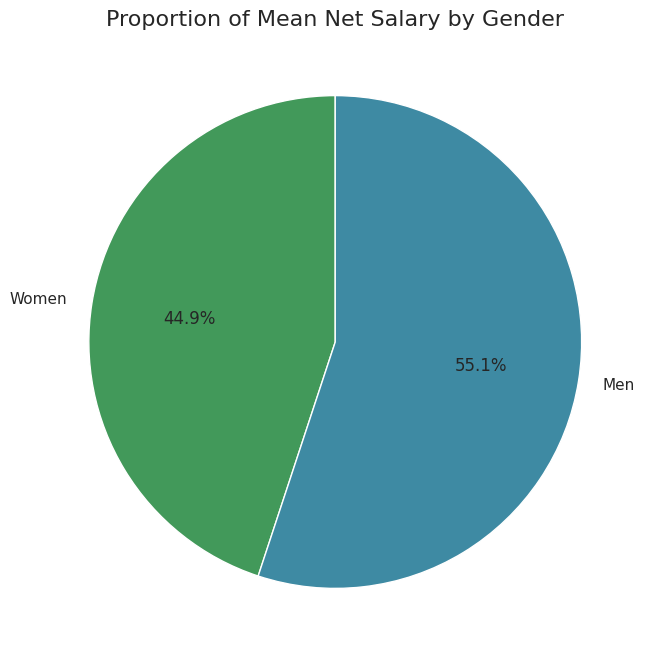

In [ ]:
# 3. Gender Pay Gap
gender_means = [salary_data[gender].mean() for gender in genders]

plt.figure(figsize=(8, 8))
plt.pie(gender_means, labels=gender_labels, autopct='%1.1f%%', colors=['#42995a','#3e8aa3'], startangle=90)
plt.title('Proportion of Mean Net Salary by Gender', fontsize=16)
plt.show()


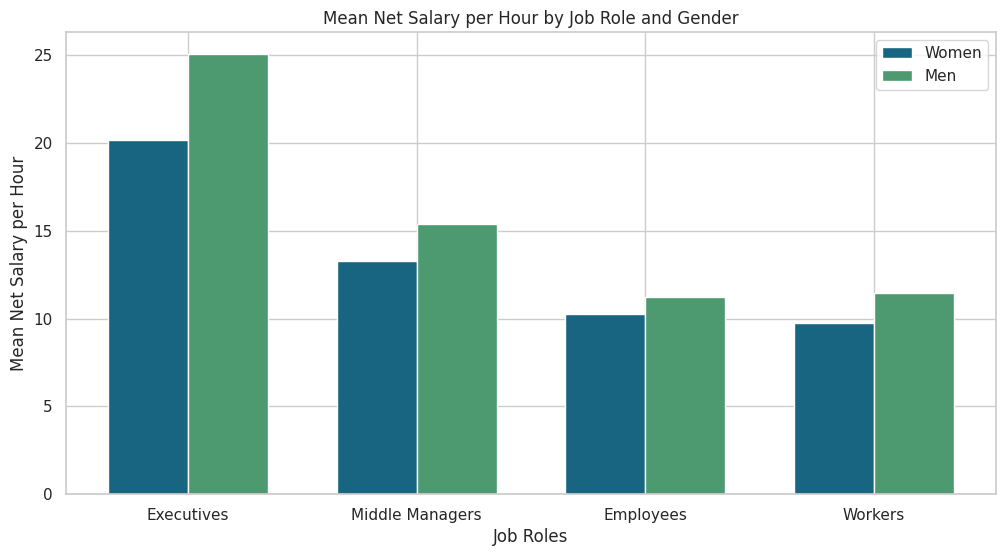

In [ ]:
# 4. Mean Net Salary for Different Job Roles by Gender
female_roles = ['SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14']
male_roles = ['SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14']

female_means = [salary_data[role].mean() for role in female_roles]
male_means = [salary_data[role].mean() for role in male_roles]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(role_labels))

# Change the colors here
bar1 = plt.bar(index, female_means, bar_width, color='#176580', label='Women')
bar2 = plt.bar([p + bar_width for p in index], male_means, bar_width, color='#4d9970', label='Men')

plt.xlabel('Job Roles')
plt.ylabel('Mean Net Salary per Hour')
plt.title('Mean Net Salary per Hour by Job Role and Gender')
plt.xticks([p + bar_width/2 for p in index], role_labels)
plt.legend()
plt.show()


<ipython-input-44-92d88193a9fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_labels, y=age_means, palette=colors)


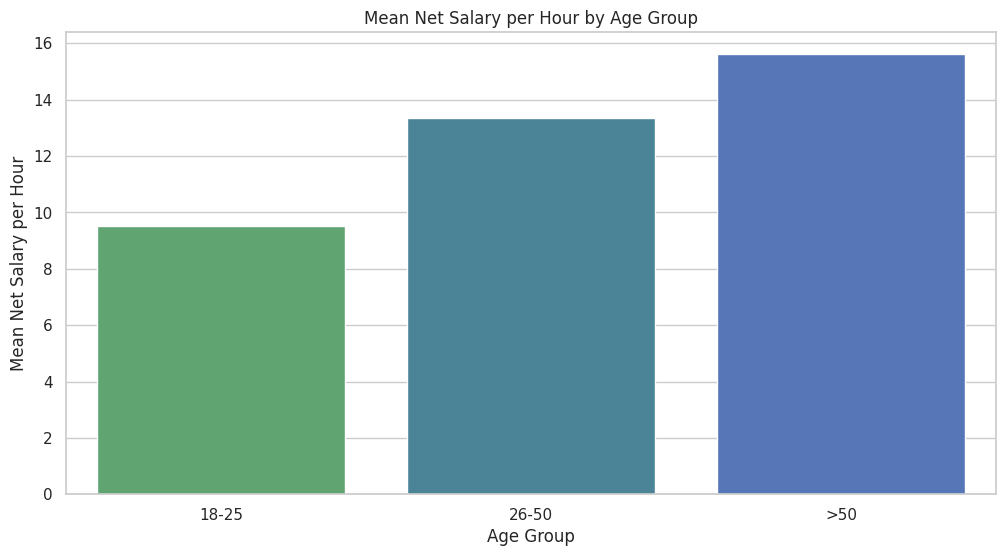

In [ ]:
# 5. Impact of Age on Salary
age_groups = ['SNHM1814', 'SNHM2614', 'SNHM5014']
age_labels = ['18-25', '26-50', '>50']
age_means = [salary_data[age].mean() for age in age_groups]
colors =['#54b06d','#3e8aa3', '#4671c7']

plt.figure(figsize=(12, 6))
sns.barplot(x=age_labels, y=age_means, palette=colors)
plt.title('Mean Net Salary per Hour by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Net Salary per Hour')
plt.show()


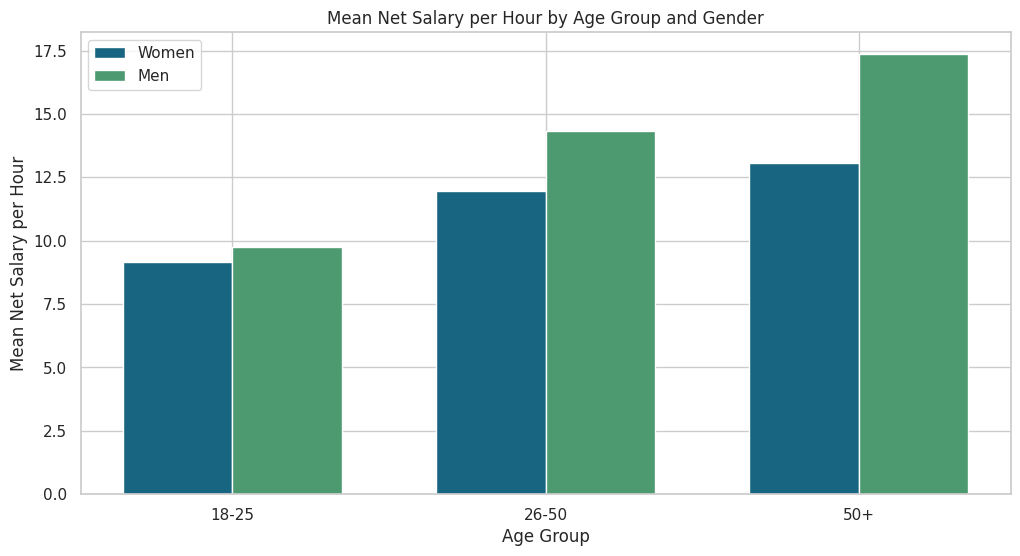

In [ ]:
# 6. Gender Pay Gap Across Age Groups
# Age groups and labels
female_ages = ['SNHMF1814', 'SNHMF2614', 'SNHMF5014']
male_ages = ['SNHMH1814', 'SNHMH2614', 'SNHMH5014']
age_labels = ['18-25', '26-50', '50+']

# Calculate mean salaries
female_age_means = [salary_data[age].mean() for age in female_ages]
male_age_means = [salary_data[age].mean() for age in male_ages]

# Define index for the age groups
index = np.arange(len(age_labels))

# Width of the bars
bar_width = 0.35

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, female_age_means, bar_width, label='Women',  color='#176580')
bar2 = ax.bar(index + bar_width, male_age_means, bar_width, label='Men', color='#4d9970')

# Adding labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Mean Net Salary per Hour')
ax.set_title('Mean Net Salary per Hour by Age Group and Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(age_labels)
ax.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv("paris_attitude_rental.csv")
df.head(2)

Address  Postal_code  Arrondissement  Area  Price  Bedroom  \
0  Place de Clichy - Paris        75009               9   109   3800        3   
1          Auteuil - Paris        75016              16    63   2500        2   

   Occupants  Floor  Energy   GHG  Elevator Available_date  \
0          6      2   220.0  47.0       0.0     07/18/2024   
1          4      1   413.0  13.0       0.0     07/18/2024   

                                         Description  
0  This charming and very well situated 109 squar...  
1  This comfortable and spacious 63 square meters...

In [ ]:
# Mapping dictionary
arrondissement_names = {
    1: 'Louvre', 2: 'Bourse', 3: 'Temple', 4: 'Hôtel-de-Ville', 5: 'Panthéon', 6: 'Luxembourg', 7: 'Palais-Bourbon',
    8: 'Élysée', 9: 'Opéra', 10: 'Entrepôt', 11: 'Popincourt', 12: 'Reuilly', 13: 'Gobelins', 14: 'Observatoire',
    15: 'Vaugirard', 16: 'Passy', 17: 'Batignolles-Monceau', 18: 'Butte-Montmartre', 19: 'Buttes-Chaumont', 20: 'Ménilmontant',
    92:  'Hauts-de-Seine', 93: 'Seine-Saint-Denis', 94: 'Val-de-Marne'}

# Map the arrondissement numbers to names
df['Arrondissement_Name'] = df['Arrondissement'].map(arrondissement_names)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              3783 non-null   object 
 1   Postal_code          3783 non-null   int64  
 2   Arrondissement       3783 non-null   int64  
 3   Area                 3783 non-null   int64  
 4   Price                3783 non-null   int64  
 5   Bedroom              3783 non-null   int64  
 6   Occupants            3783 non-null   int64  
 7   Floor                3783 non-null   int64  
 8   Energy               1495 non-null   float64
 9   GHG                  1494 non-null   float64
 10  Elevator             3215 non-null   float64
 11  Available_date       3783 non-null   object 
 12  Description          3782 non-null   object 
 13  Arrondissement_Name  3783 non-null   object 
dtypes: float64(3), int64(7), object(4)
memory usage: 413.9+ KB


In [ ]:
columns_to_drop = ['Energy', 'GHG']

# Dropping columns
df_truncated = df.drop(columns=columns_to_drop)

In [ ]:
df_truncated["Elevator"].unique()

array([ 0.,  1., nan])

In [ ]:
df_truncated['Elevator'] = df_truncated['Elevator'].fillna(0)

In [ ]:
df_truncated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              3783 non-null   object 
 1   Postal_code          3783 non-null   int64  
 2   Arrondissement       3783 non-null   int64  
 3   Area                 3783 non-null   int64  
 4   Price                3783 non-null   int64  
 5   Bedroom              3783 non-null   int64  
 6   Occupants            3783 non-null   int64  
 7   Floor                3783 non-null   int64  
 8   Elevator             3783 non-null   float64
 9   Available_date       3783 non-null   object 
 10  Description          3782 non-null   object 
 11  Arrondissement_Name  3783 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 354.8+ KB


In [ ]:
df_truncated['Arrondissement'] = df_truncated['Arrondissement'].astype(str)

In [ ]:
df_truncated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              3783 non-null   object 
 1   Postal_code          3783 non-null   int64  
 2   Arrondissement       3783 non-null   object 
 3   Area                 3783 non-null   int64  
 4   Price                3783 non-null   int64  
 5   Bedroom              3783 non-null   int64  
 6   Occupants            3783 non-null   int64  
 7   Floor                3783 non-null   int64  
 8   Elevator             3783 non-null   float64
 9   Available_date       3783 non-null   object 
 10  Description          3782 non-null   object 
 11  Arrondissement_Name  3783 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 354.8+ KB


In [ ]:
df_truncated.describe()

Postal_code         Area         Price      Bedroom    Occupants  \
count   3783.000000  3783.000000   3783.000000  3783.000000  3783.000000   
mean   75425.767909    45.606397   2348.809939     1.283373     2.597674   
std     2655.041253    29.482227   1526.961707     0.575414     1.188218   
min    75001.000000    12.000000    790.000000     1.000000     1.000000   
25%    75008.000000    25.000000   1400.000000     1.000000     2.000000   
50%    75008.000000    36.000000   1935.000000     1.000000     2.000000   
75%    75011.000000    56.000000   2783.500000     1.000000     3.000000   
max    94300.000000   330.000000  24211.000000     5.000000    13.000000   

             Floor     Elevator  
count  3783.000000  3783.000000  
mean      2.914354     0.613270  
std       2.115782     0.487065  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       3.000000     1.000000  
75%       4.000000     1.000000  
max       9.000000     1.000000

In [ ]:
average_prices_area = df_truncated.groupby(['Arrondissement_Name', 'Area', 'Bedroom', 'Floor'])['Price'].mean().reset_index()
average_prices_area.columns = ['Arrondissement_Name', 'Area', 'Bedroom', 'Floor', 'Average Price']  # Rename columns for clarity
print(average_prices_area)

      Arrondissement_Name  Area  Bedroom  Floor  Average Price
0     Batignolles-Monceau    15        1      4          842.0
1     Batignolles-Monceau    15        1      6         1075.0
2     Batignolles-Monceau    16        1      2         1054.0
3     Batignolles-Monceau    19        1      0         1065.0
4     Batignolles-Monceau    20        1      0         1000.0
...                   ...   ...      ...    ...            ...
1739               Élysée   112        2      7        10603.0
1740               Élysée   154        3      2         6500.0
1741               Élysée   161        3      1         9677.0
1742               Élysée   170        3      4         5500.0
1743               Élysée   200        3      1        12000.0

[1744 rows x 5 columns]


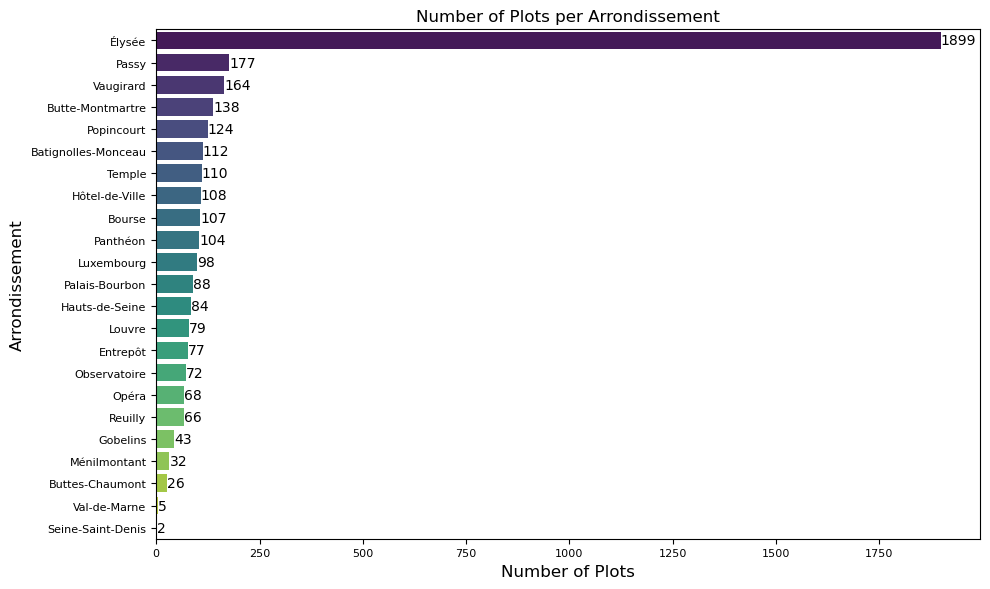

In [ ]:
# Count the number of occurrences for each 'Arrondissement_Name'
counts = df_truncated['Arrondissement_Name'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=counts.values, y=counts.index, palette='viridis')

# Add the counts at the end of each bar
for i, value in enumerate(counts.values):
    ax.text(value + 0.1, i, str(value), va='center', fontsize=10)  # Adjust the offset (0.1) as needed

plt.title('Number of Plots per Arrondissement', fontsize=12)
plt.xlabel('Number of Plots', fontsize=12)
plt.ylabel('Arrondissement', fontsize=12)
plt.tick_params(labelsize=8)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

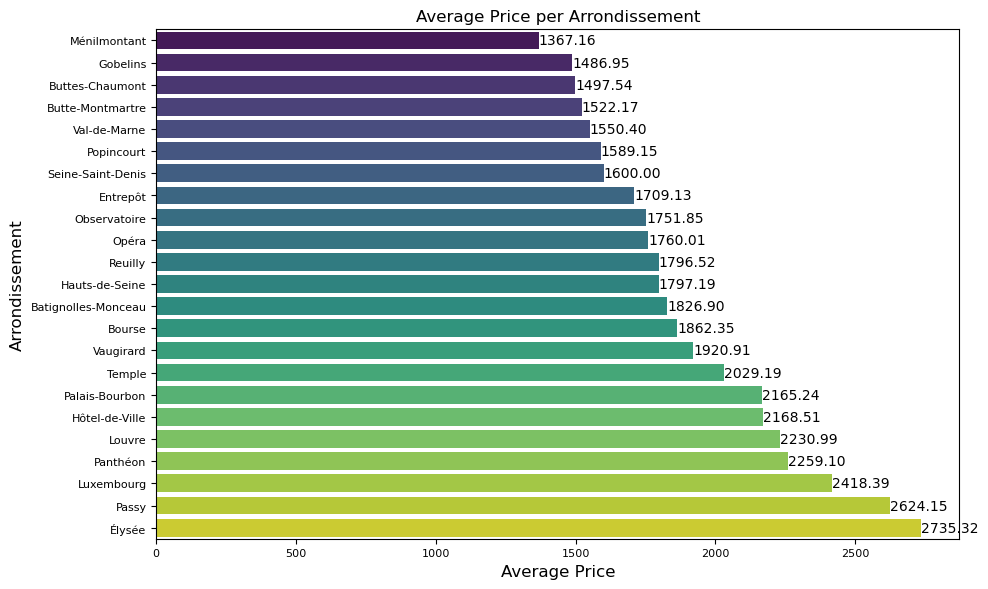

In [ ]:
# Calculate the average price for each 'Arrondissement_Name'
average_prices = df_truncated.groupby('Arrondissement_Name')['Price'].mean().sort_values()

# Create a horizontal bar chart for average prices
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=average_prices.values, y=average_prices.index, palette='viridis')

# Add the average prices at the end of each bar
for i, value in enumerate(average_prices.values):
    ax.text(value + 0.1, i, f'{value:.2f}', va='center', fontsize=10)  # Adjust the offset (0.1) as needed

plt.title('Average Price per Arrondissement', fontsize=12)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Arrondissement', fontsize=12)
plt.tick_params(labelsize=8)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
df_truncated['Address'].nunique()

137

In [ ]:
average_prices_area = df_truncated.groupby(['Address', 'Area'])['Price'].mean().reset_index()
average_prices_area.columns = ['Address', 'Area', 'Average Price']  # Rename columns for clarity
print(average_prices_area)

               Address  Area  Average Price
0       Alésia - Paris    19         1129.0
1       Alésia - Paris    23         1048.0
2       Alésia - Paris    24         1290.0
3       Alésia - Paris    25          951.0
4       Alésia - Paris    29         1344.0
...                ...   ...            ...
1430  Voltaire - Paris    50         2105.0
1431  Voltaire - Paris    68         2699.0
1432  Voltaire - Paris    79         2828.0
1433  Voltaire - Paris    86         3118.0
1434  Voltaire - Paris   120         3763.0

[1435 rows x 3 columns]


In [ ]:
df_truncated.head(2)

Address  Postal_code Arrondissement  Area  Price  Bedroom  \
0  Place de Clichy - Paris        75009              9   109   3800        3   
1          Auteuil - Paris        75016             16    63   2500        2   

   Occupants  Floor  Elevator Available_date  \
0          6      2       0.0     07/18/2024   
1          4      1       0.0     07/18/2024   

                                         Description Arrondissement_Name  
0  This charming and very well situated 109 squar...               Opéra  
1  This comfortable and spacious 63 square meters...               Passy

In [ ]:
df_truncated.to_csv("paris_attitude_rental_cleaned.csv")

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_excel('/content/paris_dataset - Copy (1).xlsx')

In [ ]:
data.head(100)

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  536.396682  Entire home/apt        False         False   
1           1  290.101594     Private room        False          True   
2           2  445.754497  Entire home/apt        False         False   
3           3  211.343089     Private room        False          True   
4           4  266.334234  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  cleanliness_rating  \
0                5              False      0                   9   
1                2               True      0                  10   
2                4              False      0                  10   
3                2              False      0                  10   
4                2               True      0                   9   

   guest_satisfatcion  bedrooms      dist  metro_dist      lng       lat  
0                  89         1  1.351201    0.212346  2.35900  48.86800  
1                  97         1  0.699821    0.193710  2.35385  48.86282  
2                 100         1  0.968982    0.294343  2.36023  48.86375  
3                  94         1  3.302319    0.234740  2.31714  48.87475  
4                  88         1  1.402430    0.055052  2.33408  48.85384

In [ ]:
data = data.rename(columns={data.columns[0]: 'id'})
data = data.rename(columns={data.columns[1]: 'Cost'})
data = data.rename(columns={data.columns[9]: 'guest_satisfaction'})

In [ ]:
# Show details about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3558 non-null   int64  
 1   Cost                3558 non-null   float64
 2   room_type           3558 non-null   object 
 3   room_shared         3558 non-null   bool   
 4   room_private        3558 non-null   bool   
 5   person_capacity     3558 non-null   int64  
 6   host_is_superhost   3558 non-null   bool   
 7   multi               3558 non-null   int64  
 8   cleanliness_rating  3558 non-null   int64  
 9   guest_satisfaction  3558 non-null   int64  
 10  bedrooms            3558 non-null   int64  
 11  dist                3558 non-null   float64
 12  metro_dist          3558 non-null   float64
 13  lng                 3558 non-null   float64
 14  lat                 3558 non-null   float64
dtypes: bool(3), float64(5), int64(6), object(1)
memory usag

In [ ]:
missing_values=data.isnull().sum()
missing_values

id                    0
Cost                  0
room_type             0
room_shared           0
room_private          0
person_capacity       0
host_is_superhost     0
multi                 0
cleanliness_rating    0
guest_satisfaction    0
bedrooms              0
dist                  0
metro_dist            0
lng                   0
lat                   0
dtype: int64

In [ ]:
data['dist'] = data['dist'].round(3)
data['metro_dist'] = data['metro_dist'].round(3)
data['lat'] = data['lat'].round(3)
data['lng'] = data['lng'].round(3)

In [ ]:
data.head()

id        Cost        room_type  room_shared  room_private  \
0   0  536.396682  Entire home/apt        False         False   
1   1  290.101594     Private room        False          True   
2   2  445.754497  Entire home/apt        False         False   
3   3  211.343089     Private room        False          True   
4   4  266.334234  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  cleanliness_rating  \
0                5              False      0                   9   
1                2               True      0                  10   
2                4              False      0                  10   
3                2              False      0                  10   
4                2               True      0                   9   

   guest_satisfaction  bedrooms   dist  metro_dist    lng     lat  
0                  89         1  1.351       0.212  2.359  48.868  
1                  97         1  0.700       0.194  2.354  48.863  
2                 100         1  0.969       0.294  2.360  48.864  
3                  94         1  3.302       0.235  2.317  48.875  
4                  88         1  1.402       0.055  2.334  48.854

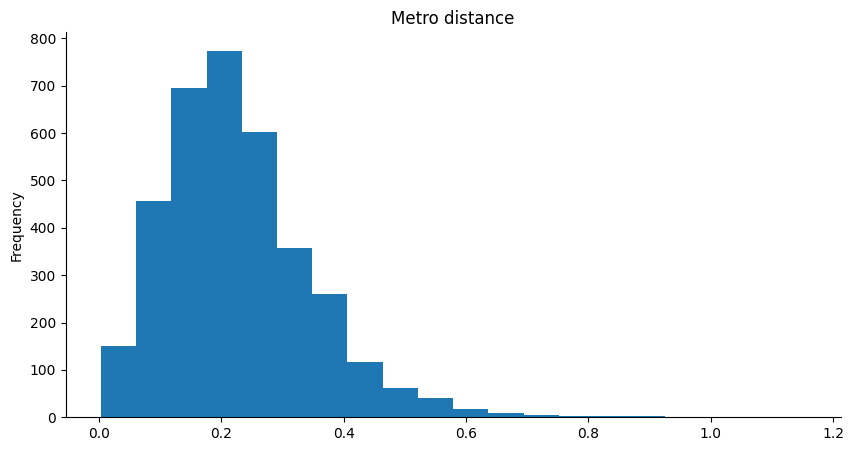

In [ ]:
from matplotlib import pyplot as plt
data['metro_dist'].plot(kind='hist', title='Metro distance', figsize=(10, 5), bins=20)
plt.gca().spines[['top', 'right',]].set_visible(False)

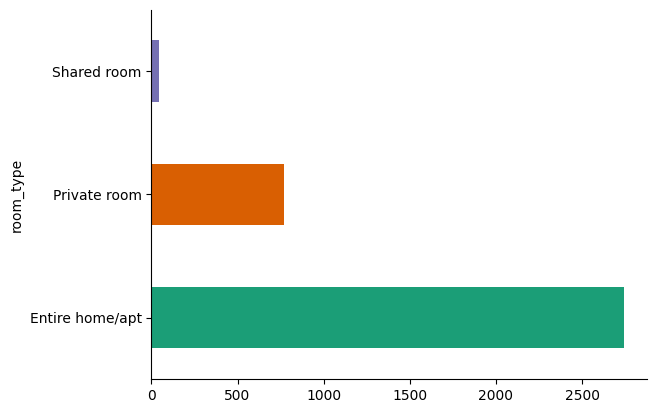

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
fig1=px.scatter(data, x='bedrooms', y= 'Cost',size='person_capacity',color='bedrooms',hover_data=['cleanliness_rating','guest_satisfaction','dist','metro_dist'])
fig1

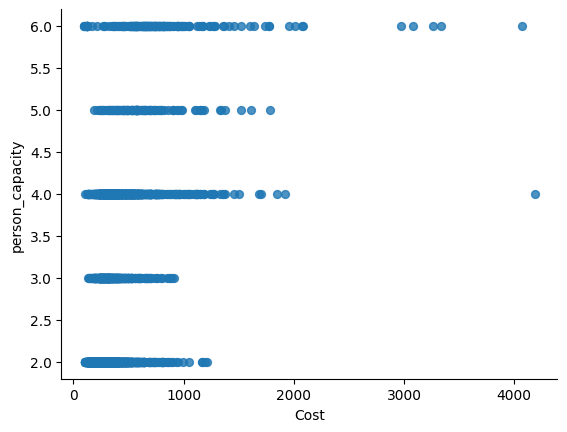

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Cost', y='person_capacity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
!pip install skimpy

In [ ]:
# Import necessary library
import numpy as np
import pandas as pd
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [ ]:
file_path = '/content/drive/MyDrive/Paris_housing_index.xlsx'


In [ ]:
house_data = pd.read_excel(file_path)
house_data.head()

id        room_type  room_sharing  room_private  person_capacity  \
0   0  Entire home/apt         False         False                5   
1   1     Private room         False          True                2   
2   2  Entire home/apt         False         False                4   
3   3     Private room         False          True                2   
4   4  Entire home/apt         False         False                2   

   host_status  multi_listing  business_listing  cleanliness_rating  \
0        False              0                 1                   9   
1         True              0                 0                  10   
2        False              0                 1                  10   
3        False              0                 0                  10   
4         True              0                 0                   9   

   guest_satisfaction_rating  bedrooms  dist_city  dist_metro   attr_index  \
0                         89         1   1.351201    0.212346   390.776774   
1                         97         1   0.699821    0.193710   518.478270   
2                        100         1   0.968982    0.294343   432.689942   
3                         94         1   3.302319    0.234740   444.555284   
4                         88         1   1.402430    0.055052  1013.458689   

   attr_index_norm   rest_index  rest_index_norm  longitude  latitude  \
0        19.001549  1030.738507        47.550371    2.35900  48.86800   
1        25.211044  1218.658866        56.219575    2.35385  48.86282   
2        21.039580  1069.894793        49.356741    2.36023  48.86375   
3        21.616533   902.856370        41.650870    2.31714  48.87475   
4        49.279502  1348.063511        62.189313    2.33408  48.85384   

        price  
0  536.396682  
1  290.101594  
2  445.754497  
3  211.343089  
4  266.334234

In [ ]:
house_data.shape

(6688, 20)

In [ ]:
#The features of dataset
print("The name of columns are: \n",house_data.columns)

The name of columns are: 
 Index(['id', 'room_type', 'room_sharing', 'room_private', 'person_capacity',
       'host_status', 'multi_listing', 'business_listing',
       'cleanliness_rating', 'guest_satisfaction_rating', 'bedrooms',
       'dist_city', 'dist_metro', 'attr_index', 'attr_index_norm',
       'rest_index', 'rest_index_norm', 'longitude', 'latitude', 'price'],
      dtype='object')


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6688 non-null   int64  
 1   room_type                  6688 non-null   object 
 2   room_sharing               6688 non-null   bool   
 3   room_private               6688 non-null   bool   
 4   person_capacity            6688 non-null   int64  
 5   host_status                6688 non-null   bool   
 6   multi_listing              6688 non-null   int64  
 7   business_listing           6688 non-null   int64  
 8   cleanliness_rating         6688 non-null   int64  
 9   guest_satisfaction_rating  6688 non-null   int64  
 10  bedrooms                   6688 non-null   int64  
 11  dist_city                  6688 non-null   float64
 12  dist_metro                 6688 non-null   float64
 13  attr_index                 6688 non-null   float

In [ ]:
# Calculate the frequency of each unique value in the 'bedrooms'
bedrooms_counts = house_data['bedrooms'].value_counts().sort_index()
bedrooms_counts

bedrooms
0    1295
1    4448
2     786
3     152
4       5
5       2
Name: count, dtype: int64

In [ ]:
# Calculate the frequency of each unique value in the 'room_type'
RoomType_counts = house_data['room_type'].value_counts().sort_index()
RoomType_counts

room_type
Entire home/apt    5067
Private room       1527
Shared room          94
Name: count, dtype: int64

In [ ]:
# Calculate the frequency of each unique value in the 'person_capacity'
Pcapacity_counts = house_data['person_capacity'].value_counts().sort_index()
Pcapacity_counts

person_capacity
2    3686
3     646
4    1728
5     236
6     392
Name: count, dtype: int64

In [ ]:
# Calculate descriptive statistics and transpose the result
desc_stats = house_data.describe().T

# Create a custom style function for the DataFrame visualization
def custom_style(val):
    # Alternate background color based on the value being positive or negative
    color = '#f7b267' if val < 0 else '#60acc5'
    return f'background-color: {color}; color: black'

# Apply the custom style to the whole DataFrame
styled_desc_stats = desc_stats.style.applymap(custom_style)

# Apply a gradient to the 'mean' column using 'YlGnBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['mean'], cmap='YlGnBu')

# Apply a gradient to the 'max' column using 'YlOrRd' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['max'], cmap='YlOrRd')

# Apply bold formatting to the 'min' column
styled_desc_stats = styled_desc_stats.set_properties(subset=['min'], **{'font-weight': 'bold'})

# Display the styled descriptive statistics DataFrame
styled_desc_stats


In [ ]:
house_data.isnull().any()

id                           False
room_type                    False
room_sharing                 False
room_private                 False
person_capacity              False
host_status                  False
multi_listing                False
business_listing             False
cleanliness_rating           False
guest_satisfaction_rating    False
bedrooms                     False
dist_city                    False
dist_metro                   False
attr_index                   False
attr_index_norm              False
rest_index                   False
rest_index_norm              False
longitude                    False
latitude                     False
price                        False
dtype: bool

<ipython-input-93-38ef7d796645>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['price'], color='#004500')


Text(0.5, 1.0, 'Distribution of House Prices')

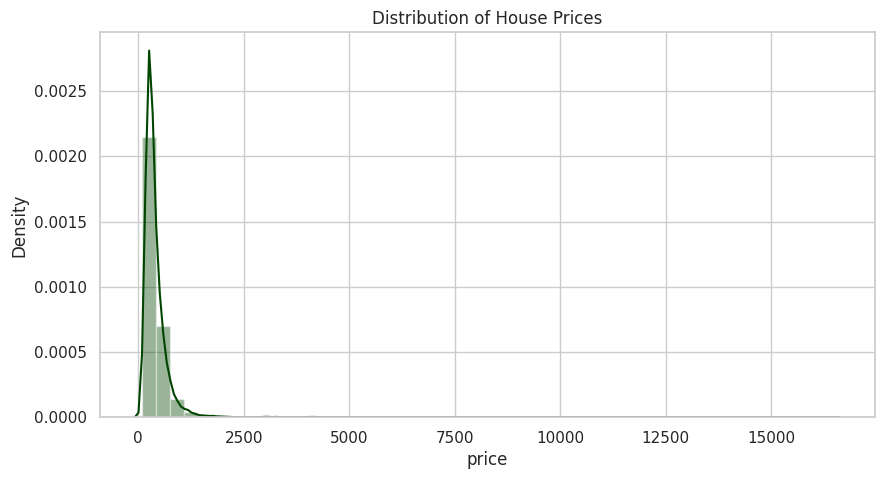

In [ ]:
f, axes = plt.subplots(figsize=(10,5))
sns.distplot(house_data['price'], color='#004500')
# Add a title to the plot
axes.set_title('Distribution of House Prices')

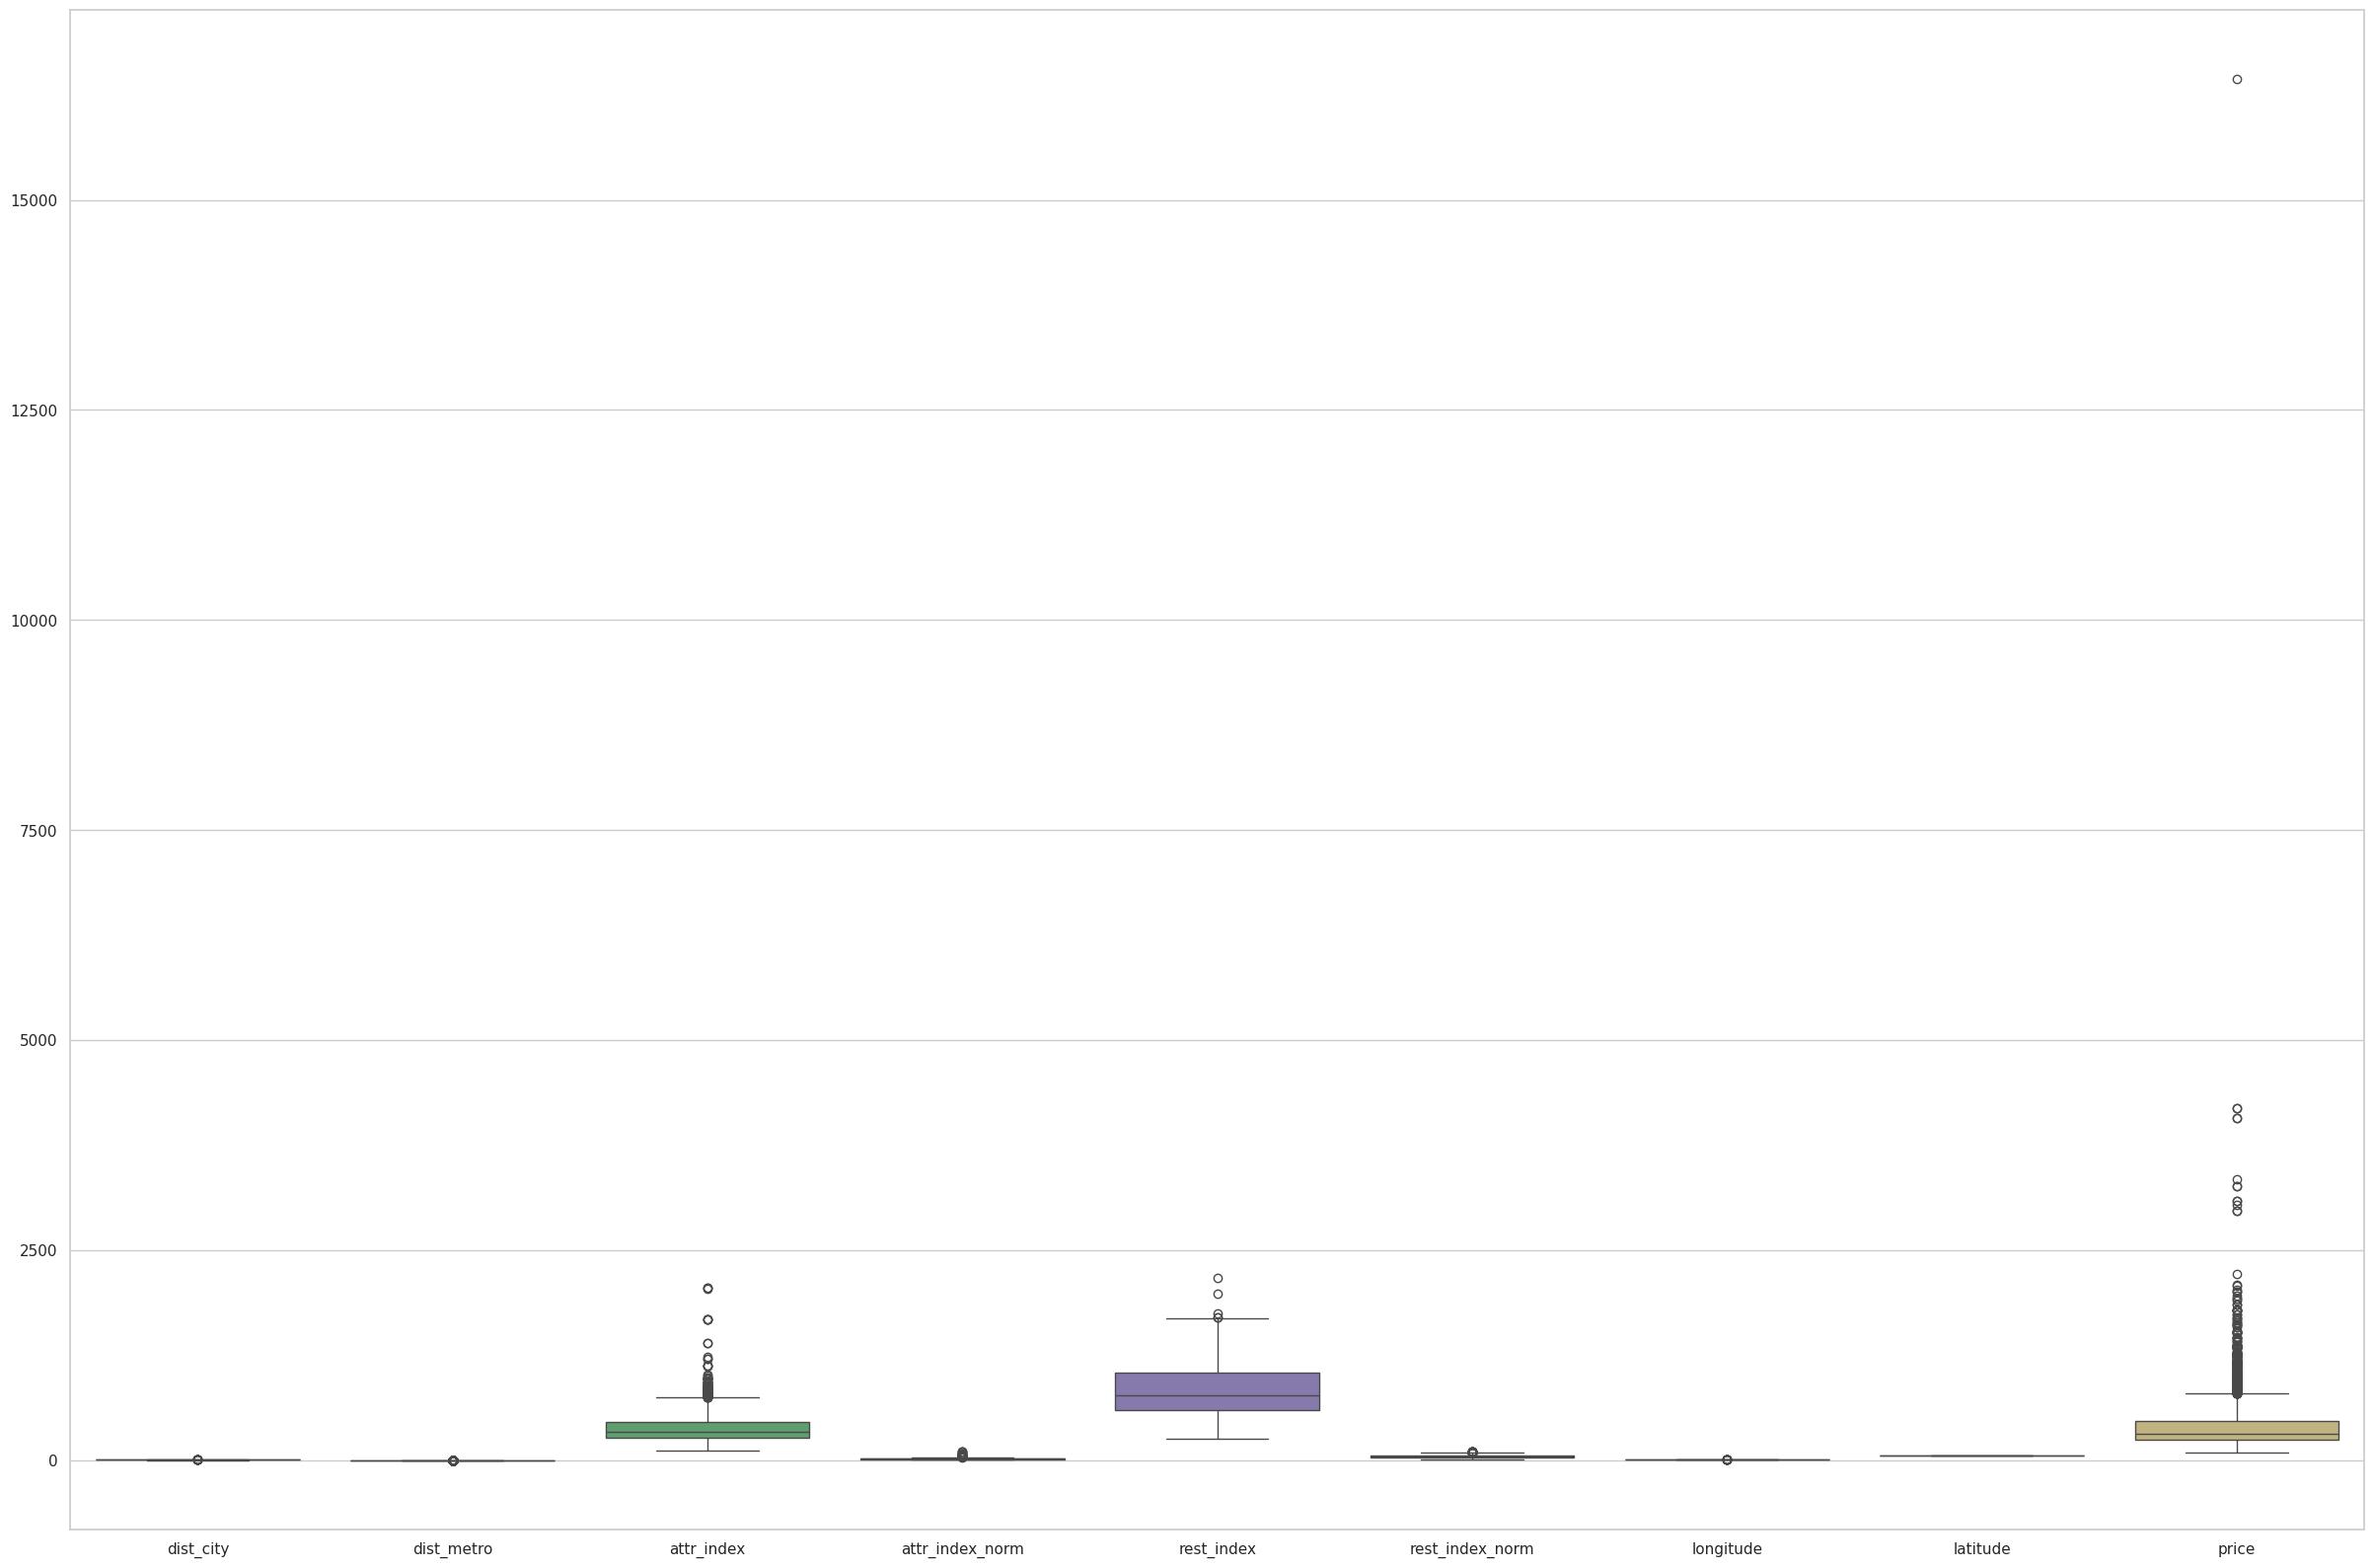

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(30, 20))

# Specify the correct column names in a list format
columns_to_plot = ['dist_city','dist_metro','attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','longitude','latitude','price']

# Use the correct syntax to select and plot multiple columns
sns.boxplot(data=house_data[columns_to_plot])

plt.show()


In [ ]:
#Define the Function to Cap Outliers
def cap_outliers(data, column):
    Q1 = house_data[column].quantile(0.25)
    Q3 = house_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    house_data[column] = house_data[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return data

#List of Numeric Columns
numeric_columns = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','price']

#Loop Through Each Column and Cap Outliers
for column in numeric_columns:
    house_data = cap_outliers(house_data, column)

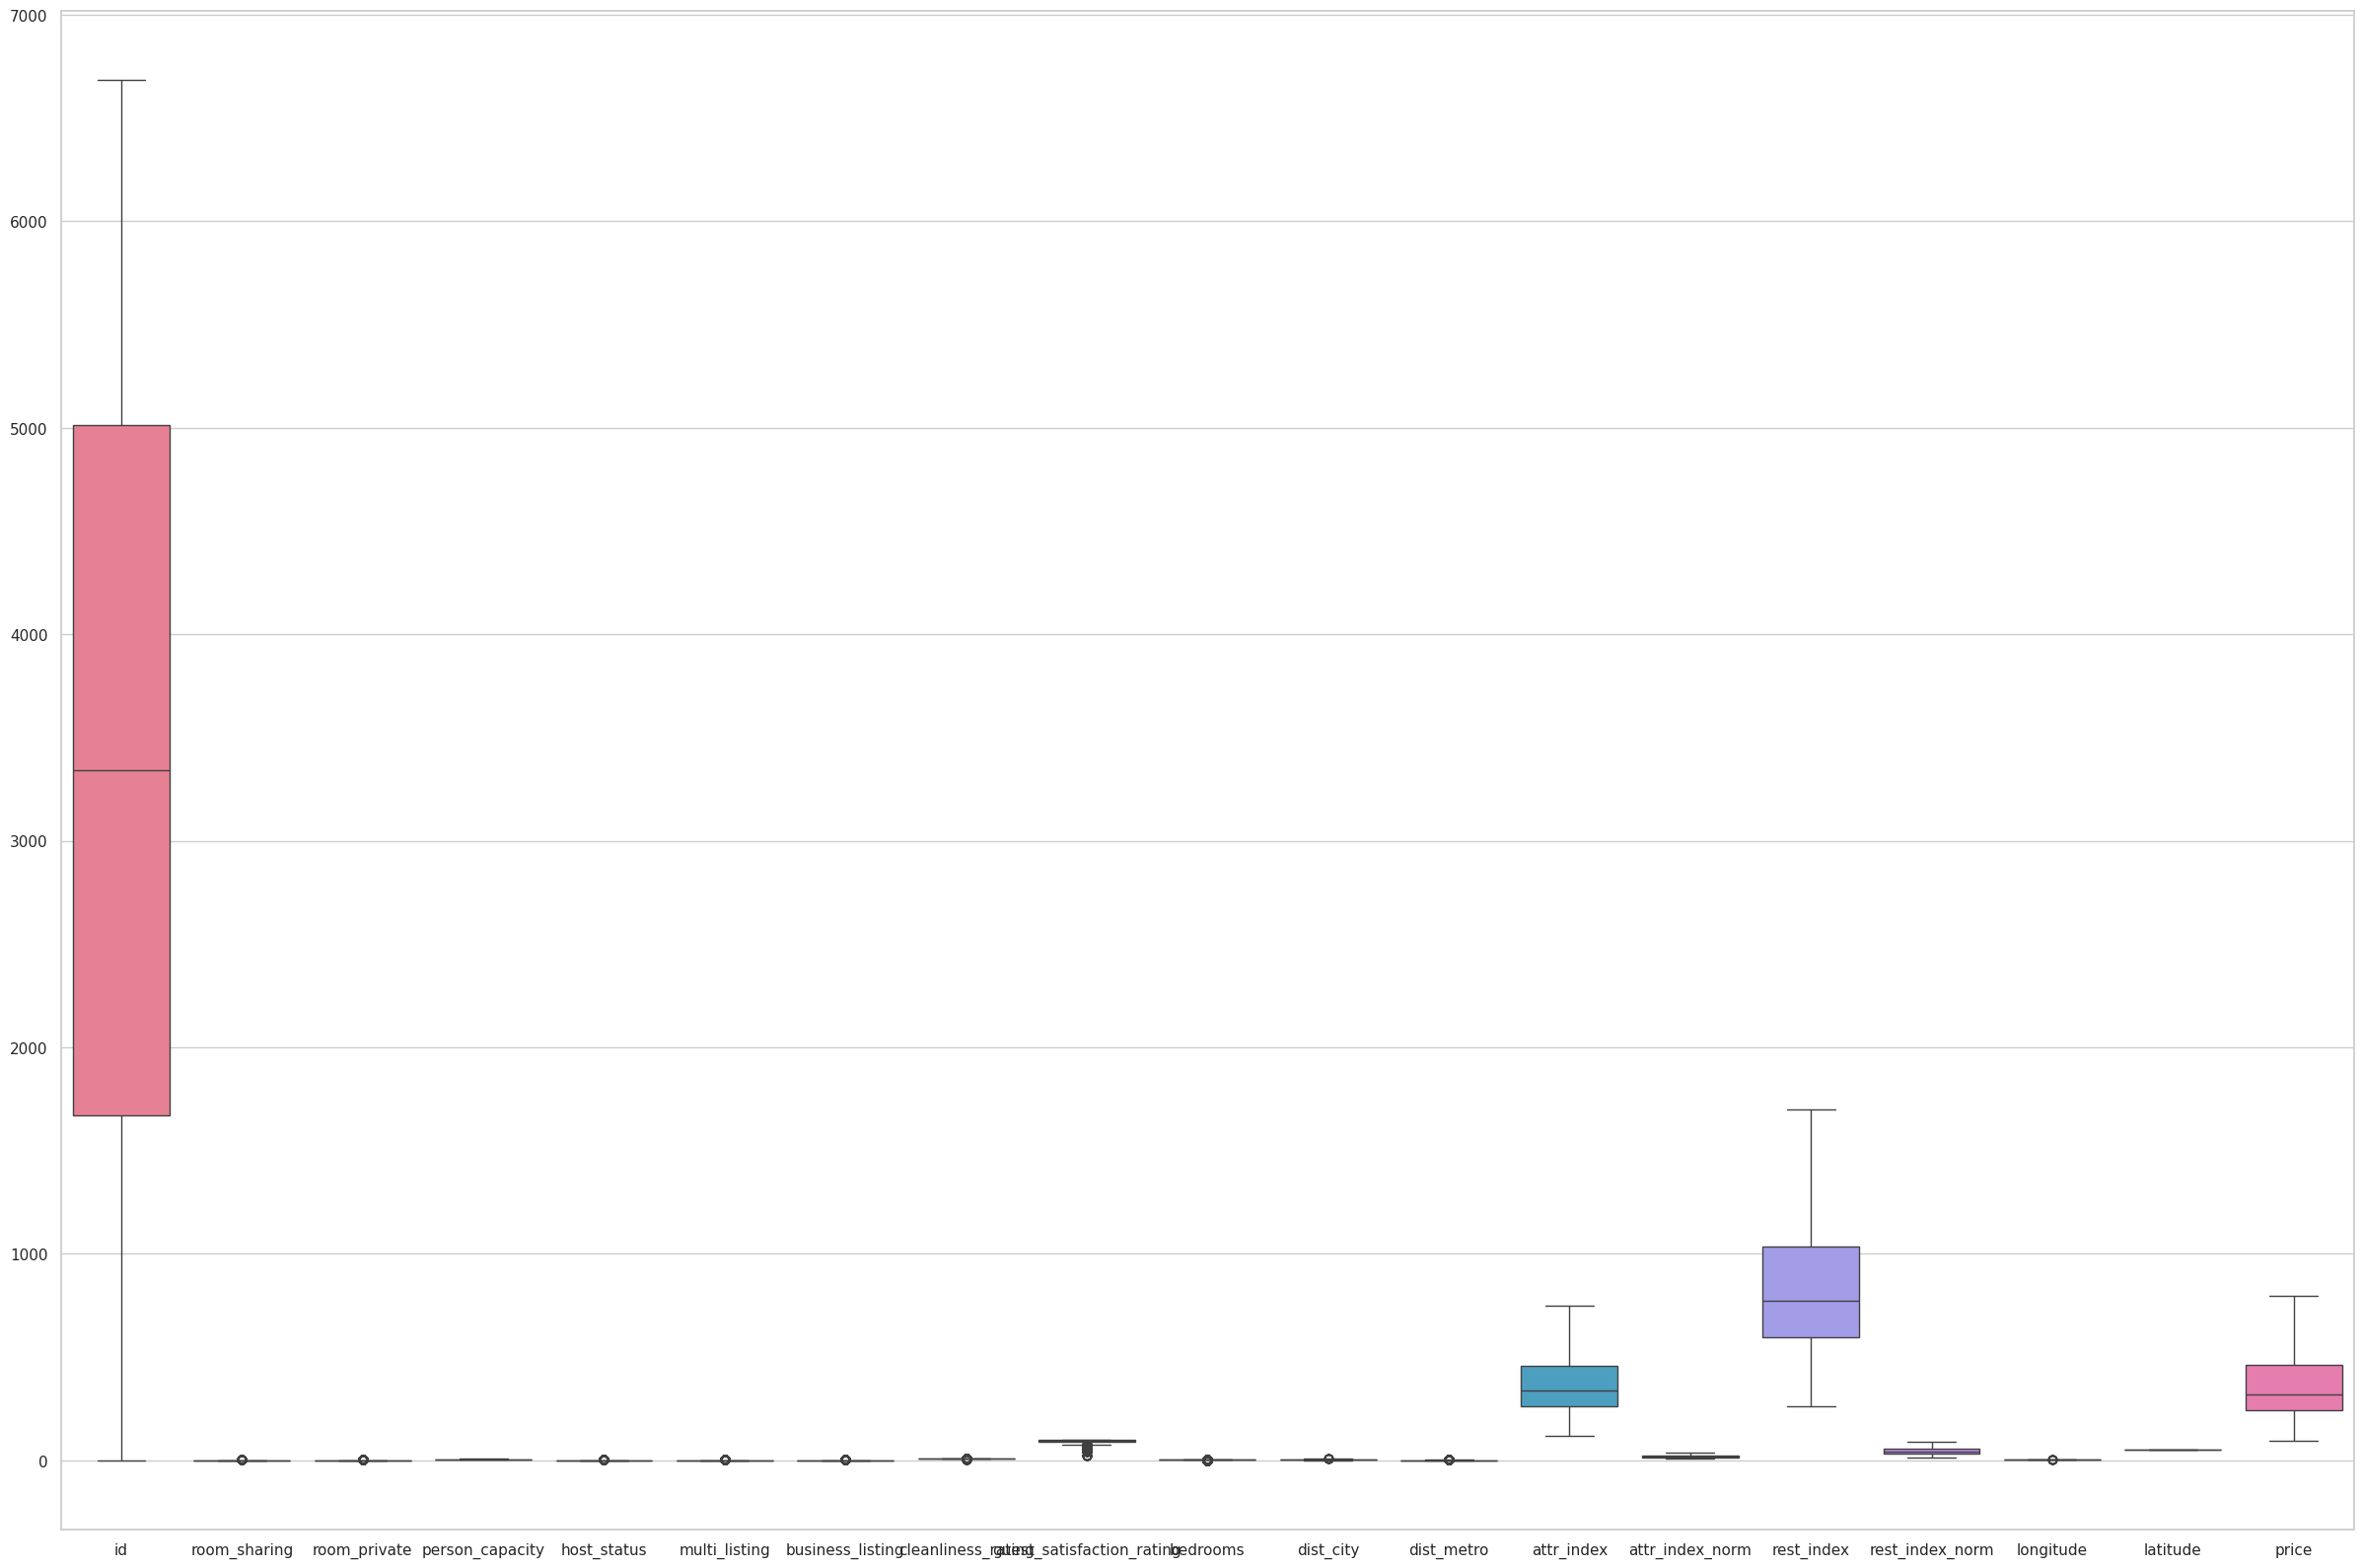

In [ ]:
plt.figure(figsize=(30, 20))

# Specify the correct column names in a list format
columns_to_plot = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','price']

# Use the correct syntax to select and plot multiple columns
sns.boxplot(data=house_data)

plt.show()

In [ ]:
skim(house_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6688   │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 20     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 3     │                                                          │
│                                │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA ┃ NA % ┃ mean   ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id                    │  0 │    0 │   3344 │    1931 │       0 │   1672 │   3344 │   5015 │  6687 │ ▇▇▇▇▇▇ │  │
│ │ person_capacity       │  0 │    0 │  2.954 │   1.215 │       2 │      2 │      2 │      4 │     6 │ ▇▁ ▃▁▁ │  │
│ │ multi_listing         │  0 │    0 │ 0.2195 │  0.4139 │       0 │      0 │      0 │      0 │     1 │ ▇    ▂ │  │
│ │ business_listing      │  0 │    0 │ 0.2458 │  0.4306 │       0 │      0 │      0 │      0 │     1 │ ▇    ▃ │  │
│ │ cleanliness_rating    │  0 │    0 │  9.264 │   0.974 │       2 │      9 │      9 │     10 │    10 │     ▁▇ │  │
│ │ guest_satisfaction_ra │  0 │    0 │  92.04 │   8.818 │      20 │     89 │     94 │     98 │   100 │     ▁▇ │  │
│ │ ting                  │    │      │        │         │         │        │        │        │       │        │  │
│ │ bedrooms              │  0 │    0 │ 0.9728 │  0.6426 │       0 │      1 │      1 │      1 │     5 │  ▂▇▁   │  │
│ │ dist_city             │  0 │    0 │  2.996 │   1.464 │ 0.07154 │  1.832 │  2.997 │  4.051 │ 7.704 │ ▅▇▇▆▂  │  │
│ │ dist_metro            │  0 │    0 │ 0.2273 │  0.1228 │ 0.00322 │ 0.1424 │ 0.2073 │ 0.2905 │ 1.155 │  ▇▇▁   │  │
│ │ attr_index            │  0 │    0 │  370.6 │   144.7 │   116.3 │  262.3 │  337.9 │  456.3 │ 747.2 │ ▃▇▆▃▂▂ │  │
│ │ attr_index_norm       │  0 │    0 │  18.03 │   7.042 │   5.655 │  12.76 │  16.45 │   22.2 │ 36.36 │ ▃▇▆▃▂▂ │  │
│ │ rest_index            │  0 │    0 │  818.6 │   283.1 │   258.7 │  594.6 │  771.2 │   1037 │  1700 │ ▃▇▆▅▂  │  │
│ │ rest_index_norm       │  0 │    0 │  42.56 │   15.59 │   11.93 │  30.16 │  40.37 │  53.07 │ 87.45 │ ▃▇▇▅▂▁ │  │
│ │ longitude             │  0 │    0 │  2.343 │ 0.03372 │   2.248 │  2.322 │  2.346 │  2.367 │ 2.439 │ ▁▃▆▇▃  │  │
│ │ latitude              │  0 │    0 │  48.86 │ 0.01741 │   48.82 │  48.85 │  48.87 │  48.88 │  48.9 │ ▁▃▆▇▆▂ │  │
│ │ price                 │  0 │    0 │  369.6 │     178 │   92.74 │  240.9 │  317.6 │  462.1 │ 793.8 │ ▃▇▅▂▁▂ │  │
│ └───────────────────────┴────┴──────┴────────┴─────────┴─────────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ true         

In [ ]:
from scipy.stats import skew, kurtosis, pearsonr, spearmanr
# Shape of Distribution
skewness_price = skew(house_data['price'])
kurtosis_price = kurtosis(house_data['price'])

print("\nShape of Distribution:")
print(f"Skewness: {skewness_price}")
print(f"Kurtosis: {kurtosis_price}")


Shape of Distribution:
Skewness: 0.9829573660624964
Kurtosis: 0.12286793376276695


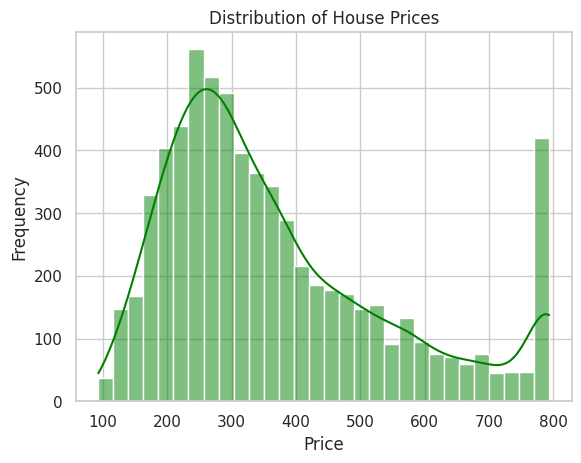

In [ ]:
# Histogram
sns.histplot(house_data['price'], kde=True, color='green')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Pearson Correlation between price and attr_index: 0.4147 (p-value: 0.0000)
Spearman Correlation between price and attr_index: 0.4574 (p-value: 0.0000)


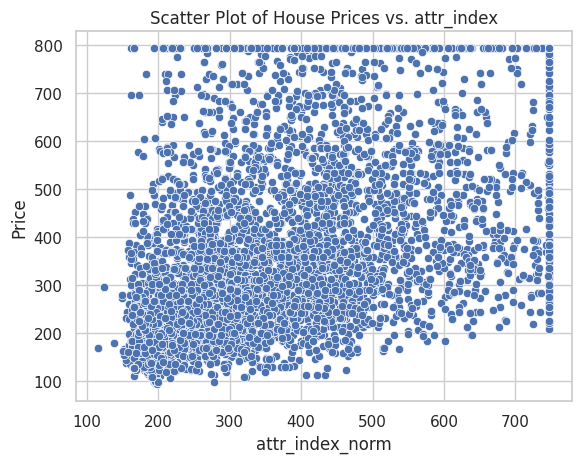

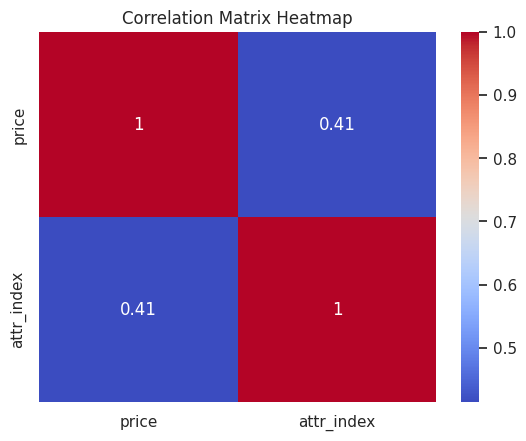

In [ ]:
# Calculate Pearson Correlation
pearson_corr, pearson_p_value = pearsonr(house_data['price'], house_data['attr_index'])
print(f"Pearson Correlation between price and attr_index: {pearson_corr:.4f} (p-value: {pearson_p_value:.4f})")

# Calculate Spearman Correlation
spearman_corr, spearman_p_value = spearmanr(house_data['price'], house_data['attr_index'])
print(f"Spearman Correlation between price and attr_index: {spearman_corr:.4f} (p-value: {spearman_p_value:.4f})")

# Visualize Correlation with a Scatter Plot
sns.scatterplot(x='attr_index', y='price', data=house_data)
plt.title('Scatter Plot of House Prices vs. attr_index')
plt.xlabel('attr_index_norm')
plt.ylabel('Price')
plt.show()

# Heatmap of Correlation Matrix
correlation_matrix = house_data[['price', 'attr_index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


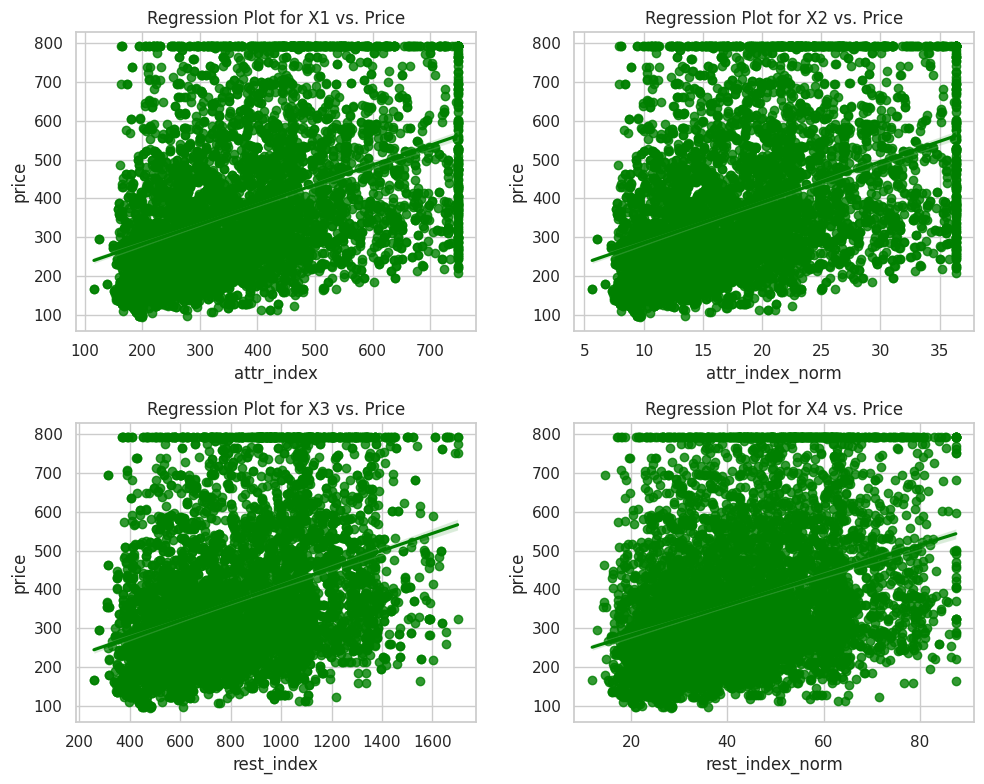

In [ ]:
# Create subplots for multiple regression plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create regression plots for each variable with 'coolwarm' colormap
sns.regplot(x='attr_index', y='price', data=house_data, ax=axes[0, 0], color='green')
axes[0, 0].set_title('Regression Plot for X1 vs. Price')

sns.regplot(x='attr_index_norm', y='price', data=house_data, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Regression Plot for X2 vs. Price')

sns.regplot(x='rest_index', y='price', data=house_data, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Regression Plot for X3 vs. Price')

sns.regplot(x='rest_index_norm', y='price', data=house_data, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Regression Plot for X4 vs. Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

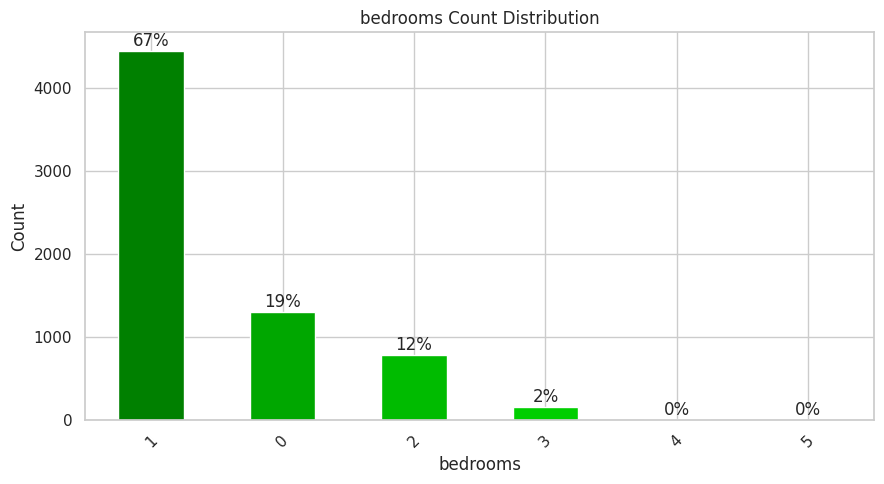

In [ ]:
# Count the values of the 'bedrooms' column
value_counts = house_data['bedrooms'].value_counts()

# Create a bar plot
plt.figure(figsize=(9, 5))
ax = value_counts.plot(kind='bar', color=['#008000', '#00a700', '#00bb00', '#00ce00', '#00ce00', '#006c00'])

# Add percentage labels above each bar
total = len(house_data)
for i, v in enumerate(value_counts):
    percentage = (v / total) * 100
    ax.text(i, v + 10, f'{percentage:.0f}%', ha='center', va='bottom')

plt.xlabel('bedrooms')
plt.ylabel('Count')
plt.title('bedrooms Count Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-103-eb1b2b4078b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='person_capacity', y='price', data=house_data, palette='Greens')


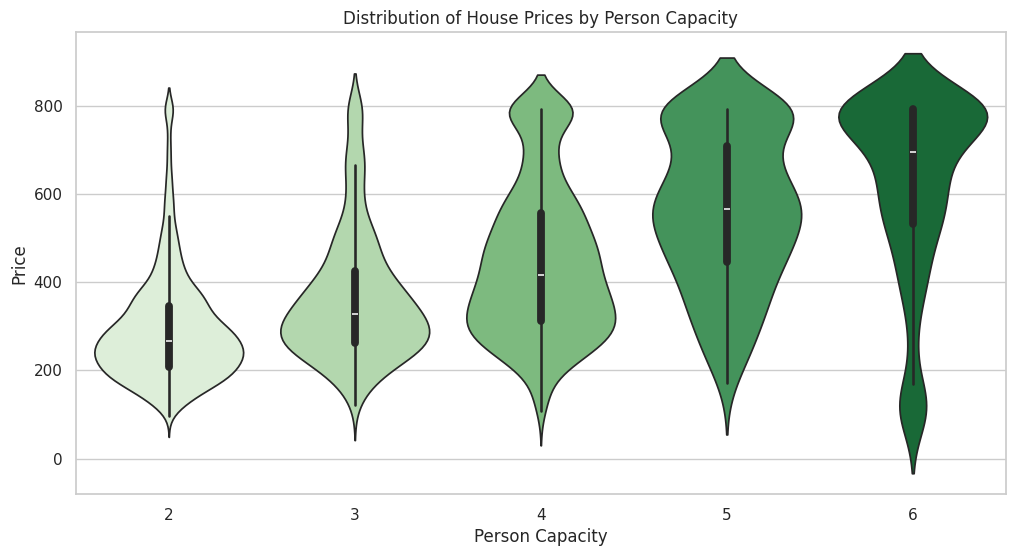

In [ ]:
# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='person_capacity', y='price', data=house_data, palette='Greens')
plt.title('Distribution of House Prices by Person Capacity')
plt.xlabel('Person Capacity')
plt.ylabel('Price')
plt.show()

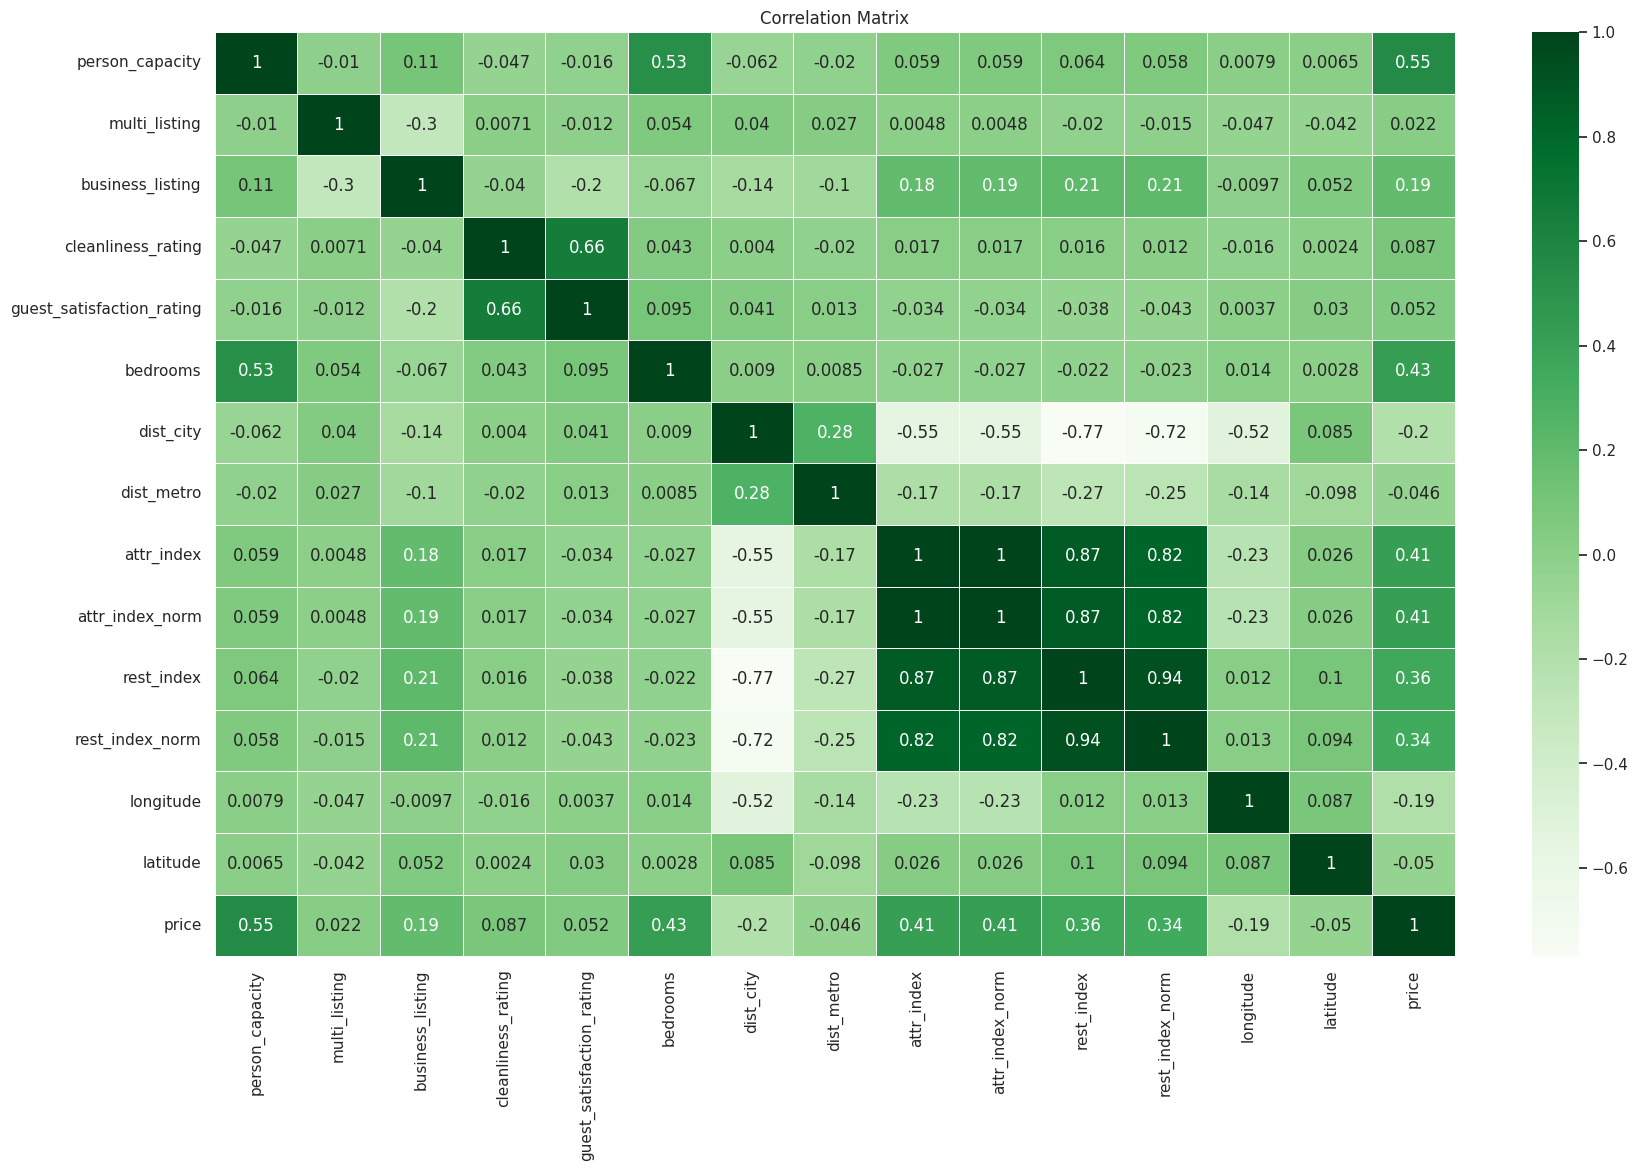

In [ ]:
# Convert non-numeric columns to numeric using one-hot encoding
data = ['person_capacity','multi_listing', 'business_listing',
       'cleanliness_rating', 'guest_satisfaction_rating', 'bedrooms',
       'dist_city', 'dist_metro', 'attr_index', 'attr_index_norm',
       'rest_index', 'rest_index_norm', 'longitude', 'latitude', 'price']

subset_data =house_data[data]

# Calculate the correlation matrix
corr_matrix = subset_data.corr()

# Create a heatmap with green colors
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()